In [49]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn import manifold, datasets
from sklearn.preprocessing import StandardScaler
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 600
import os
from collections import defaultdict
from sklearn import datasets
import seaborn as sns

In [45]:
# all cells info
expression_file = "/data8t/mtx/scSNV/dataset_v2/GSE57872/data/quantification_stats/gene_expression_matrix/gene_expression_matrix_cpm.csv"
exp_profile = pd.read_csv(expression_file,index_col=0)
reads_file = "/data8t/mtx/scSNV/dataset_v2/GSE57872/data/quantification_stats/gene_expression_matrix/gene_expression_matrix.csv"
reads_profile = pd.read_csv(reads_file,index_col=0)

In [24]:
# load gene profile
third_cpm_profile_all = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_third_cpm_all.csv',index_col=0)
third_cpm_profile_patients = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_third_cpm_patients.csv',index_col=0)
third_cpm_profile_cellline = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_third_cpm_cellline.csv',index_col=0)

In [36]:
# load snv profile
third_snv_profile_all = pd.read_csv("/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_snv_on_filtered_genes_pass_40_cells.csv",index_col=0)
third_snv_profile_cellline = pd.read_csv("/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_snv_CSC.csv",index_col=0)
third_snv_profile_patients = pd.read_csv("/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_final_snv_MGH.csv",index_col=0)

# FOS_75745551

patients_TF \
chr14__75745551(rs2239615), BCAS1(ENSG00000064787.8), FOS(ENSG00000170345.5) \
chr14__75745551(rs2239615), CLDN11(ENSG00000013297.6), FOS(ENSG00000170345.5)

In [6]:
FOS_75745551_yes=pd.read_csv('/data8t/mtx/scSNV/just_for_test/code/analysis/splicing_analysis/data/FOS_75745551/rsem/FOS_75745551_yes_rsem.isoforms.target.txt',sep='\t')
FOS_75745551_no=pd.read_csv('/data8t/mtx/scSNV/just_for_test/code/analysis/splicing_analysis/data/FOS_75745551/rsem/FOS_75745551_no_rsem.isoforms.target.txt',sep='\t')

In [14]:
# there are 10 transcripts
# there are 5 transcripts containing this variant, all in UTR
# ENST00000303562.4
# ENST00000554617.1
# ENST00000535987.1
# ENST00000554212.1
# ENST00000556324.2
FOS_75745551_located_transcripts = ['ENST00000303562.4','ENST00000554617.1',
                                   'ENST00000535987.1','ENST00000554212.1',
                                   'ENST00000556324.2']

In [15]:
FOS_75745551_yes[FOS_75745551_yes.transcript_id.isin(FOS_75745551_located_transcripts)]

transcript_id            gene_id  length  effective_length  \
0  ENST00000303562.4  ENSG00000170345.5    2158           1914.71   
1  ENST00000535987.1  ENSG00000170345.5    1402           1158.71   
2  ENST00000554212.1  ENSG00000170345.5     567            328.23   
3  ENST00000554617.1  ENSG00000170345.5     796            553.16   
8  ENST00000556324.2  ENSG00000170345.5     596            356.23   

   expected_count        TPM       FPKM  IsoPct  
0       945477.37  878748.40  488301.62   87.87  
1        19864.56   30537.85   16969.23    3.05  
2         1154.59    6259.94    3478.51    0.63  
3         1798.06    5784.58    3214.37    0.58  
8          340.82    1702.64     946.12    0.17

In [17]:
FOS_75745551_yes[FOS_75745551_yes.transcript_id.isin(FOS_75745551_located_transcripts)].IsoPct.sum()

92.3

In [18]:
FOS_75745551_no[FOS_75745551_no.transcript_id.isin(FOS_75745551_located_transcripts)]

transcript_id            gene_id  length  effective_length  \
0  ENST00000303562.4  ENSG00000170345.5    2158           1914.53   
1  ENST00000535987.1  ENSG00000170345.5    1402           1158.53   
2  ENST00000554212.1  ENSG00000170345.5     567            326.94   
3  ENST00000554617.1  ENSG00000170345.5     796            552.79   
8  ENST00000556324.2  ENSG00000170345.5     596            355.12   

   expected_count        TPM       FPKM  IsoPct  
0       118967.60  767545.83  455375.73   76.75  
1         1174.73   12535.70    7437.28    1.25  
2          123.03    4648.35    2757.81    0.46  
3         1013.65   22649.87   13437.89    2.26  
8          494.45   17198.46   10203.64    1.72

In [19]:
FOS_75745551_no[FOS_75745551_no.transcript_id.isin(FOS_75745551_located_transcripts)].IsoPct.sum()

82.44

In [51]:
df_BCAS1_FOS = pd.DataFrame({'gene':third_cpm_profile_patients.loc['ENSG00000064787.8',:],
                   'snv':third_snv_profile_patients.loc['chr14__75745551',:],
                   'gene_snv':exp_profile.loc['ENSG00000170345.5',third_cpm_profile_patients.columns.values],
                   'gene_snv_reads':reads_profile.loc['ENSG00000170345.5',third_cpm_profile_patients.columns.values]})

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Expression of FOS_75745551 located gene')

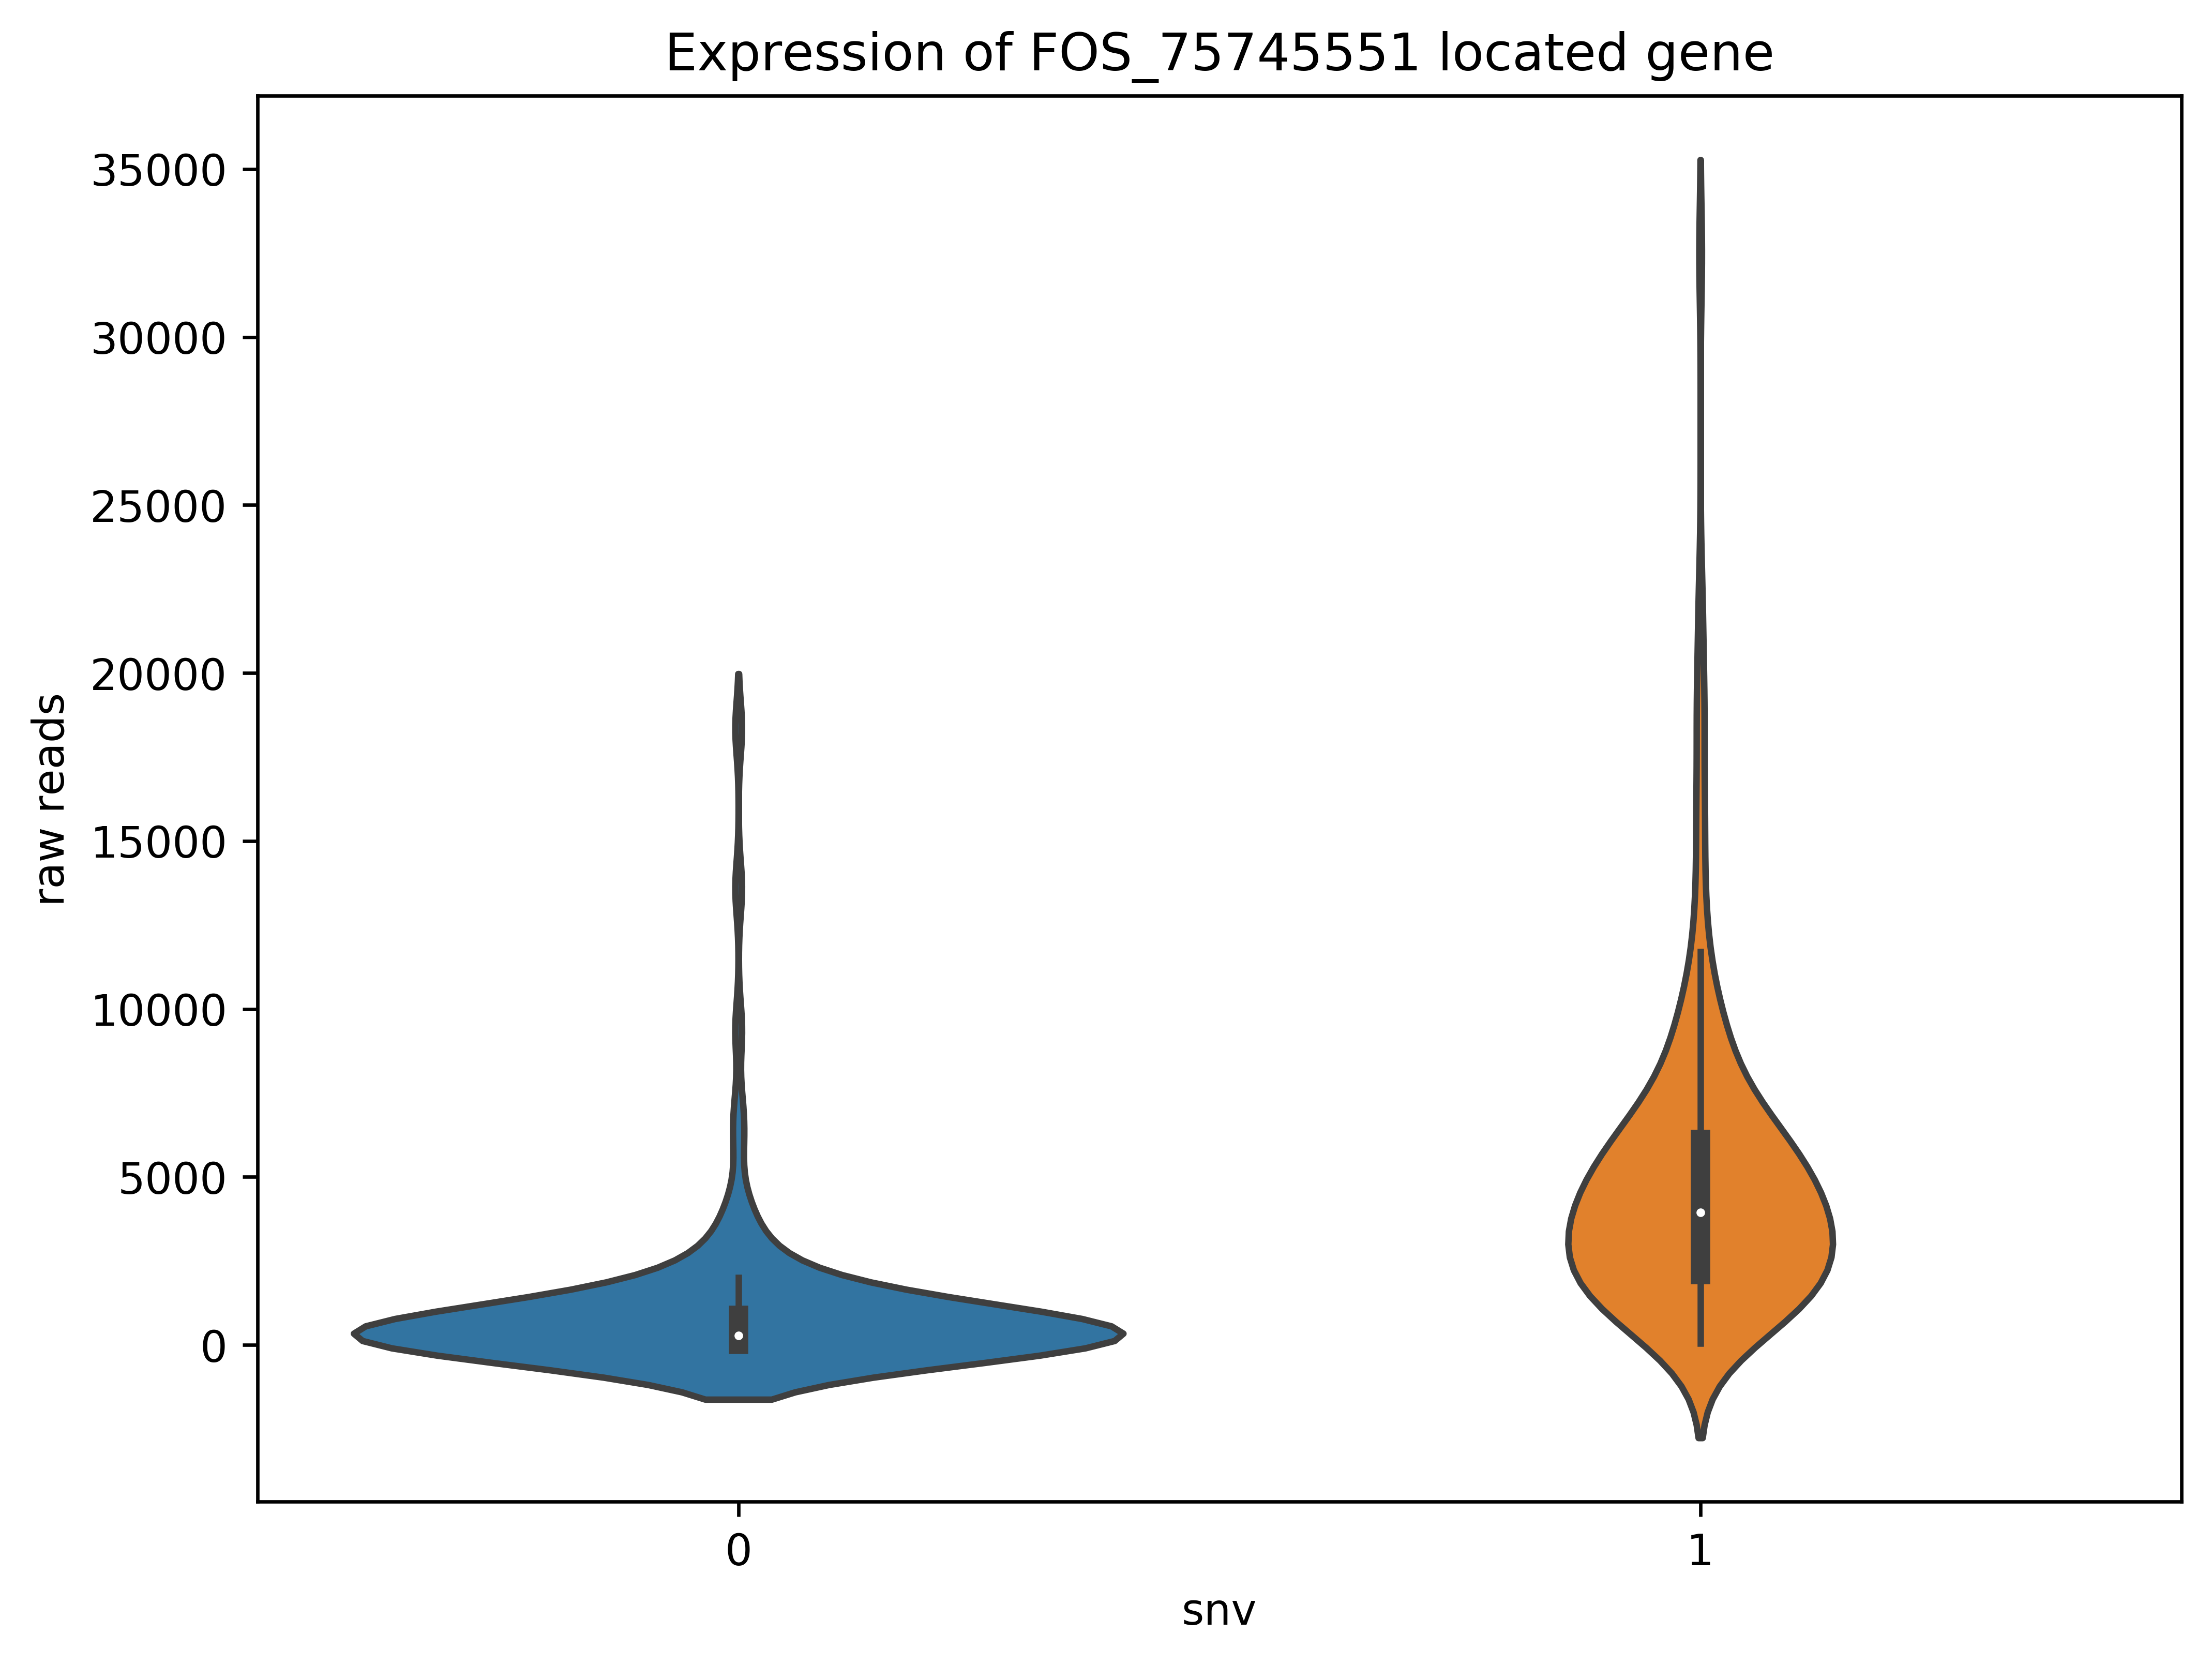

In [53]:
ax = sns.violinplot(x="snv", y="gene_snv_reads", data=df_BCAS1_FOS)
ax.set(xlabel='snv', ylabel='raw reads')
ax.set_title('Expression of FOS_75745551 located gene')

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Expression of FOS_75745551 located gene')

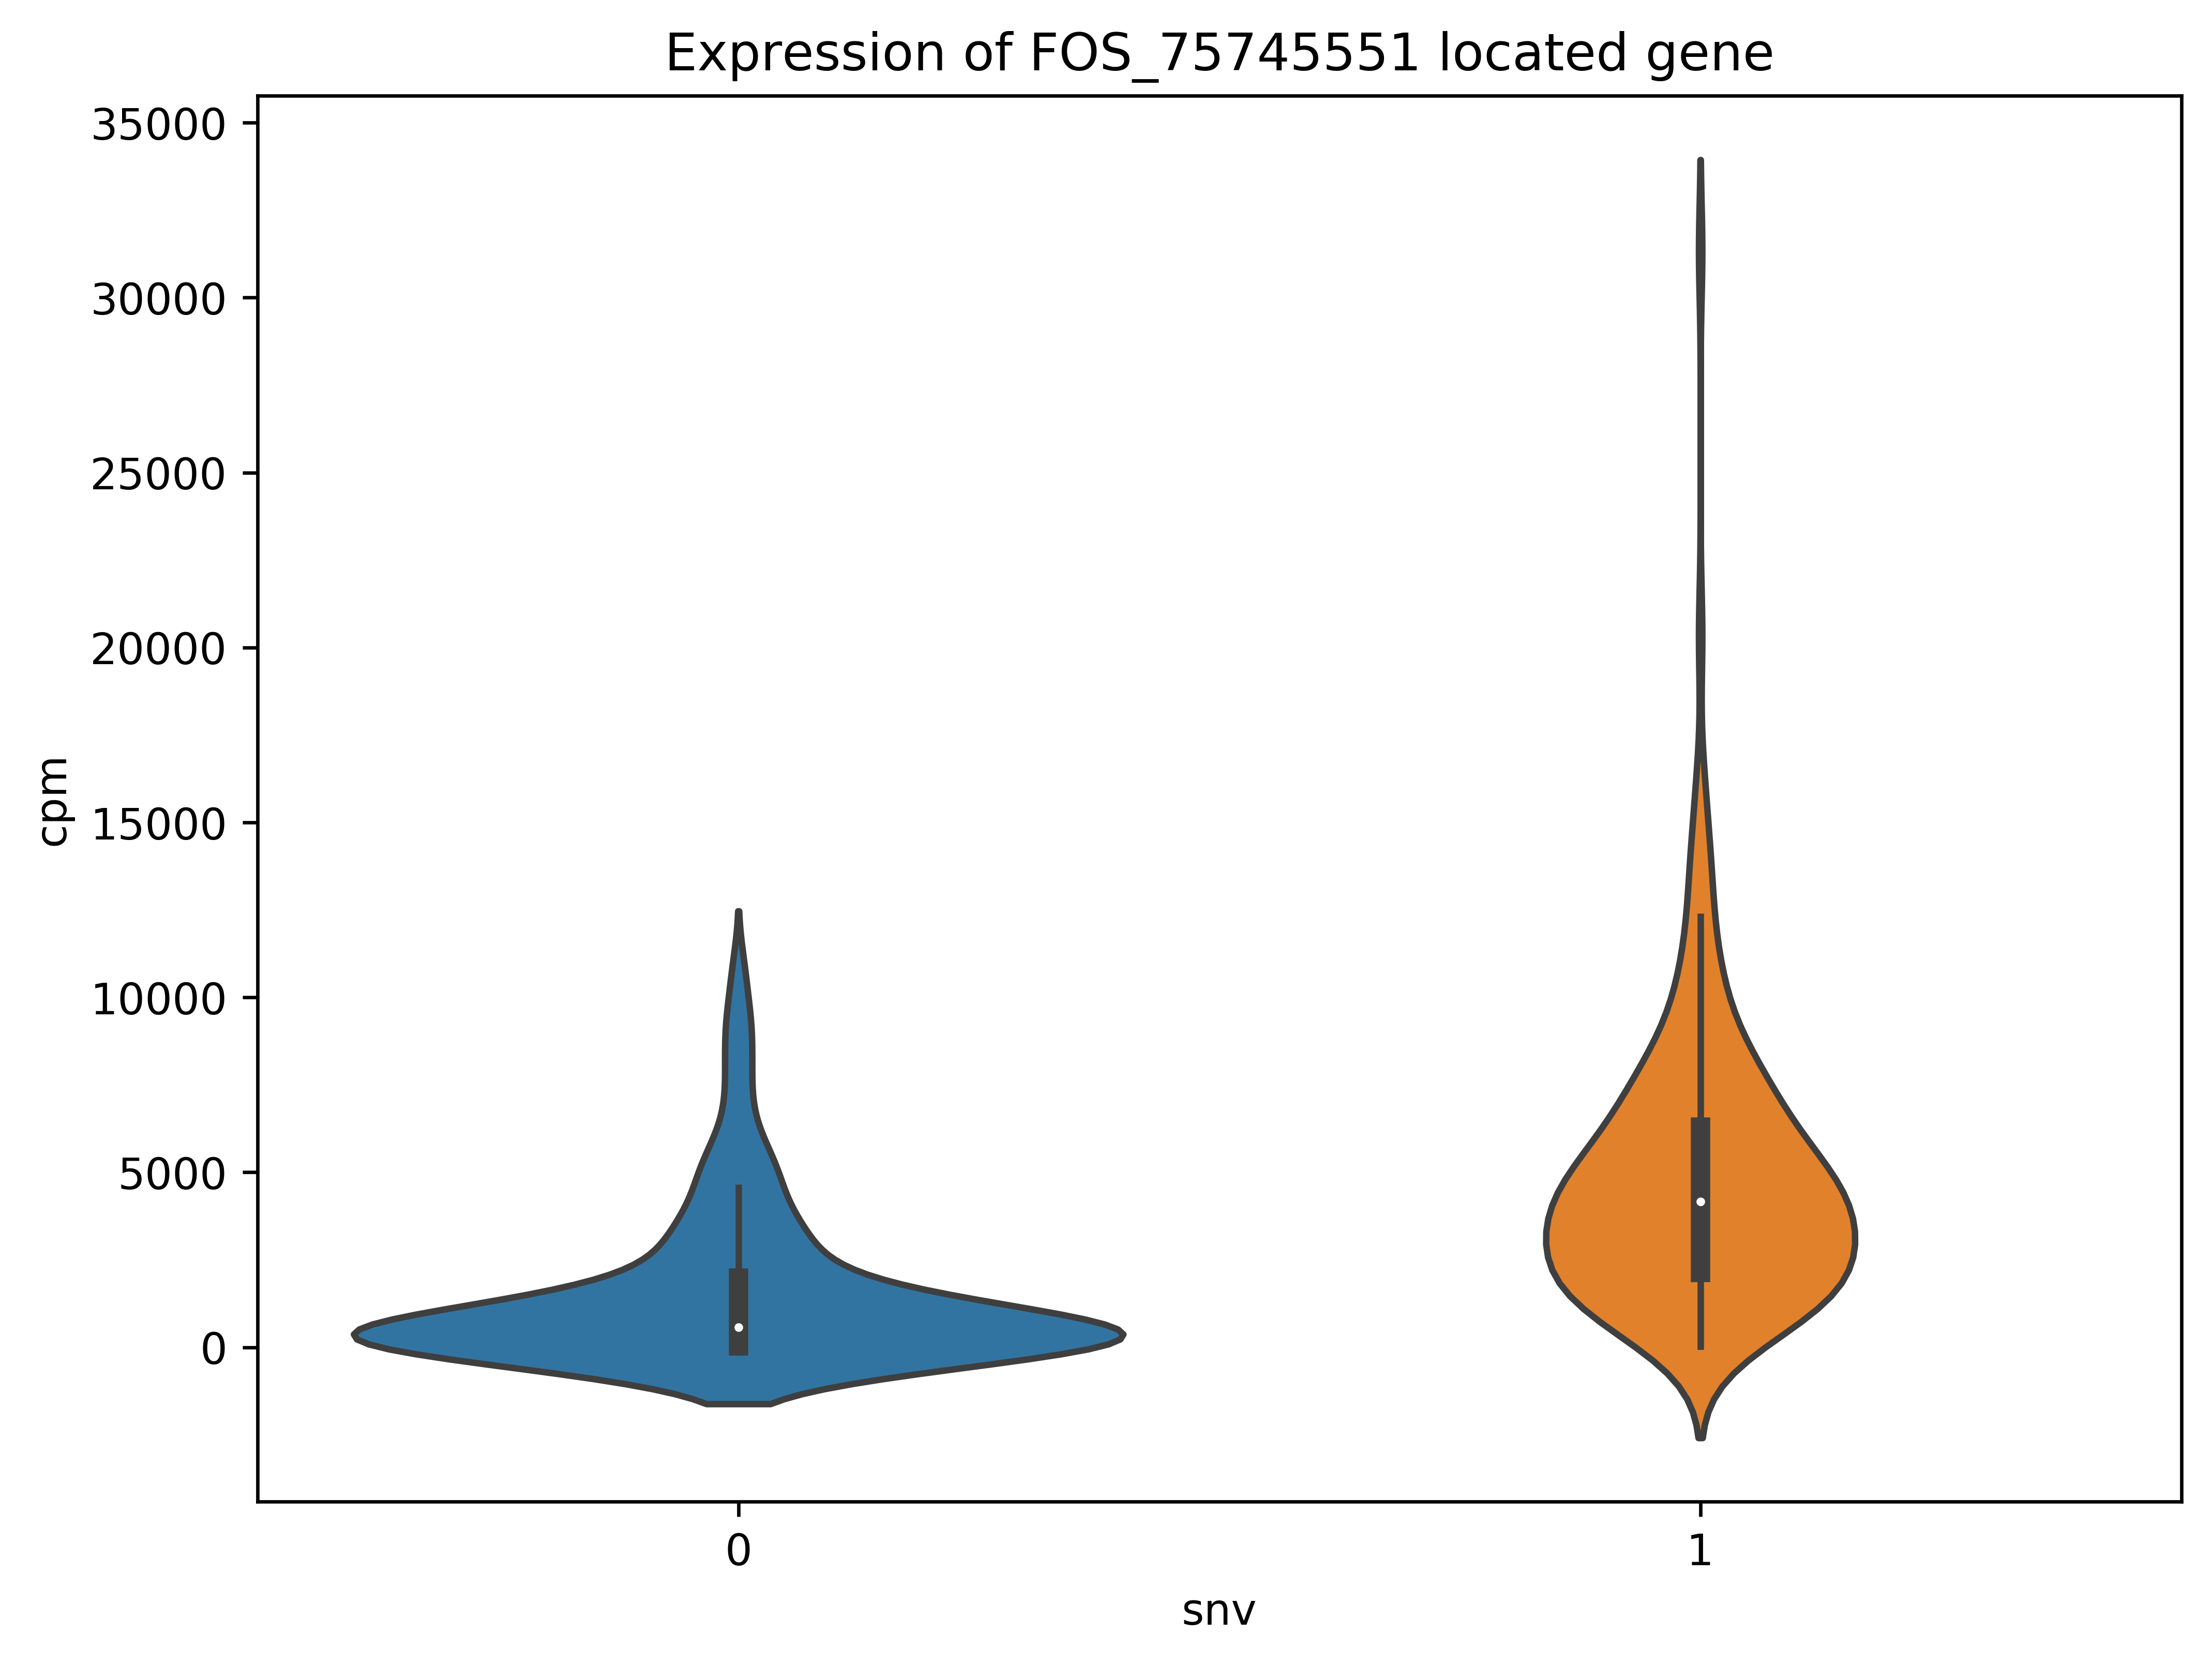

In [55]:
ax = sns.violinplot(x="snv", y="gene_snv", data=df_BCAS1_FOS)
ax.set(xlabel='snv', ylabel='cpm')
ax.set_title('Expression of FOS_75745551 located gene')

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Expression of FOS_75745551 target gene:BCAS1')

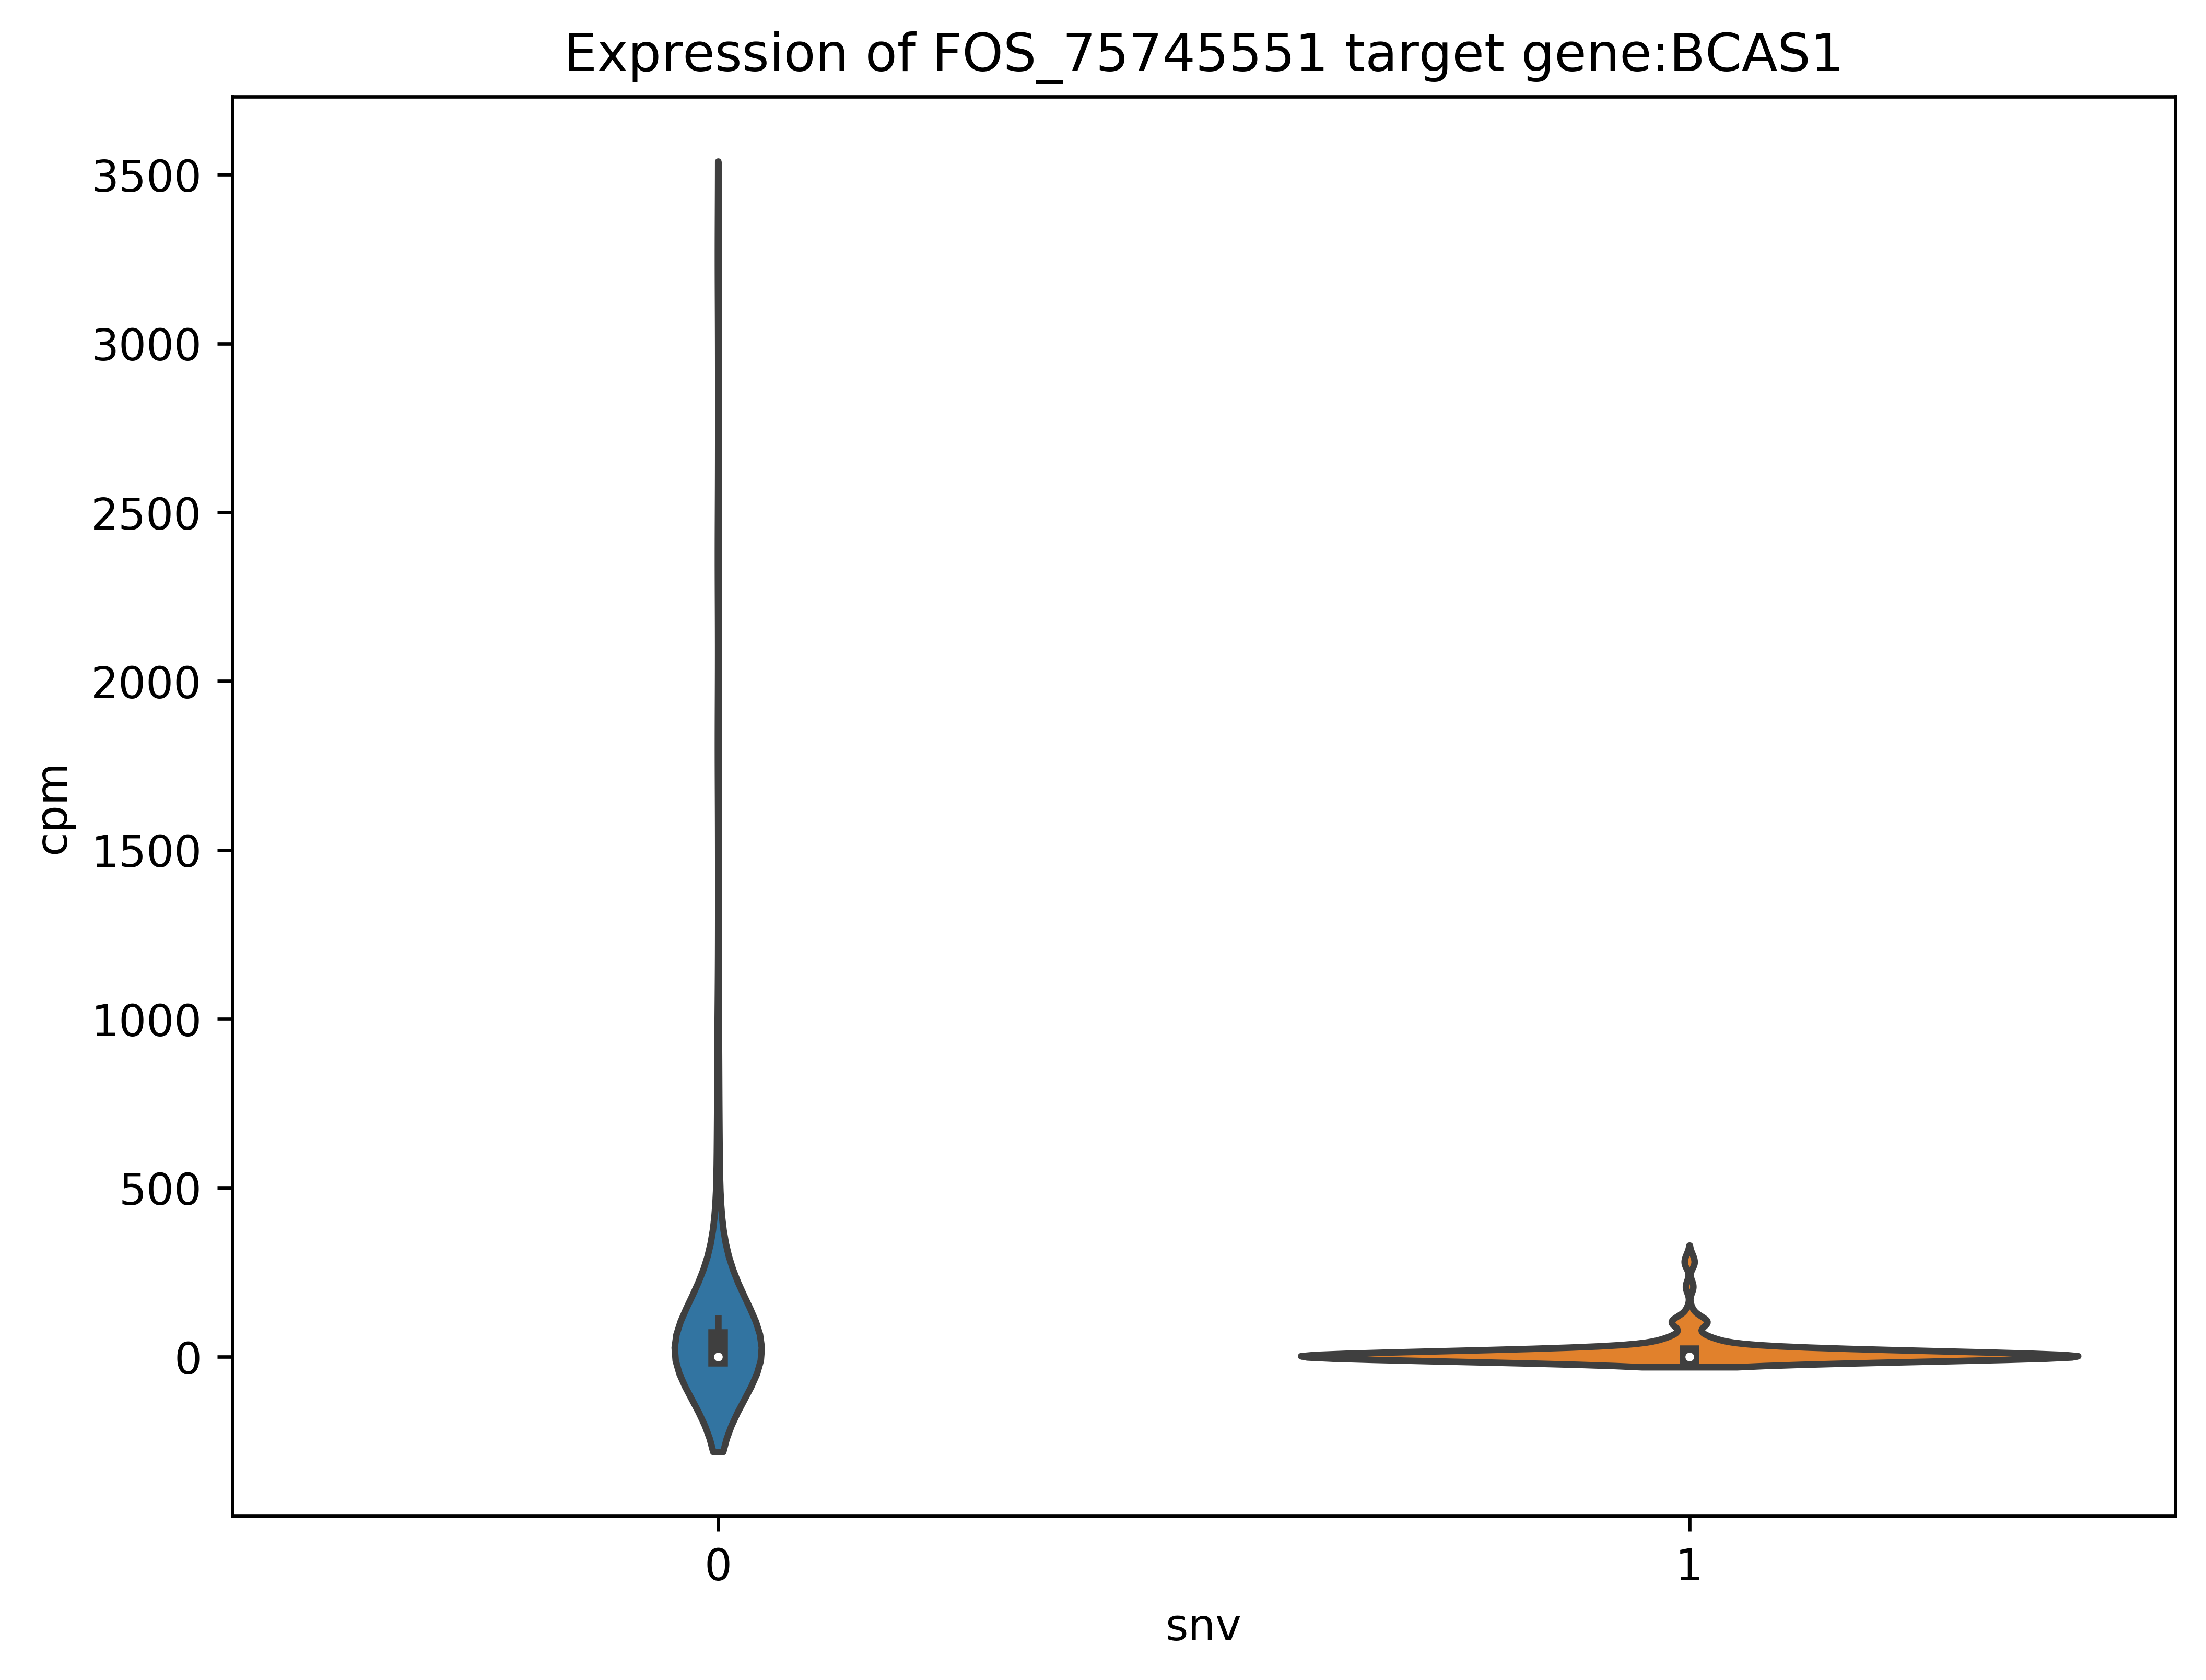

In [56]:
ax = sns.violinplot(x="snv", y="gene", data=df_BCAS1_FOS)
ax.set(xlabel='snv', ylabel='cpm')
ax.set_title('Expression of FOS_75745551 target gene:BCAS1')

In [57]:
df_CLDN11_FOS = pd.DataFrame({'gene':third_cpm_profile_patients.loc['ENSG00000013297.6',:],
                   'snv':third_snv_profile_patients.loc['chr14__75745551',:],
                   'gene_snv':exp_profile.loc['ENSG00000170345.5',third_cpm_profile_patients.columns.values],
                   'gene_snv_reads':reads_profile.loc['ENSG00000170345.5',third_cpm_profile_patients.columns.values]})

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Expression of FOS_75745551 target gene:CLDN11')

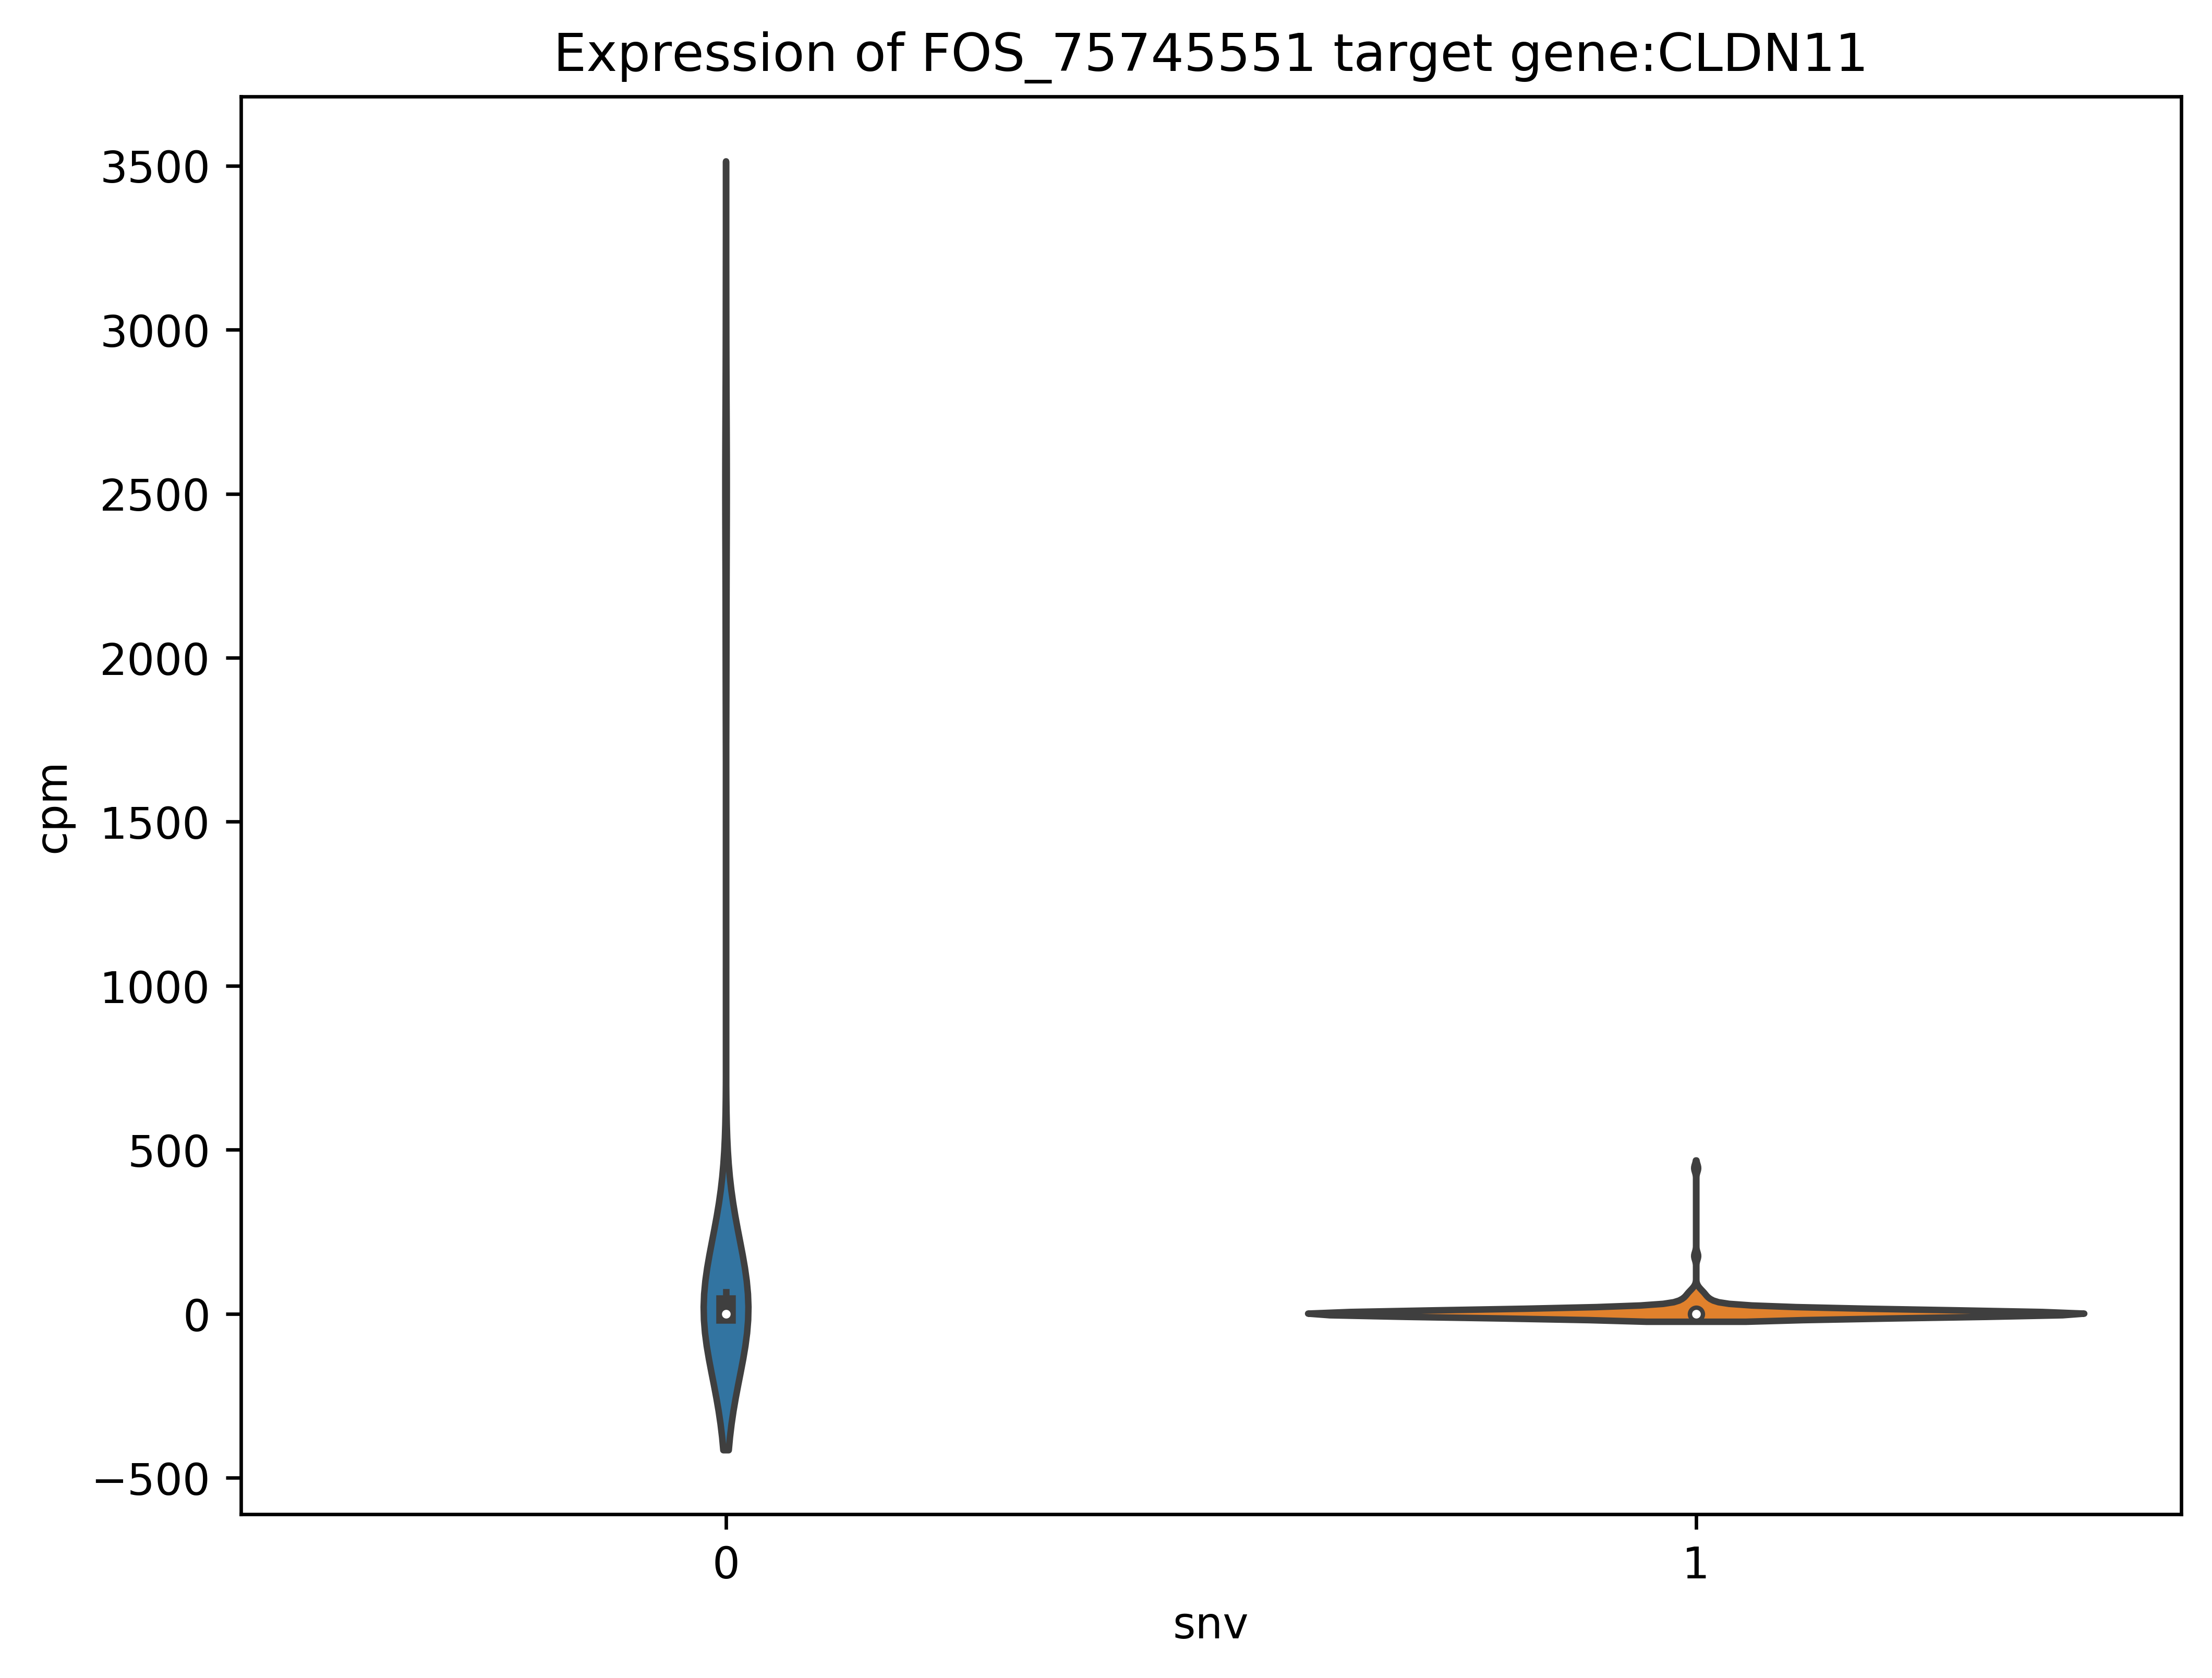

In [58]:
ax = sns.violinplot(x="snv", y="gene", data=df_CLDN11_FOS)
ax.set(xlabel='snv', ylabel='cpm')
ax.set_title('Expression of FOS_75745551 target gene:CLDN11')

In [ ]:
third_cpm_profile_patients.loc['ENSG00000013297.6',:].plot.hist()

# TAF7_140698400

chr5__140698400, SOX11(ENSG00000176887.5), TAF7(ENSG00000178913.5)


In [61]:
df_SOX11_TAF7 = pd.DataFrame({'gene':third_cpm_profile_patients.loc['ENSG00000176887.5',:],
                   'snv':third_snv_profile_patients.loc['chr5__140698400',:],
                   'gene_snv':exp_profile.loc['ENSG00000178913.5',third_cpm_profile_patients.columns.values],
                   'gene_snv_reads':reads_profile.loc['ENSG00000178913.5',third_cpm_profile_patients.columns.values]})

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Expression of TAF7_140698400 located gene')

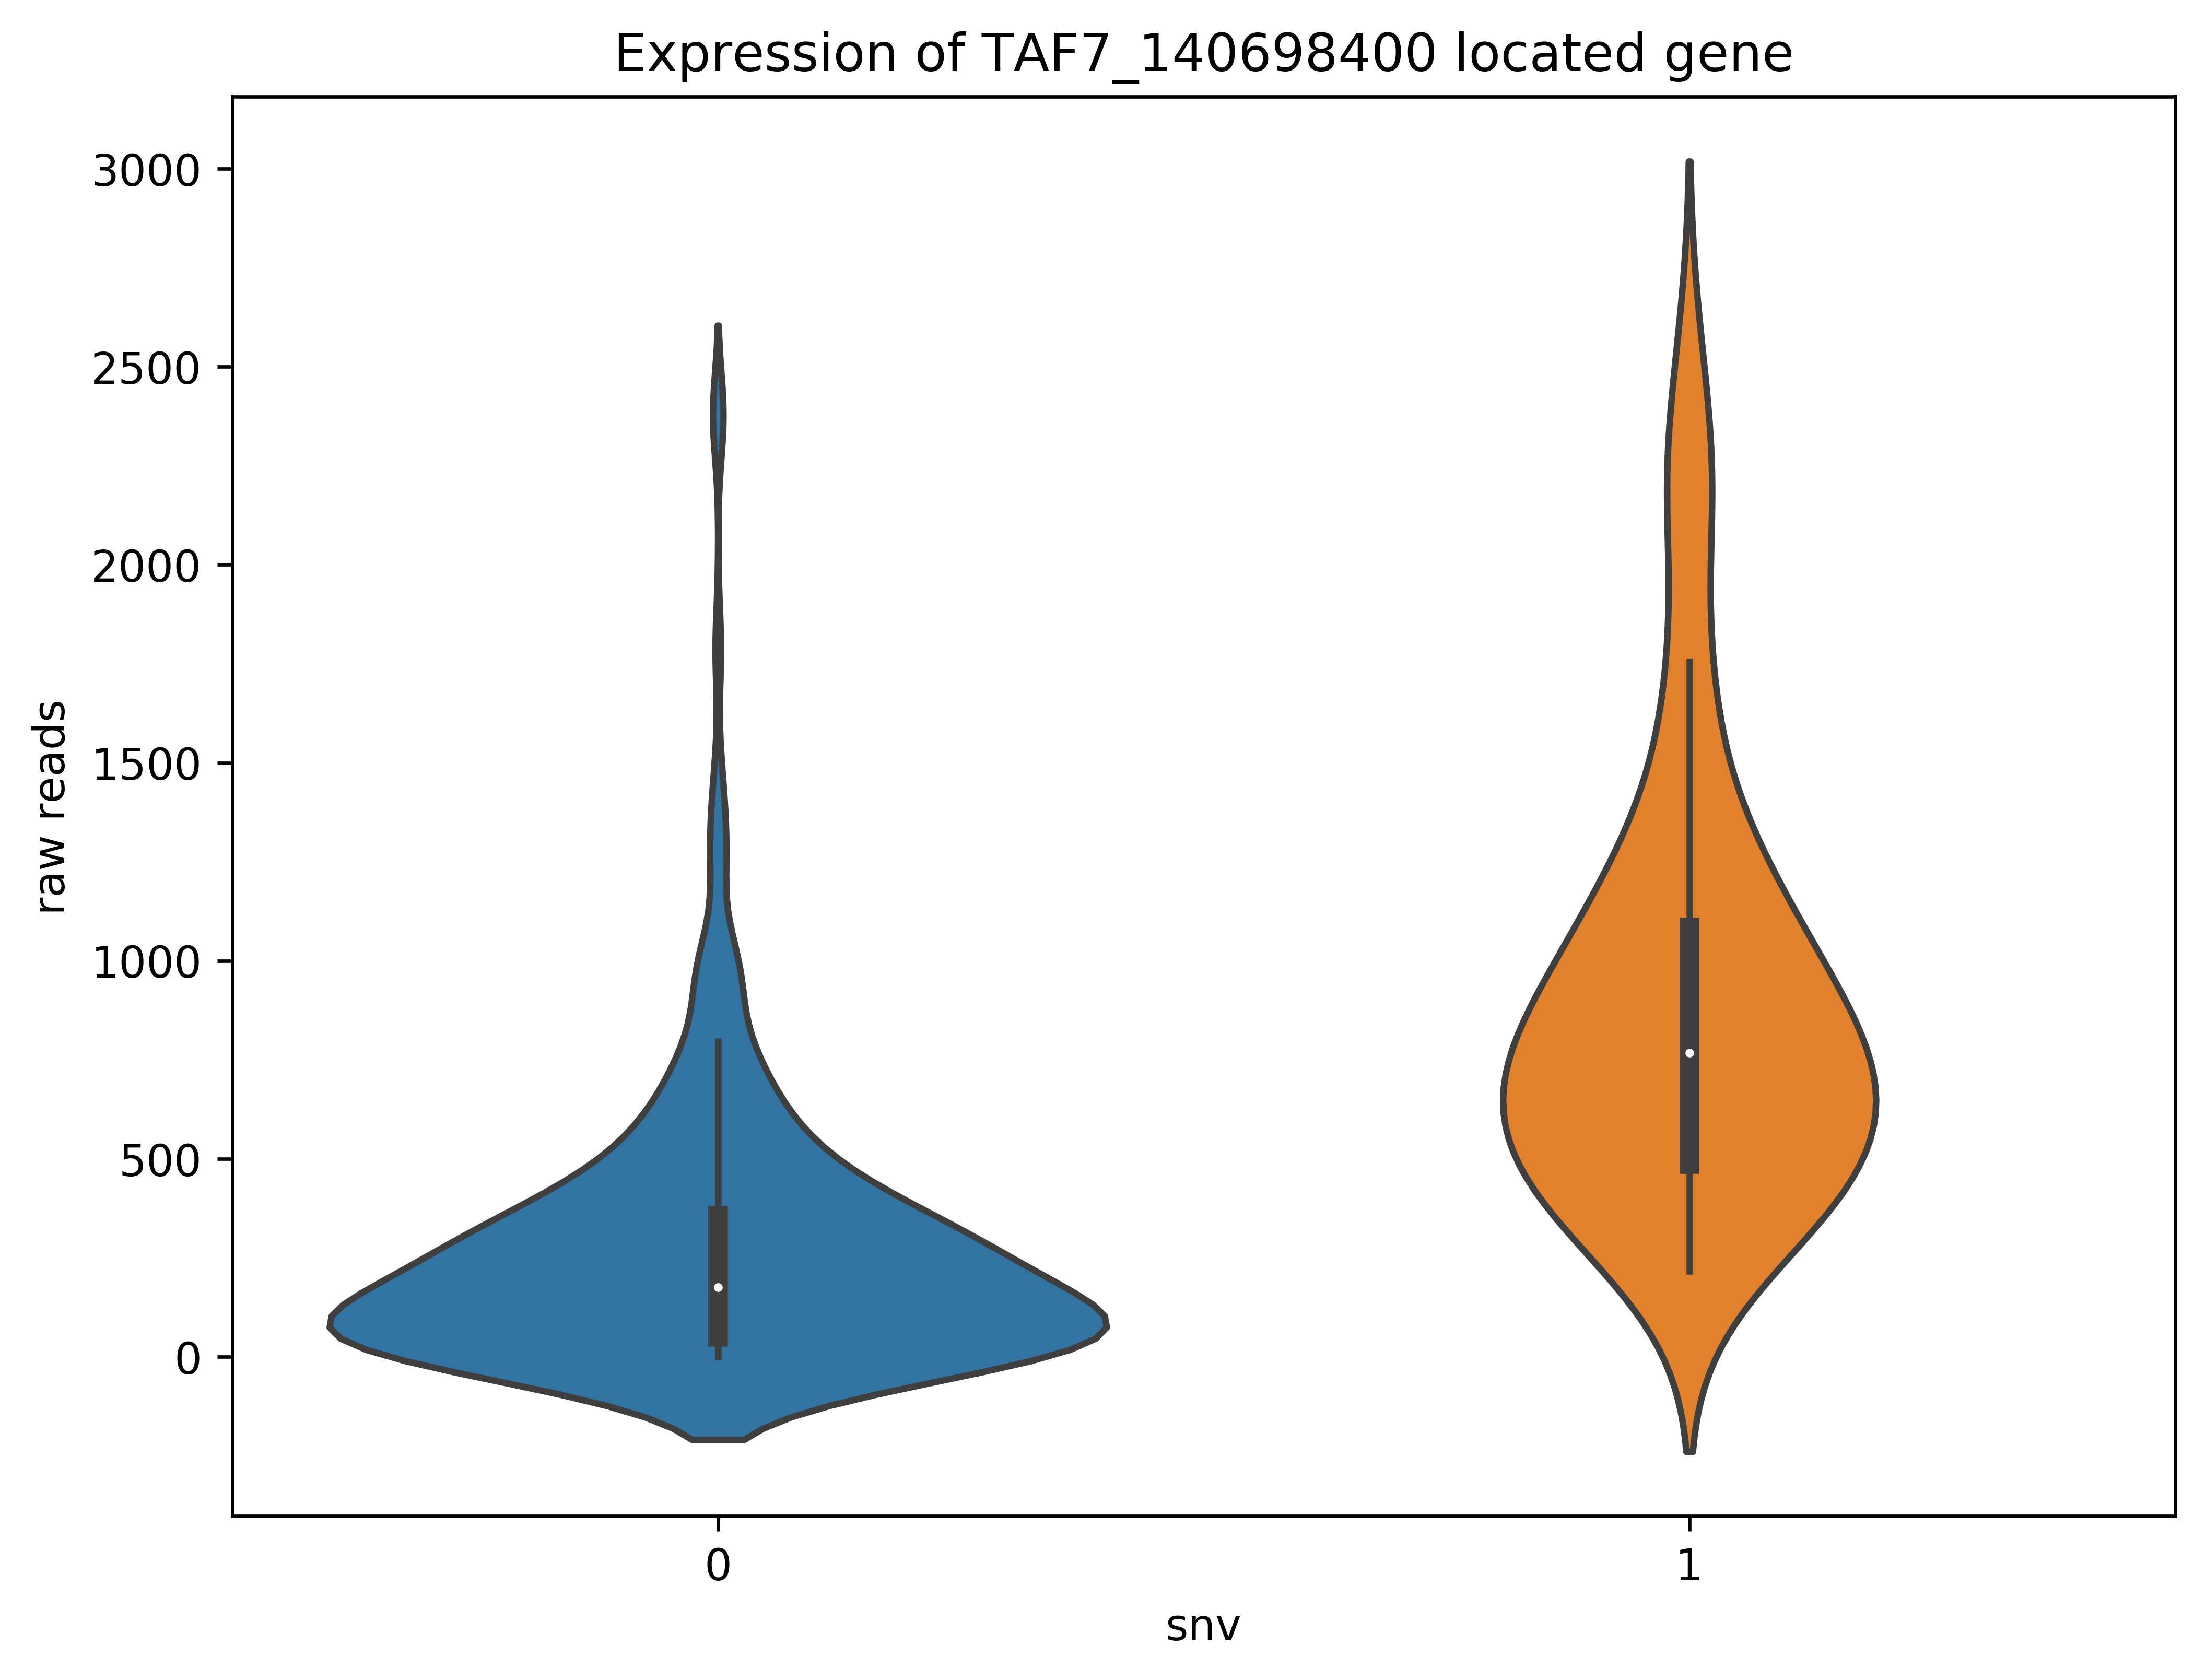

In [62]:
ax = sns.violinplot(x="snv", y="gene_snv_reads", data=df_SOX11_TAF7)
ax.set(xlabel='snv', ylabel='raw reads')
ax.set_title('Expression of TAF7_140698400 located gene')

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Expression of TAF7_140698400 located gene')

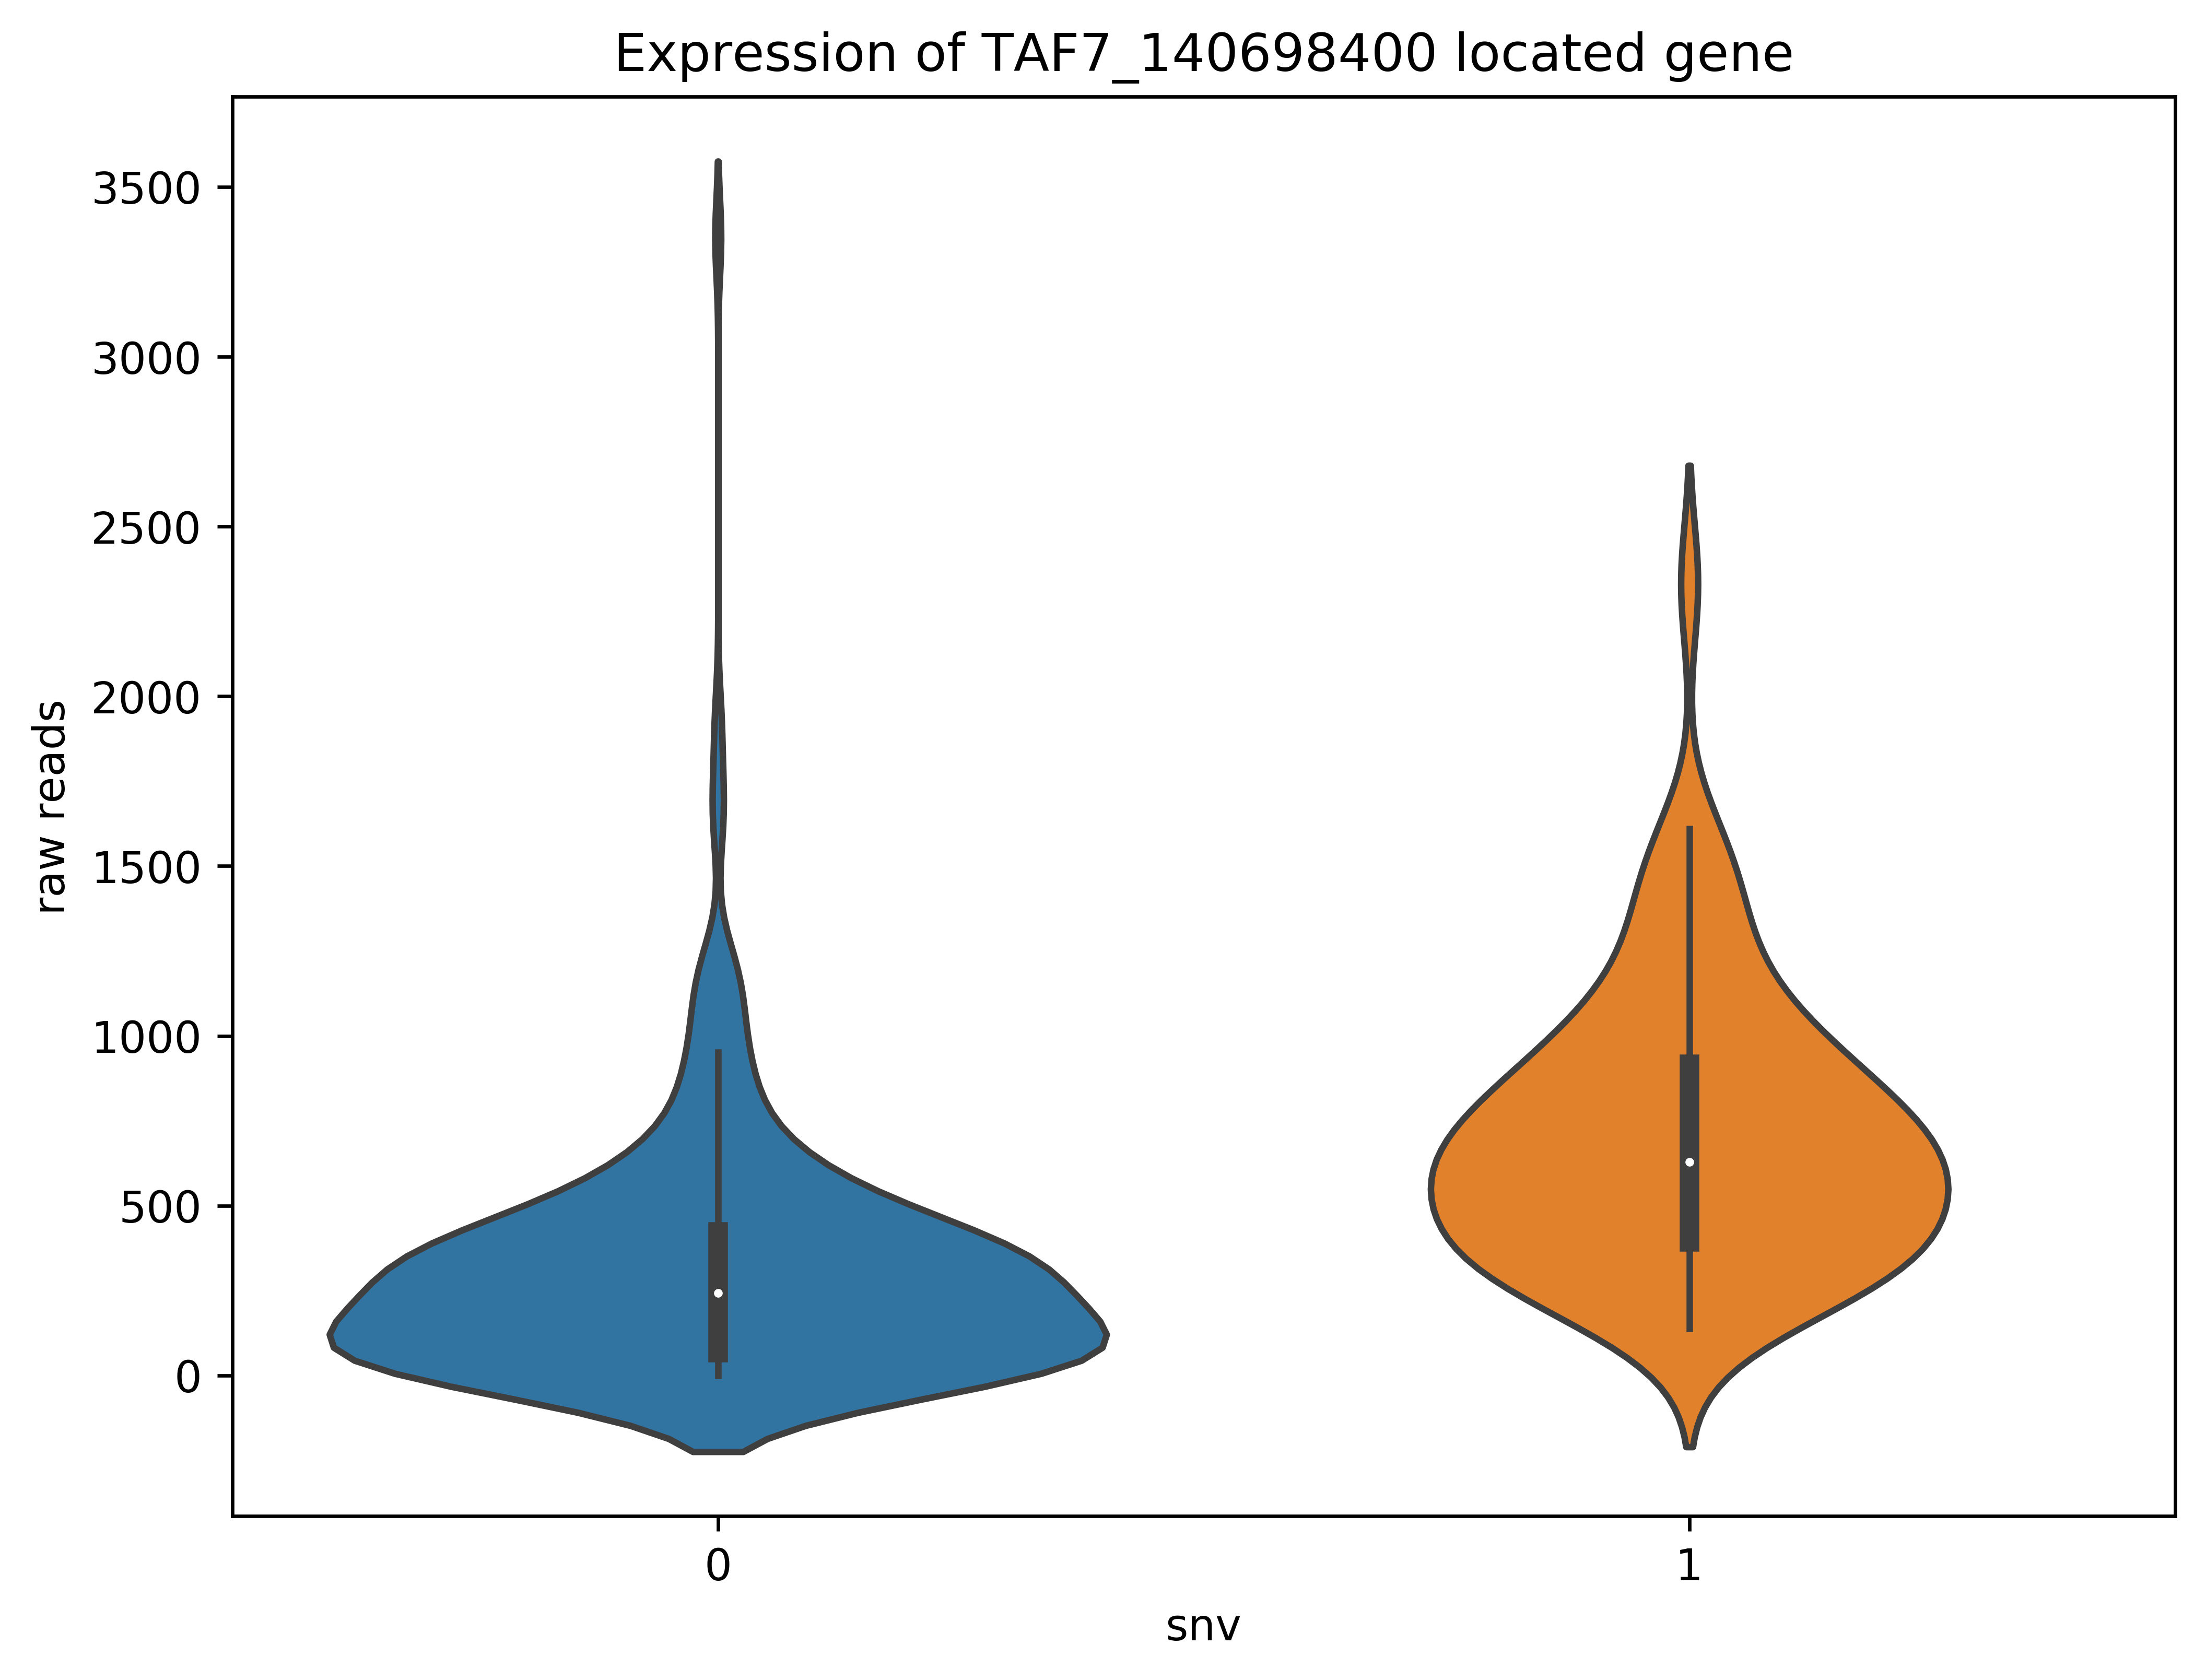

In [63]:
ax = sns.violinplot(x="snv", y="gene_snv", data=df_SOX11_TAF7)
ax.set(xlabel='snv', ylabel='raw reads')
ax.set_title('Expression of TAF7_140698400 located gene')

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Expression of TAF7_140698400 target gene:SOX11')

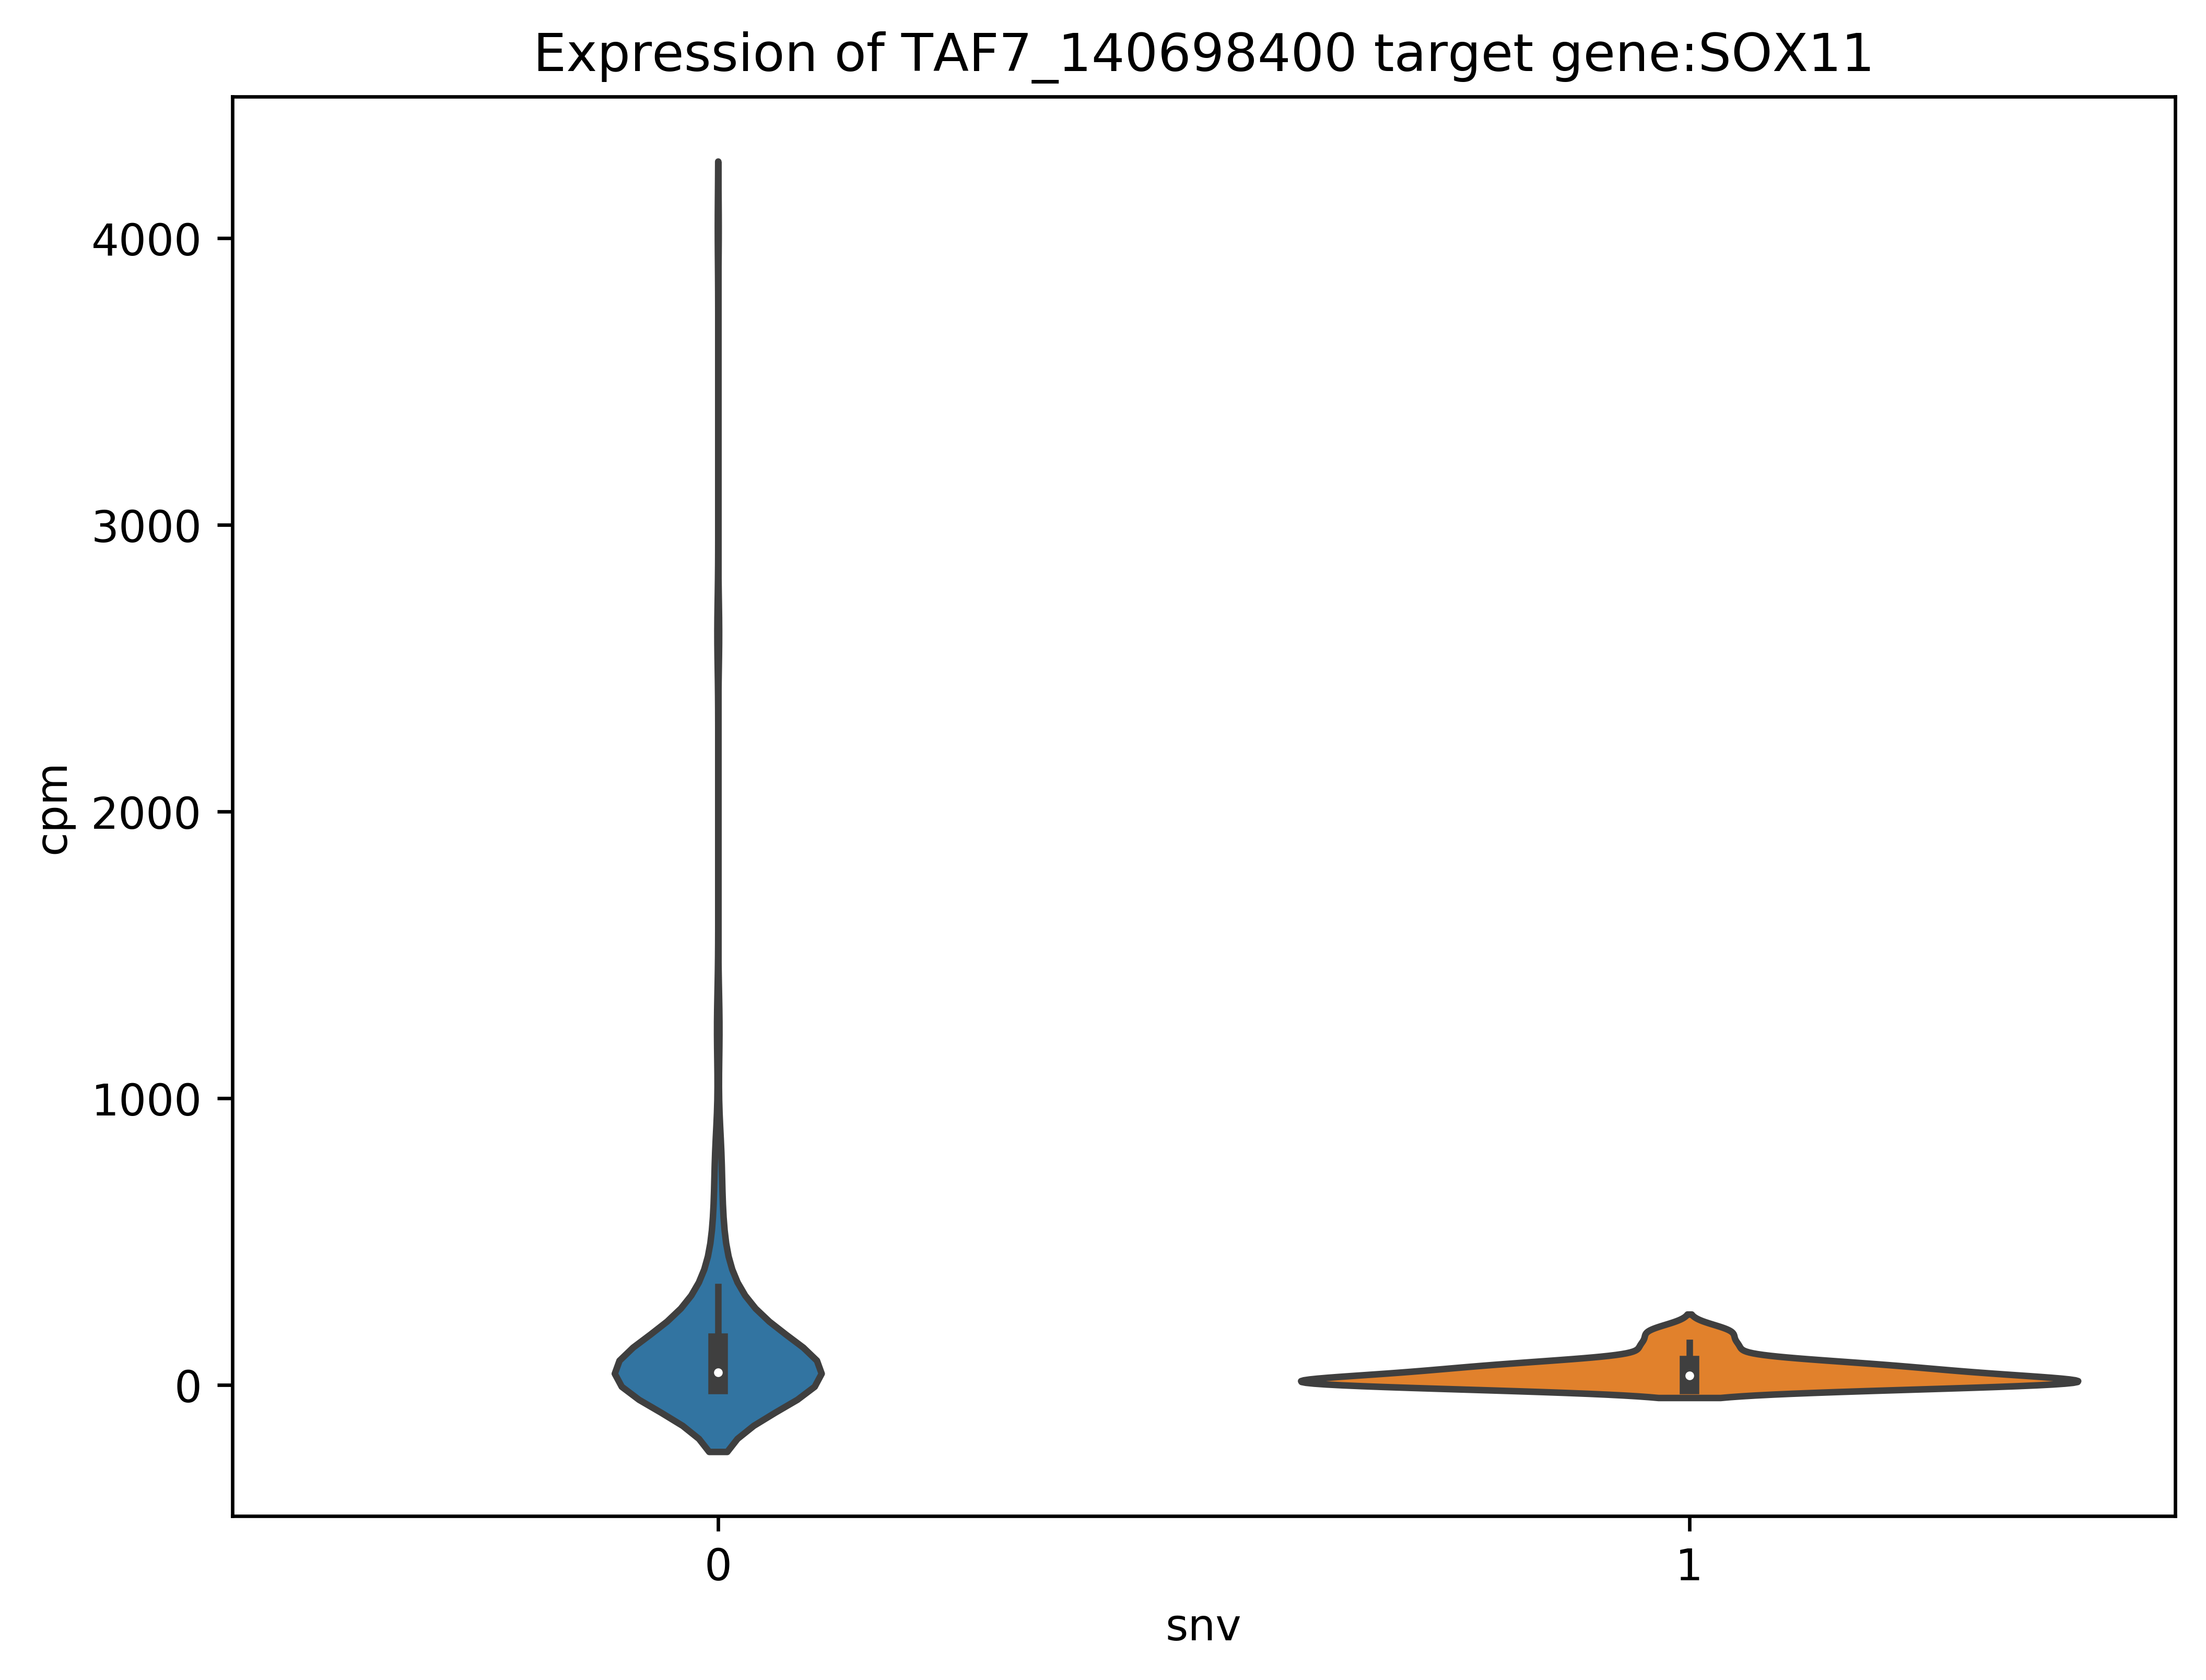

In [64]:
ax = sns.violinplot(x="snv", y="gene", data=df_SOX11_TAF7)
ax.set(xlabel='snv', ylabel='cpm')
ax.set_title('Expression of TAF7_140698400 target gene:SOX11')

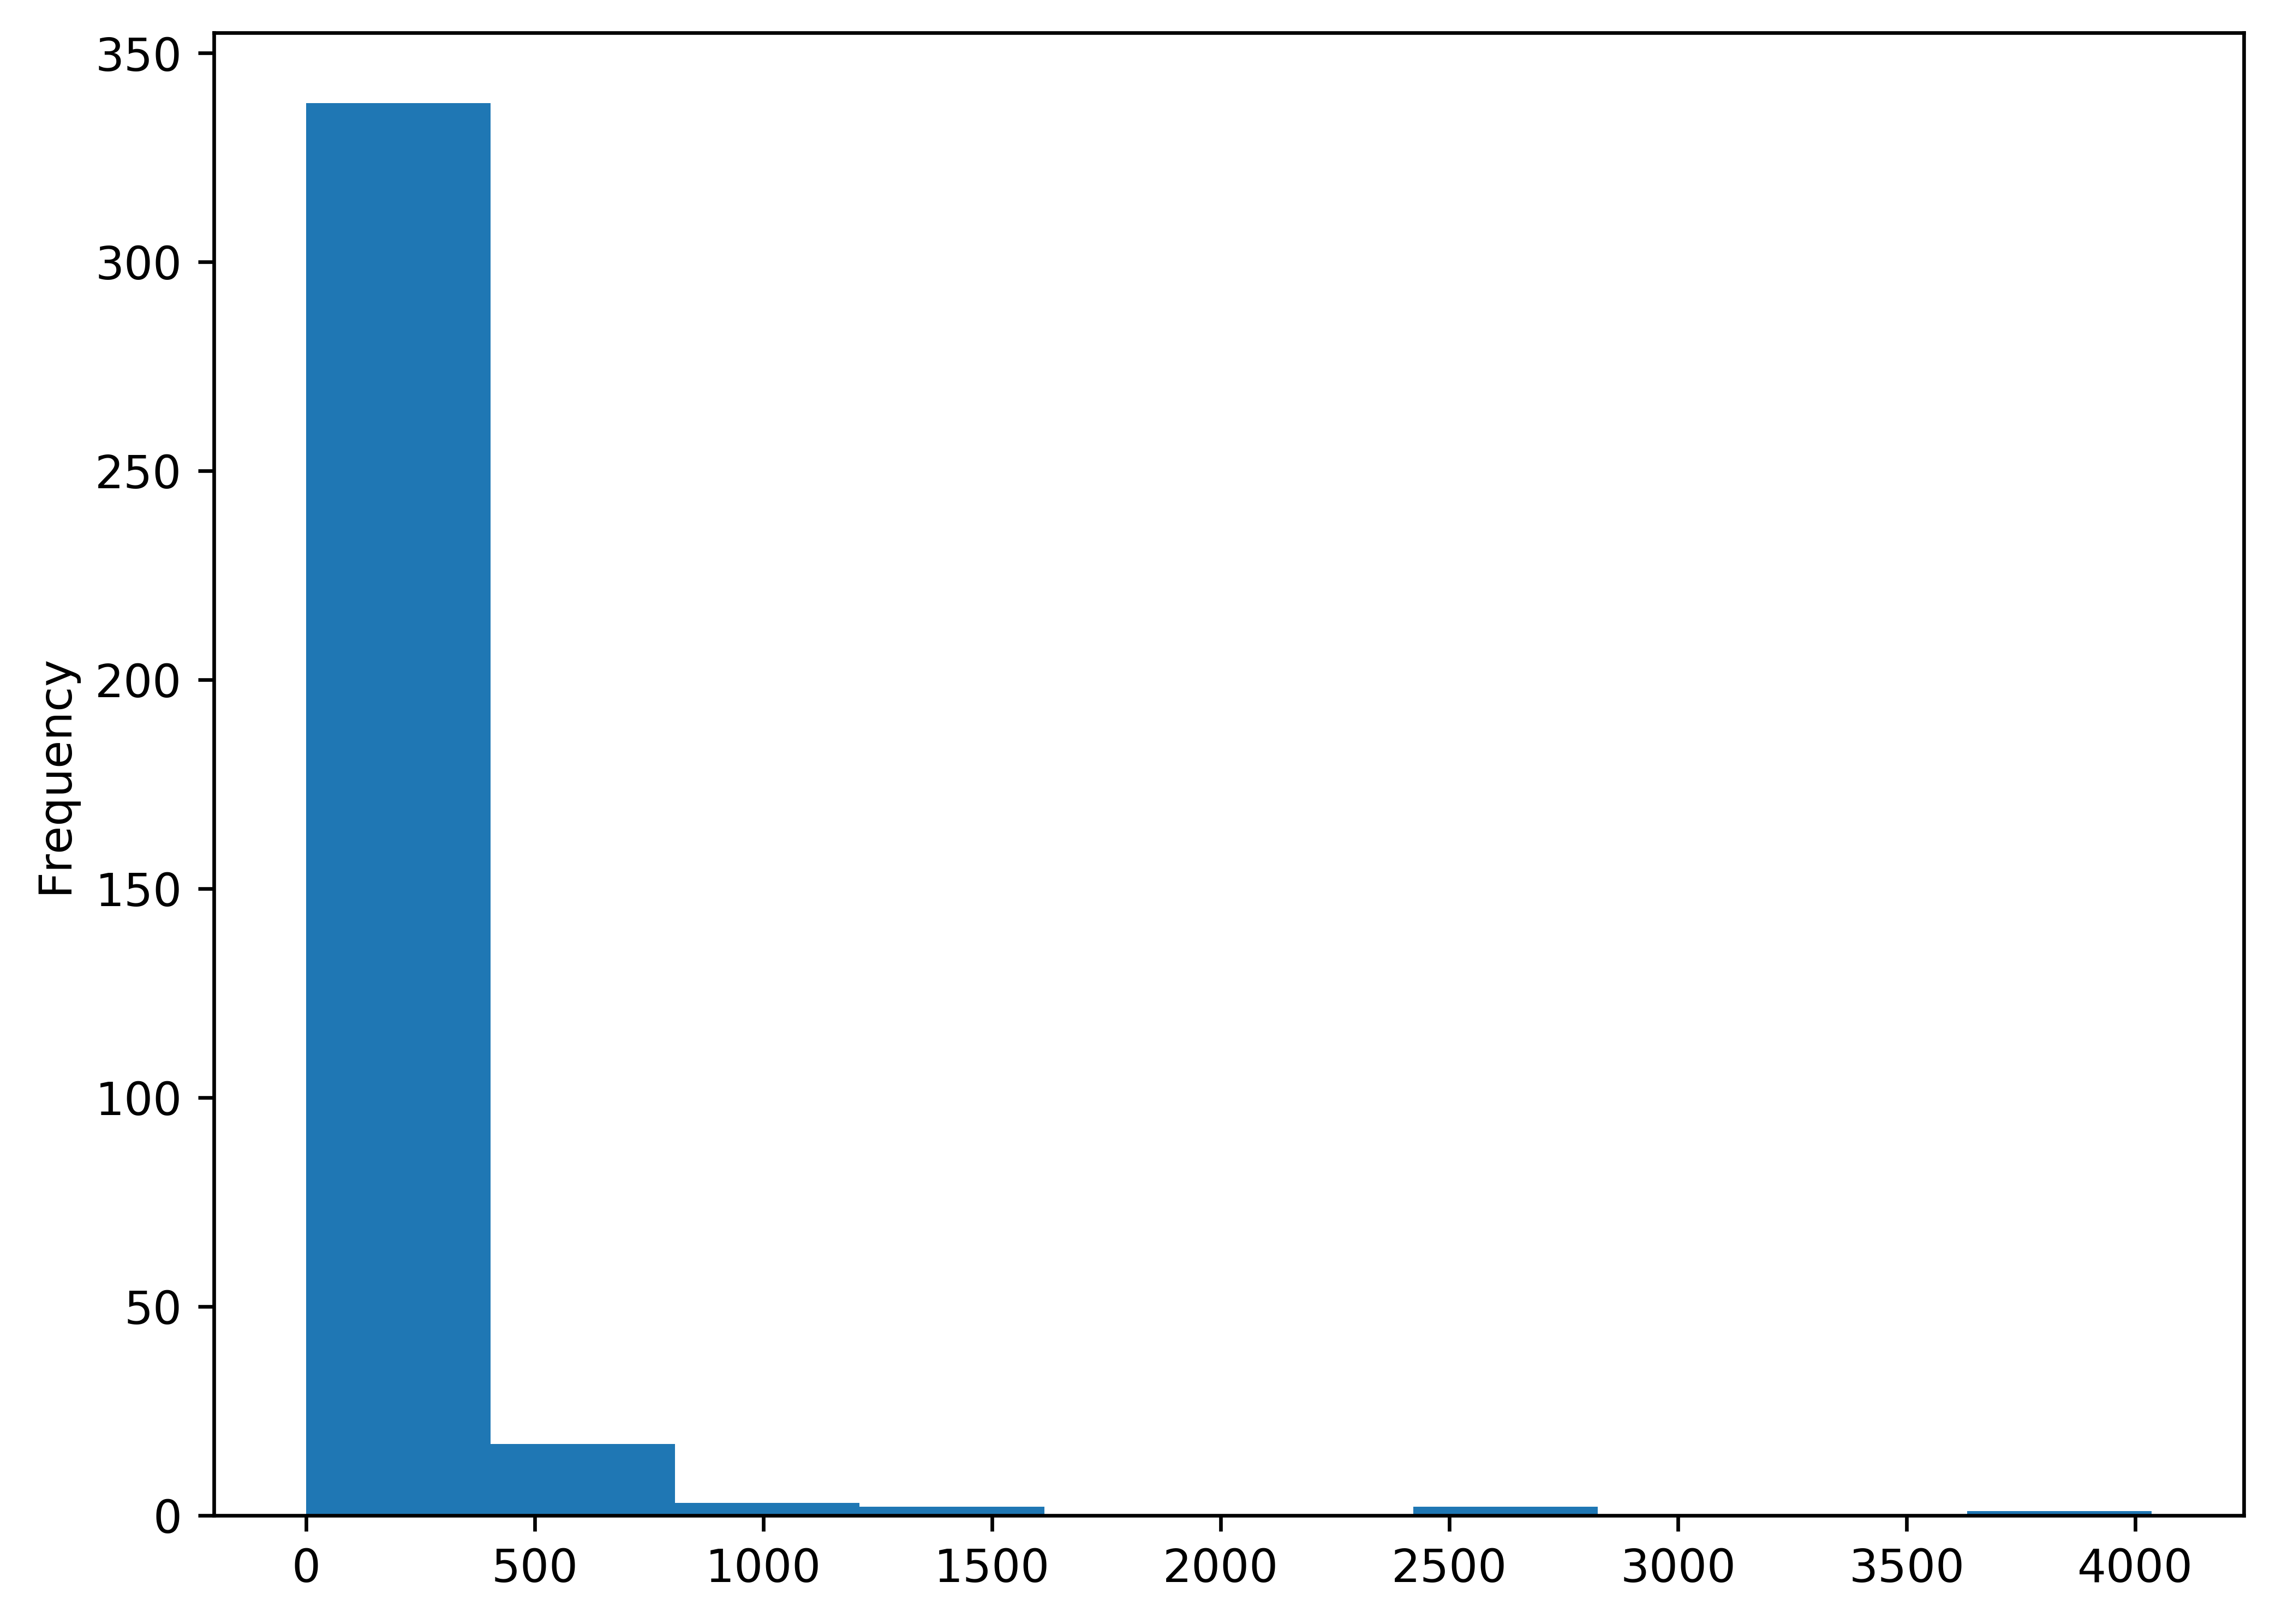

In [66]:
df_SOX11_TAF7.gene.plot.hist()

# ZC3H11A_203821314

cellline \
chr1__203821314(rs41264265), GPM6A(ENSG00000150625.12), ZC3H11A(ENSG00000058673.11)

In [92]:
ZC3H11A_203821314_yes=pd.read_csv('/data8t/mtx/scSNV/just_for_test/code/analysis/splicing_analysis/data/ZC3H11A_203821314/rsem/ZC3H11A_203821314_yes_rsem.isoforms.target.txt',sep='\t')
ZC3H11A_203821314_no=pd.read_csv('/data8t/mtx/scSNV/just_for_test/code/analysis/splicing_analysis/data/ZC3H11A_203821314/rsem/ZC3H11A_203821314_no_rsem.isoforms.target.txt',sep='\t')

In [95]:
ZC3H11A_203821314_located_transcripts = ['ENST00000367214.1','ENST00000367212.3',
                                    'ENST00000332127.4','ENST00000495527.1',
                                    'ENST00000545588.1','ENST00000367210.1']

In [98]:
ZC3H11A_203821314_yes[ZC3H11A_203821314_yes.transcript_id.isin(ZC3H11A_203821314_located_transcripts)].IsoPct.sum()

65.08

In [99]:
ZC3H11A_203821314_no[ZC3H11A_203821314_no.transcript_id.isin(ZC3H11A_203821314_located_transcripts)].IsoPct.sum()

58.28

In [82]:
df_GPM6A_ZC3H11A = pd.DataFrame({'gene':third_cpm_profile_cellline.loc['ENSG00000150625.12',:],
                   'snv':third_snv_profile_cellline.loc['chr1__203821314',:],
                   'gene_snv':exp_profile.loc['ENSG00000058673.11',third_cpm_profile_cellline.columns.values],
                   'gene_snv_reads':reads_profile.loc['ENSG00000058673.11',third_cpm_profile_cellline.columns.values]})

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Expression of ZC3H11A_203821314 located gene')

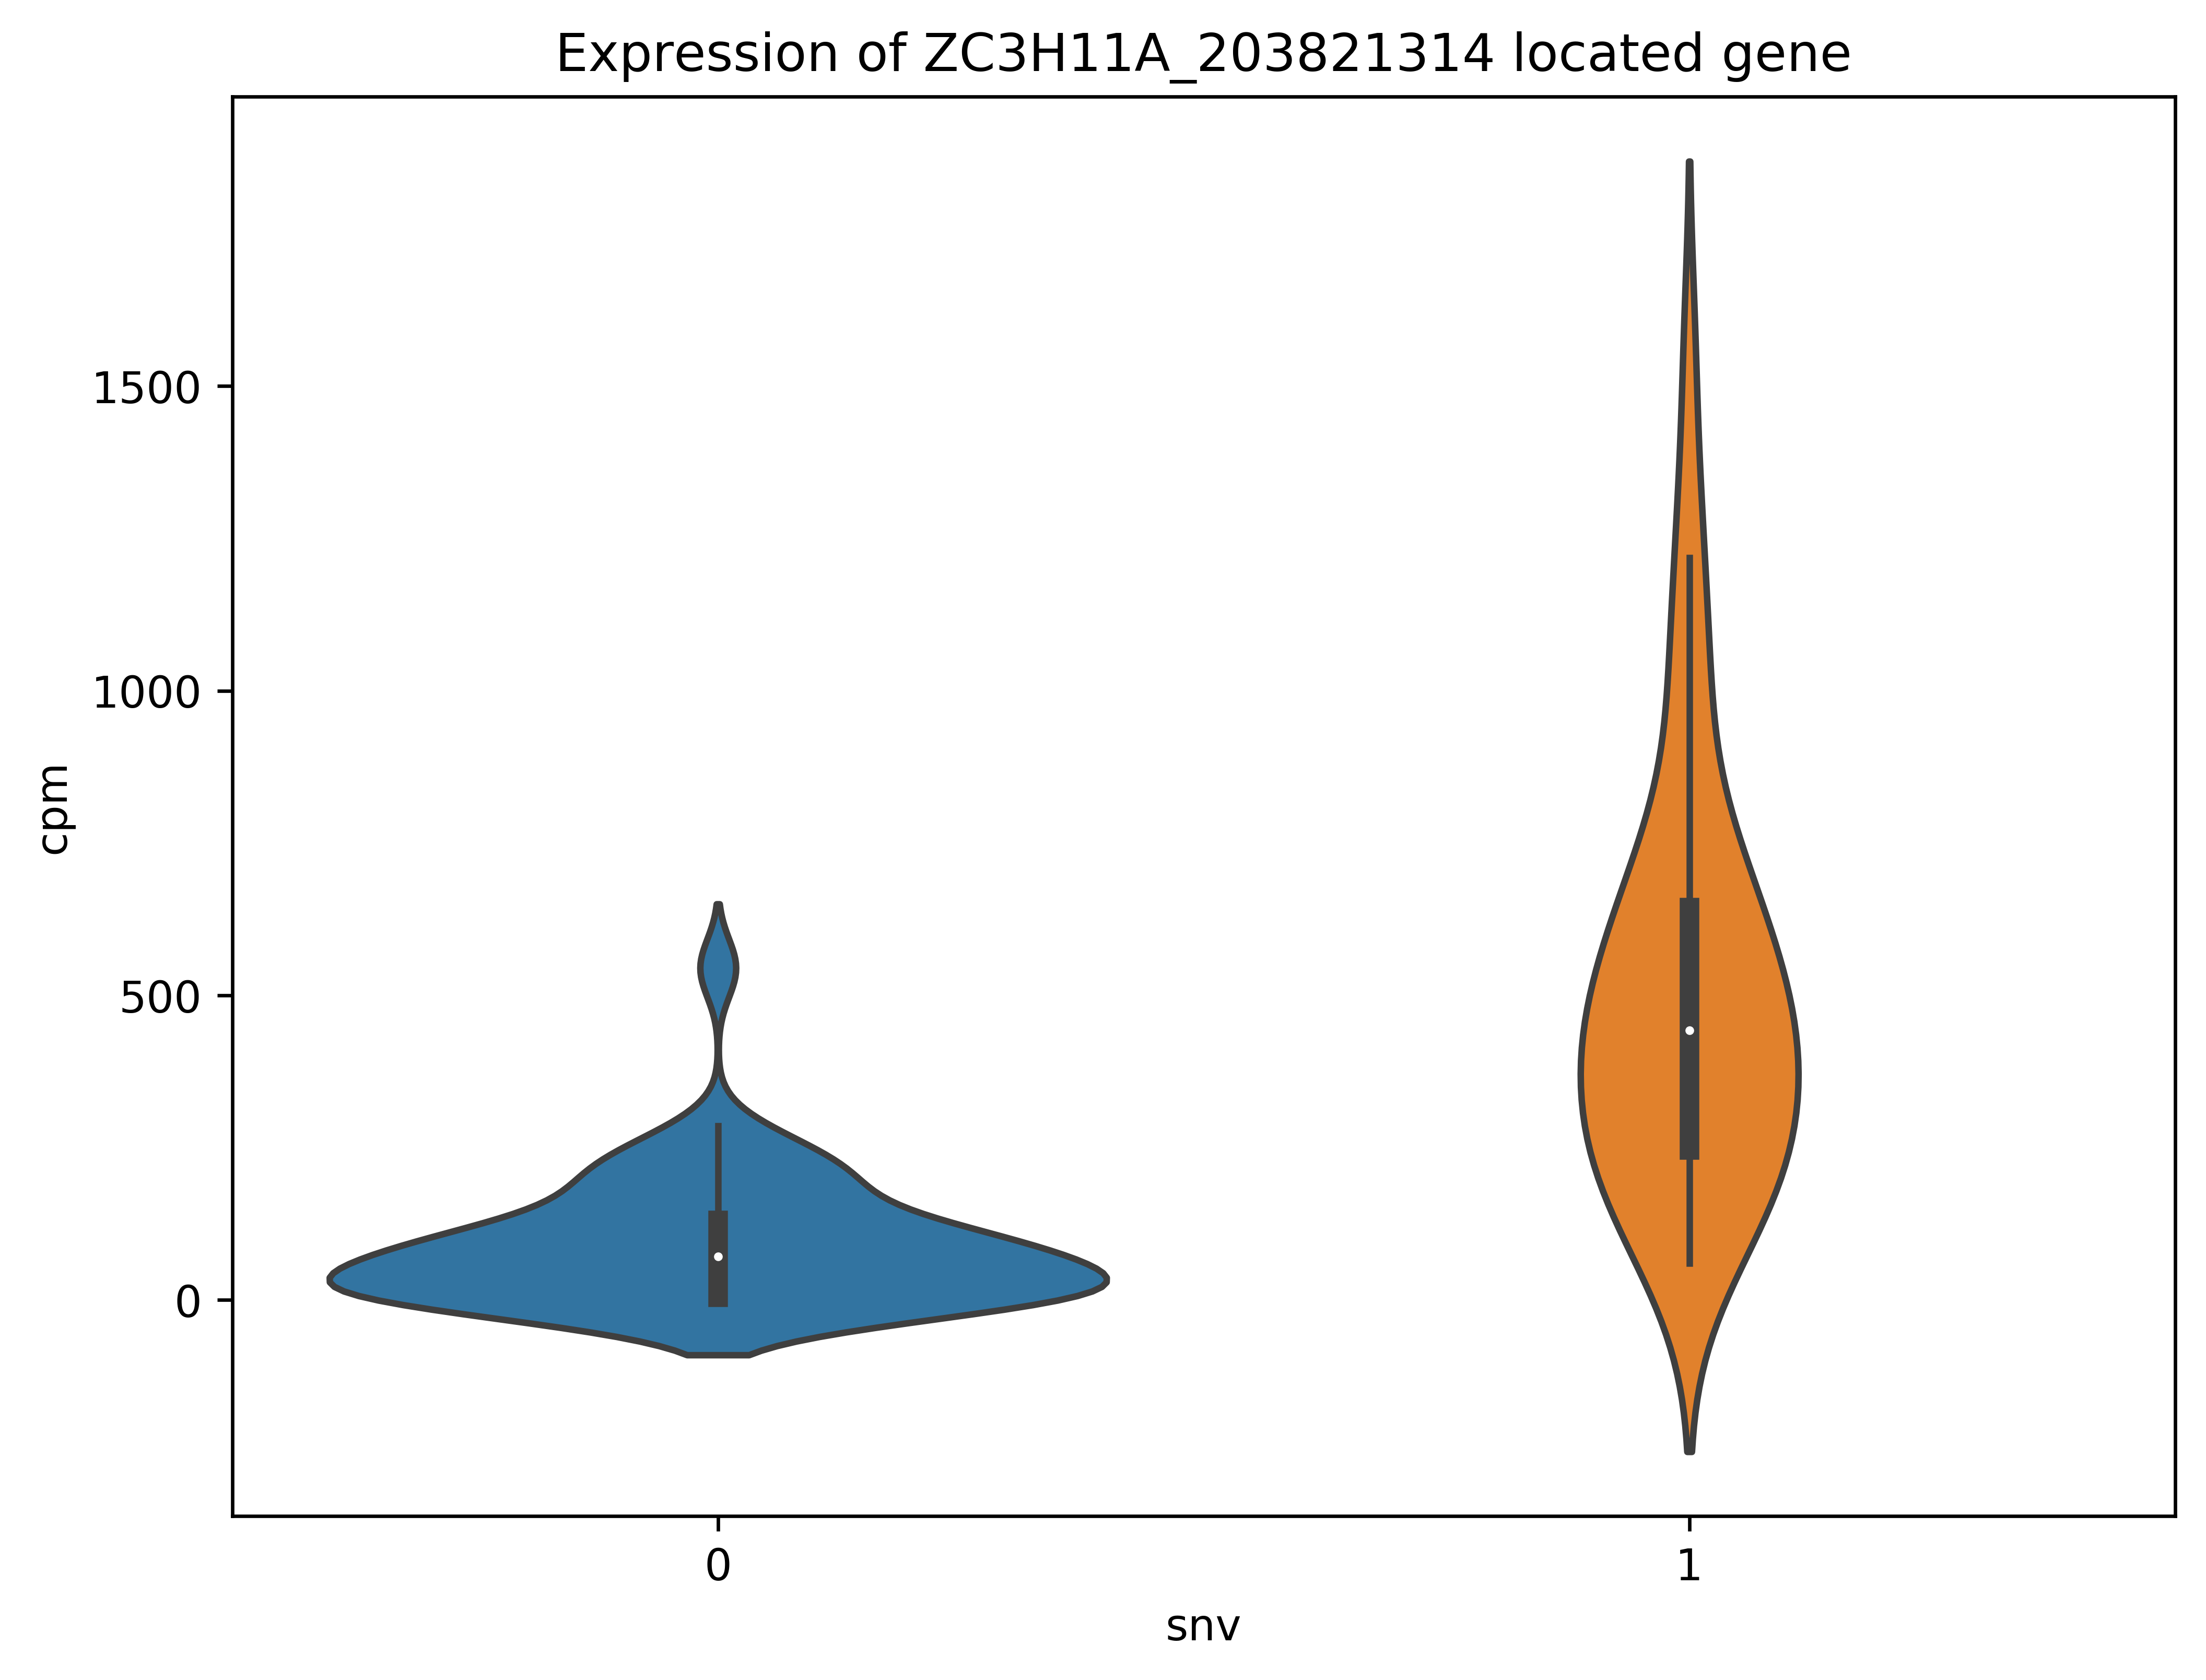

In [84]:
ax = sns.violinplot(x="snv", y="gene_snv", data=df_GPM6A_ZC3H11A)
ax.set(xlabel='snv', ylabel='cpm')
ax.set_title('Expression of ZC3H11A_203821314 located gene')

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Expression of ZC3H11A_203821314 located gene')

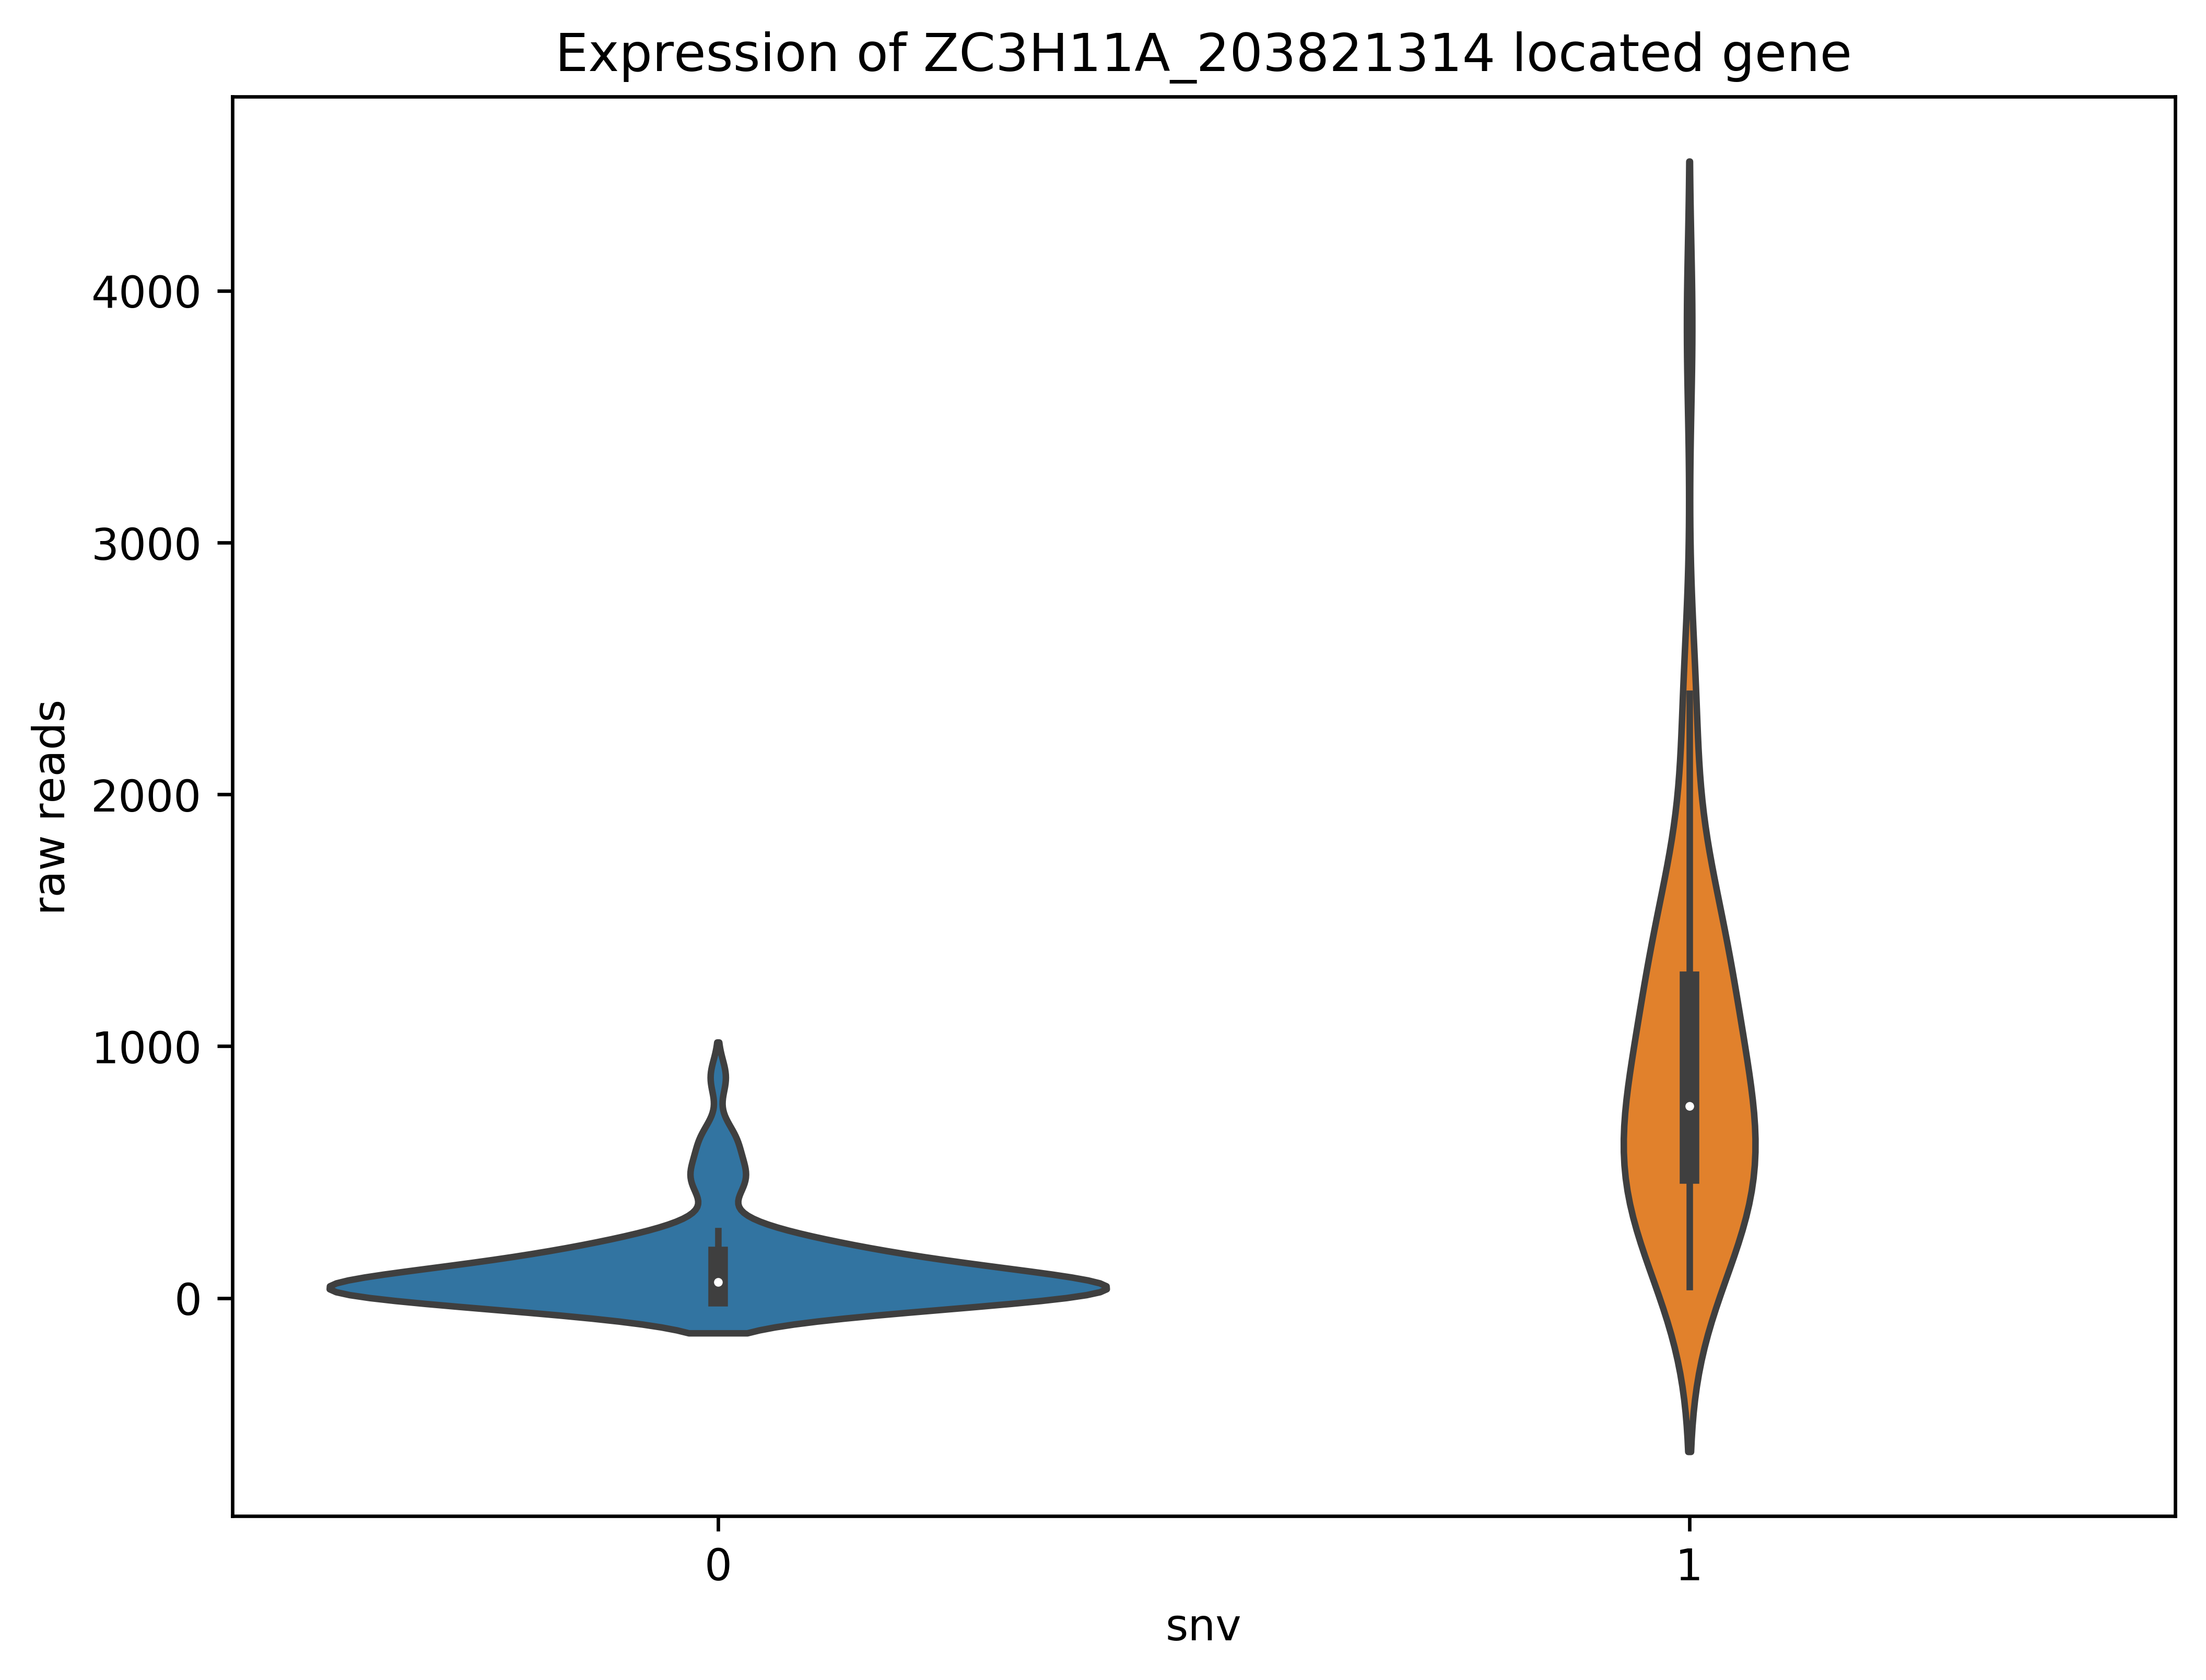

In [85]:
ax = sns.violinplot(x="snv", y="gene_snv_reads", data=df_GPM6A_ZC3H11A)
ax.set(xlabel='snv', ylabel='raw reads')
ax.set_title('Expression of ZC3H11A_203821314 located gene')

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Expression of ZC3H11A_203821314 target gene:GPM6A')

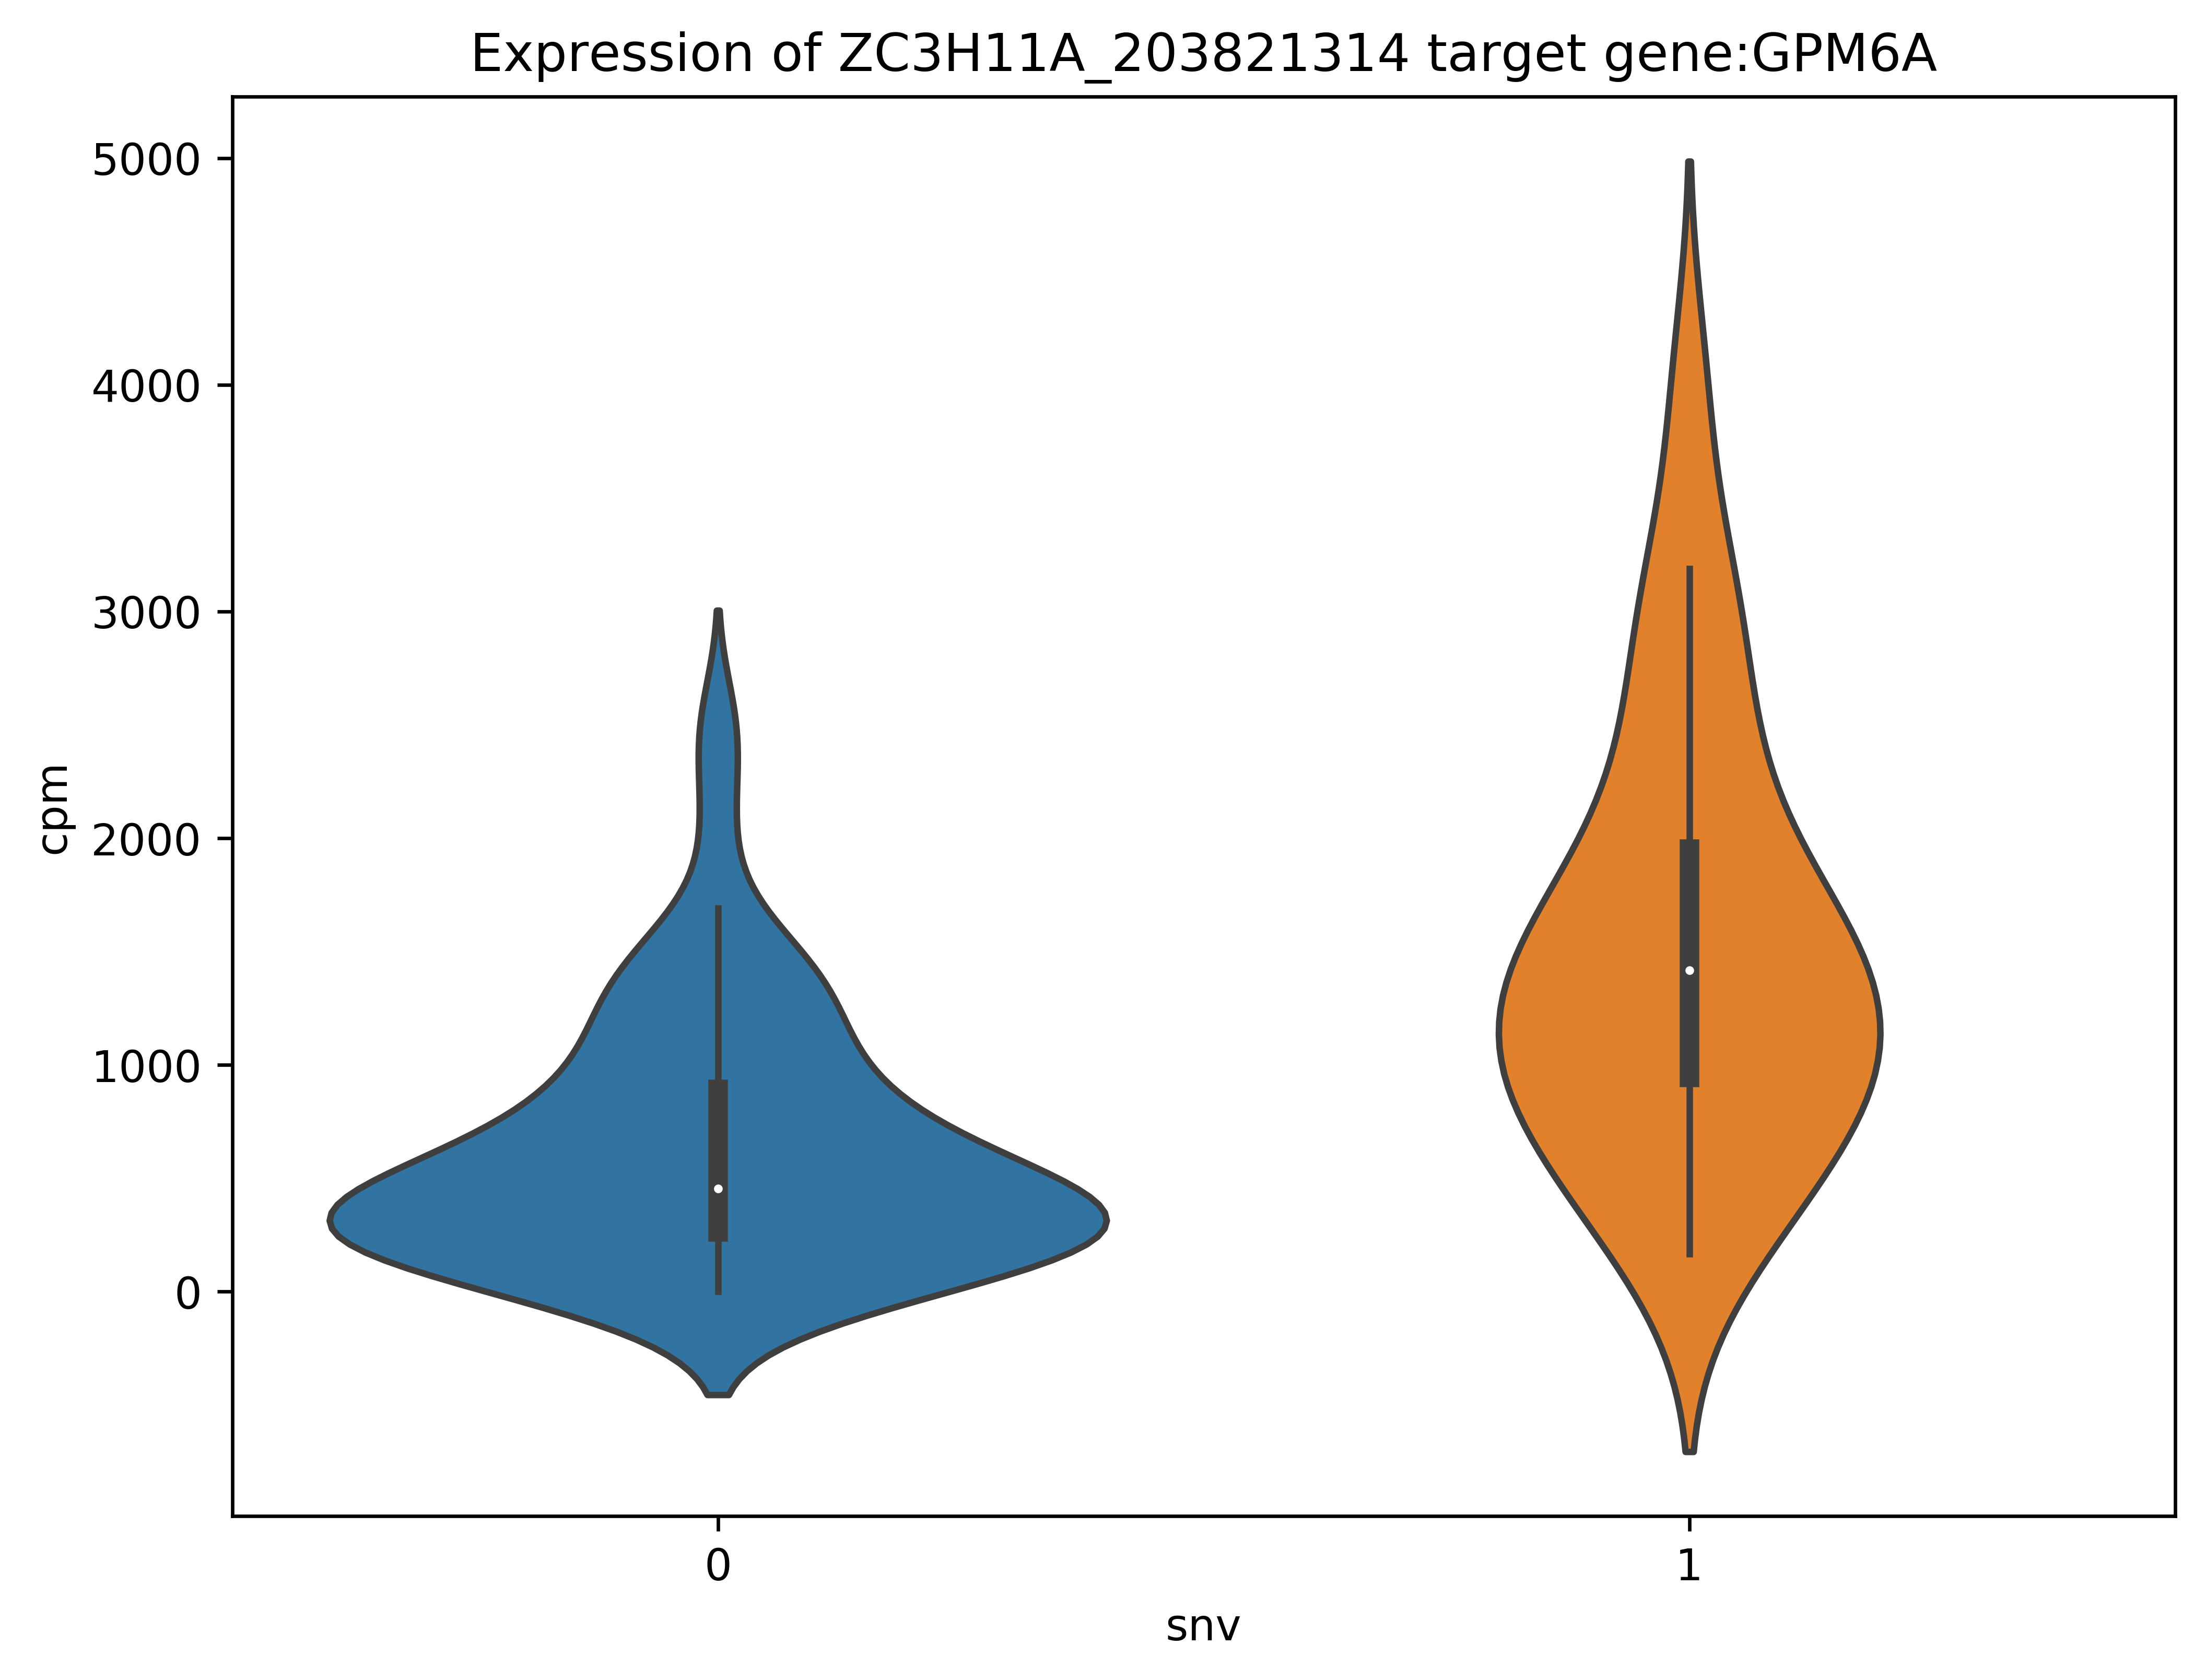

In [83]:
ax = sns.violinplot(x="snv", y="gene", data=df_GPM6A_ZC3H11A)
ax.set(xlabel='snv', ylabel='cpm')
ax.set_title('Expression of ZC3H11A_203821314 target gene:GPM6A')

# ZC3H11A_203818973

chr1__203818973, GPM6A, ZC3H11A，rs57331151 (rs41299639),ENSG00000058673.11

In [102]:
ZC3H11A_203818973_yes=pd.read_csv('/data8t/mtx/scSNV/just_for_test/code/analysis/splicing_analysis/data/ZC3H11A_203818973/rsem/ZC3H11A_203818973_yes_rsem.target.txt',sep='\t')
ZC3H11A_203818973_no=pd.read_csv('/data8t/mtx/scSNV/just_for_test/code/analysis/splicing_analysis/data/ZC3H11A_203818973/rsem/ZC3H11A_203818973_no_rsem.target.txt',sep='\t')

Haplotype

In [ ]:
ZC3H11A_203818973_located_transcripts = ['ENST00000367214.1','ENST00000367212.3',
                                    'ENST00000332127.4','ENST00000495527.1',
                                    'ENST00000545588.1','ENST00000367210.1']

In [103]:
df_GPM6A_ZC3H11A_2 = pd.DataFrame({'gene':third_cpm_profile_cellline.loc['ENSG00000150625.12',:],
                   'snv':third_snv_profile_cellline.loc['chr1__203818973',:],
                   'gene_snv':exp_profile.loc['ENSG00000058673.11',third_cpm_profile_cellline.columns.values],
                   'gene_snv_reads':reads_profile.loc['ENSG00000058673.11',third_cpm_profile_cellline.columns.values]})

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Expression of ZC3H11A_203818973 target gene:GPM6A')

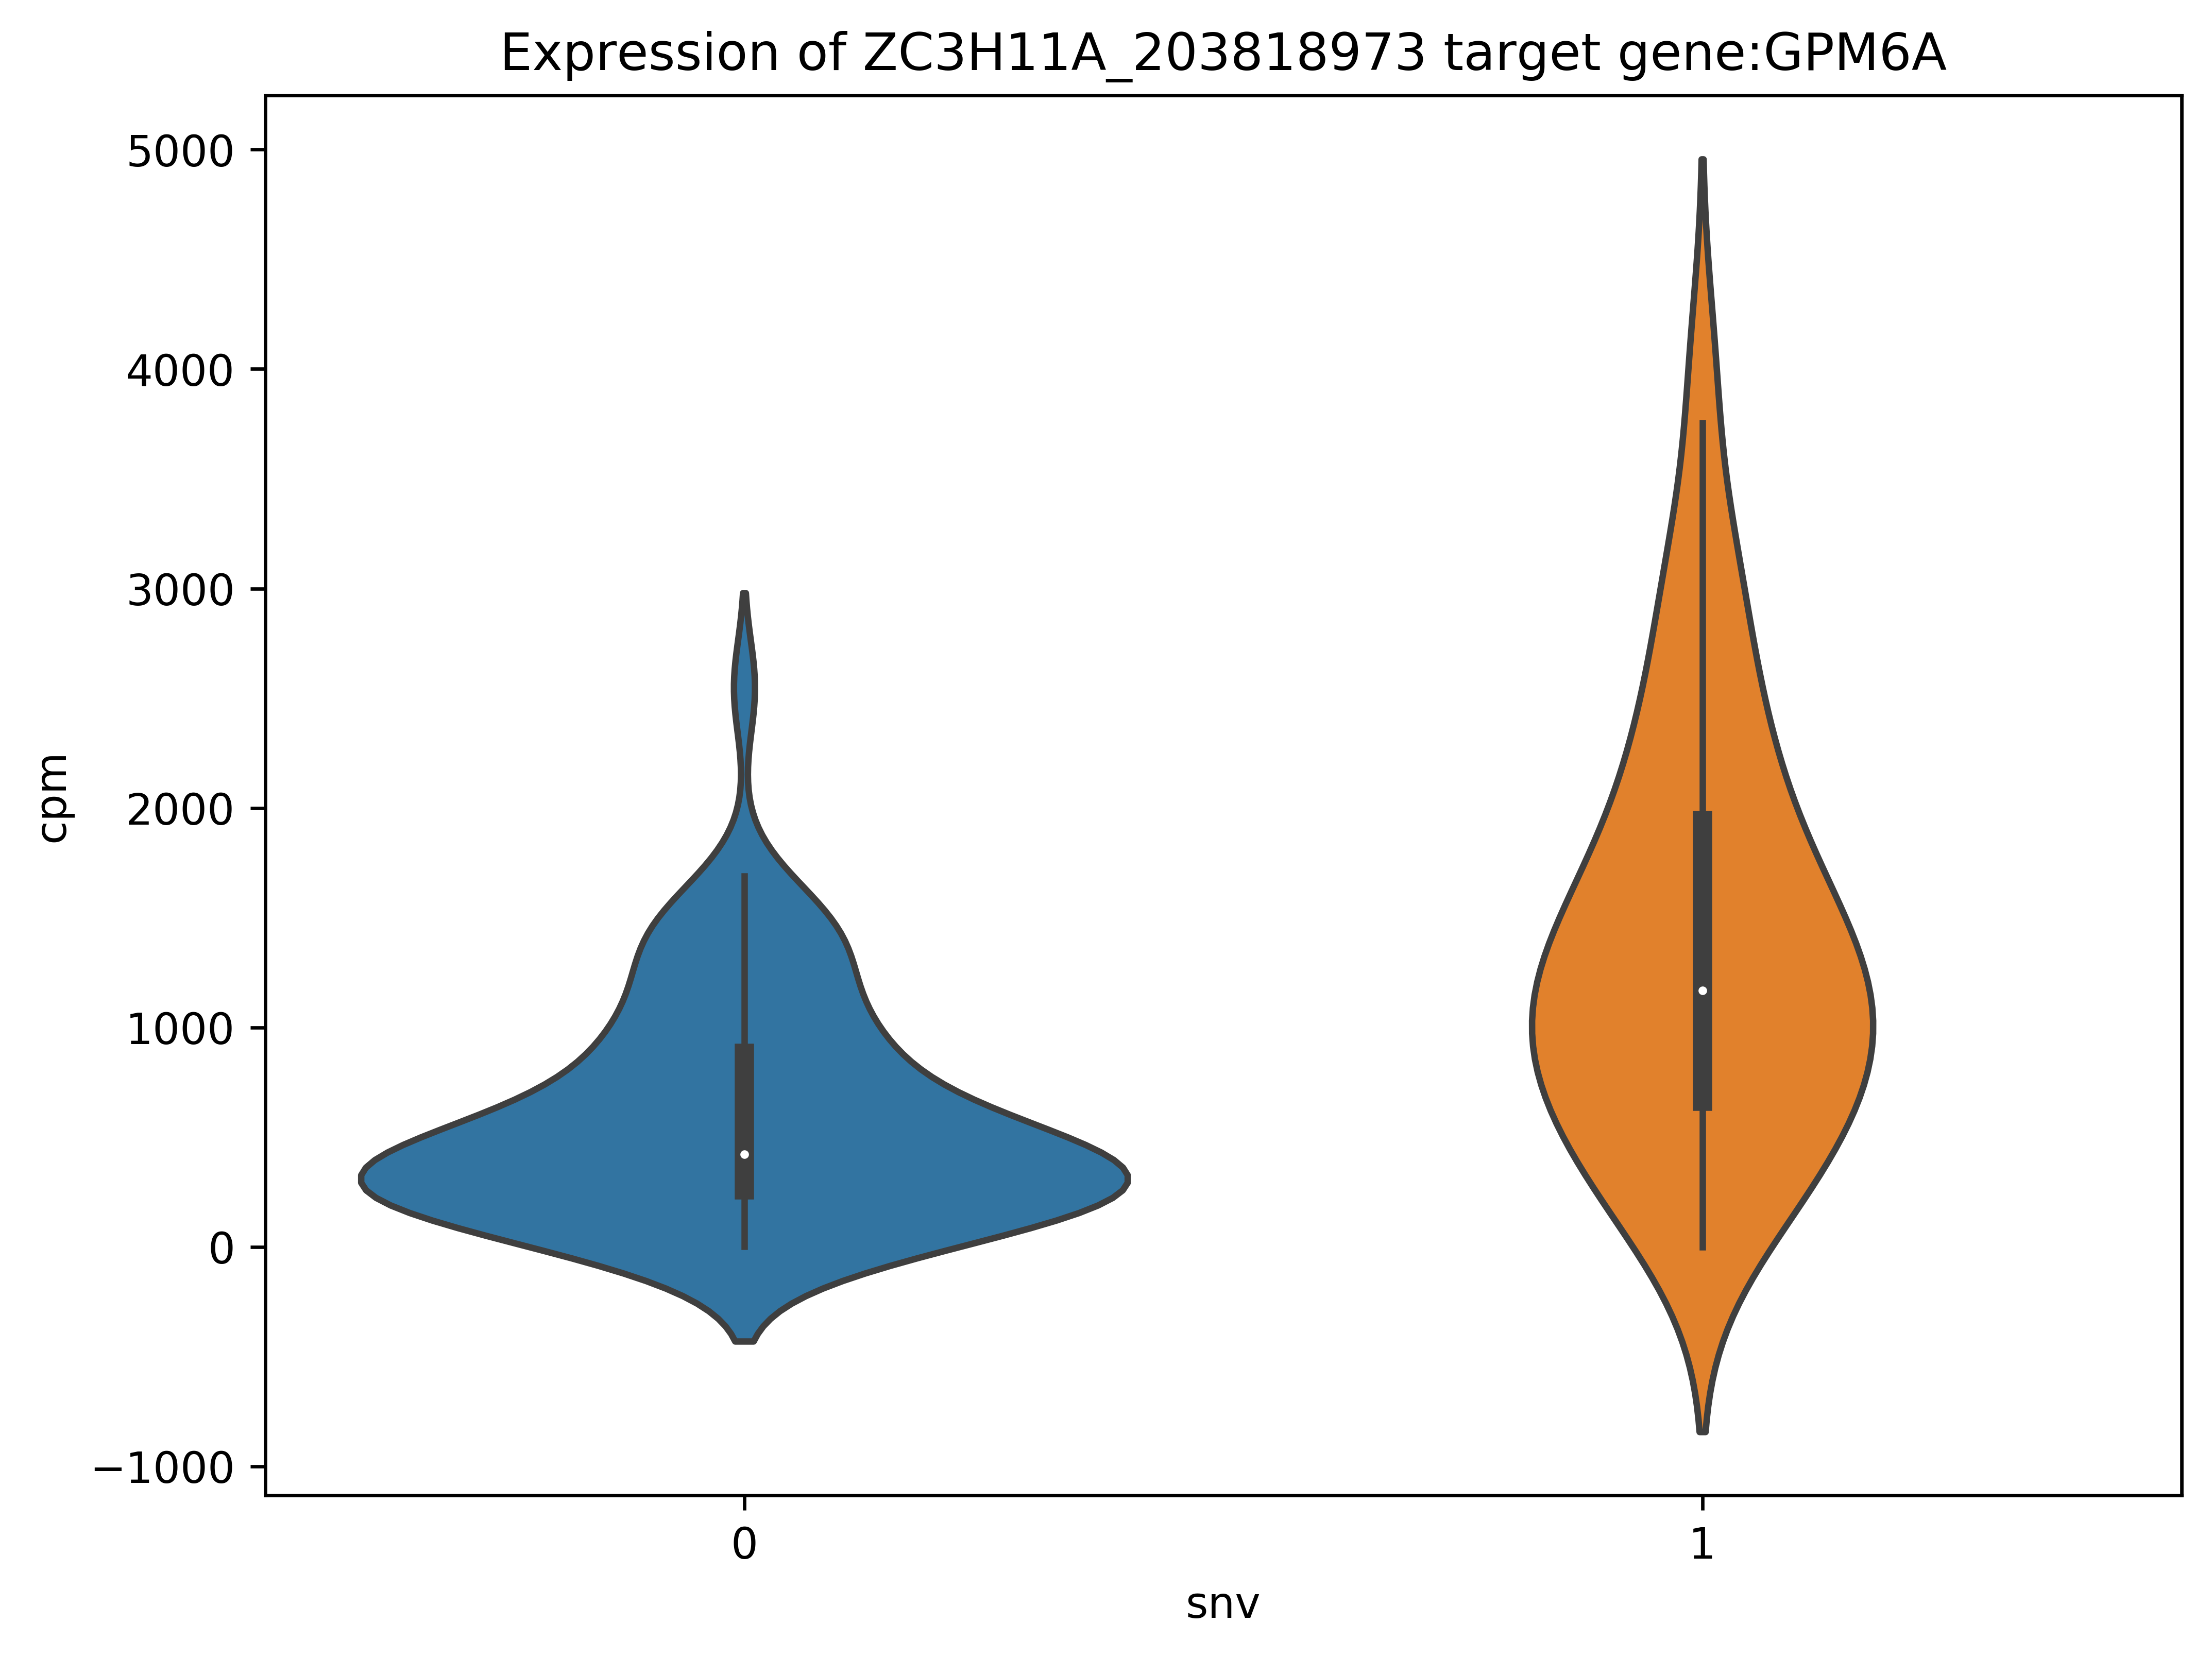

In [106]:
ax = sns.violinplot(x="snv", y="gene", data=df_GPM6A_ZC3H11A_2)
ax.set(xlabel='snv', ylabel='cpm')
ax.set_title('Expression of ZC3H11A_203818973 target gene:GPM6A')

# Cis-eqtl cellline chr8__11710888, CTSB 

chr8__11710888, CTSB,ENSG00000164733.16

In [108]:
df_CTSB = pd.DataFrame({'gene':third_cpm_profile_cellline.loc['ENSG00000164733.16',:],
                   'snv':third_snv_profile_cellline.loc['chr8__11710888',:],
                   'gene_snv':exp_profile.loc['ENSG00000164733.16',third_cpm_profile_cellline.columns.values],
                   'gene_snv_reads':reads_profile.loc['ENSG00000164733.16',third_cpm_profile_cellline.columns.values]})

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Cis Expression of CTSB with chr8__11710888')

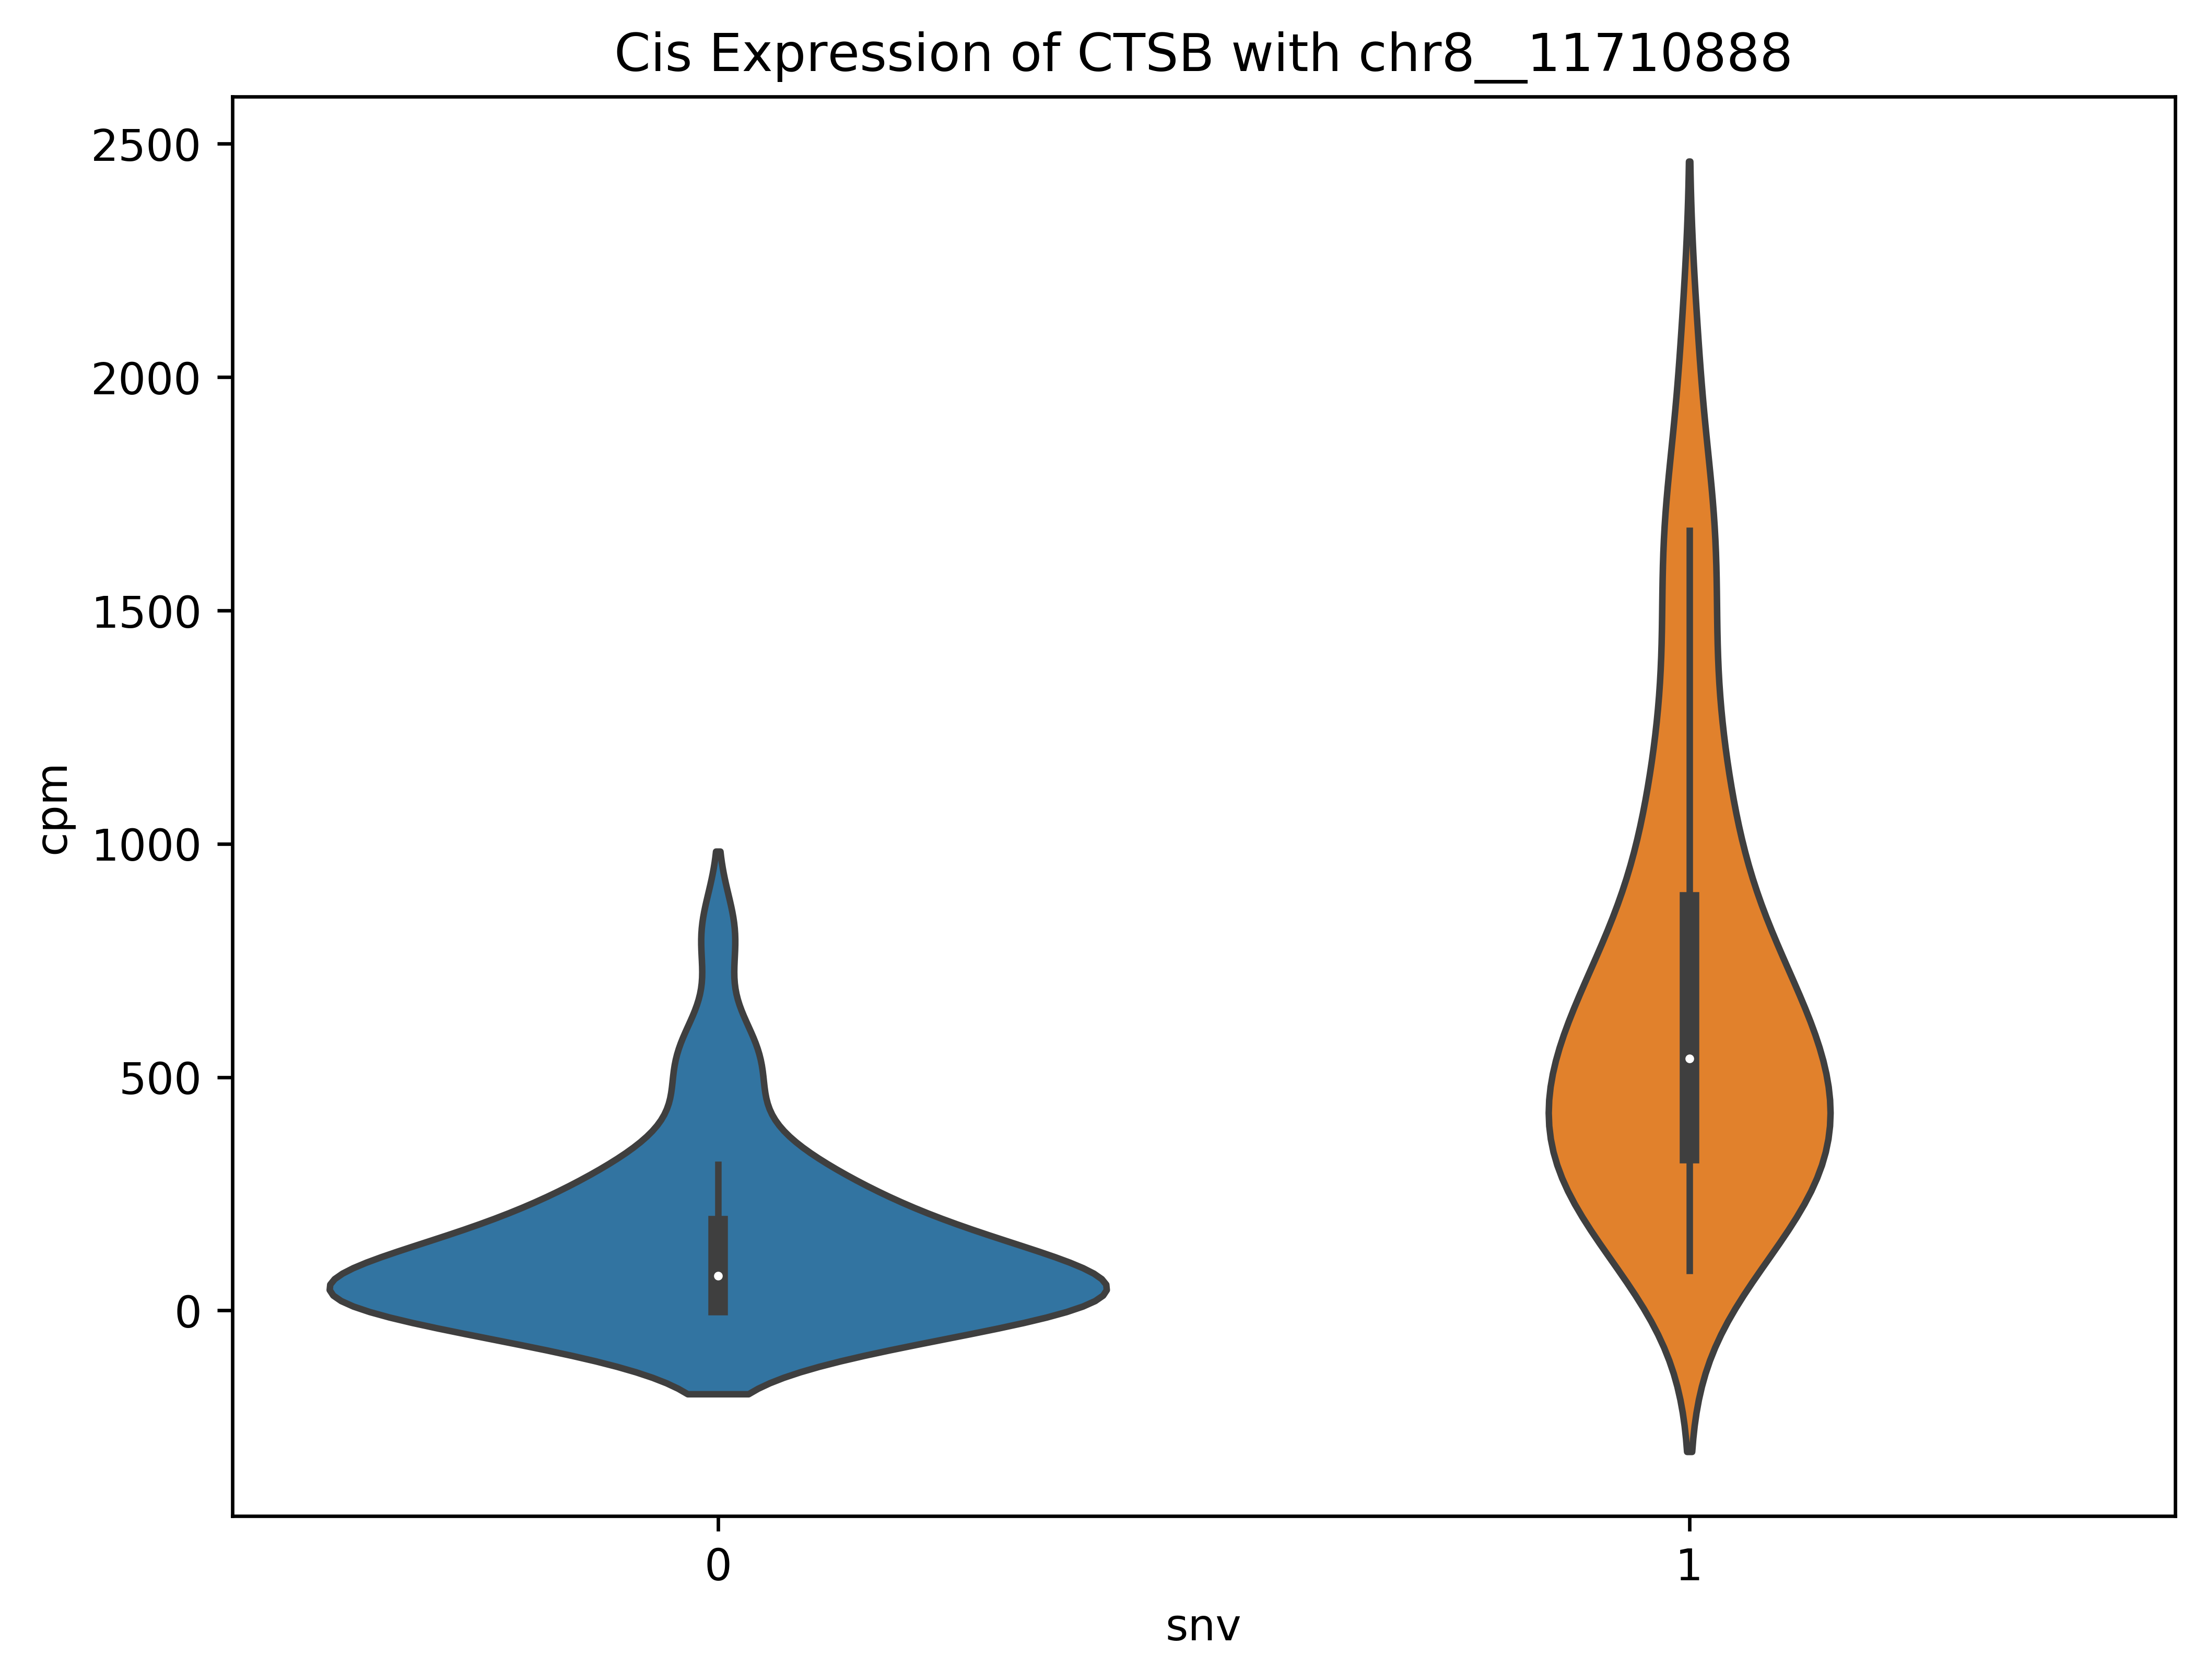

In [109]:
ax = sns.violinplot(x="snv", y="gene", data=df_CTSB)
ax.set(xlabel='snv', ylabel='cpm')
ax.set_title('Cis Expression of CTSB with chr8__11710888')

# Cis-eqtl cellline chr8__11702594, CTSB

In [110]:
df_CTSB_2 = pd.DataFrame({'gene':third_cpm_profile_cellline.loc['ENSG00000164733.16',:],
                   'snv':third_snv_profile_cellline.loc['chr8__11702594',:],
                   'gene_snv':exp_profile.loc['ENSG00000164733.16',third_cpm_profile_cellline.columns.values],
                   'gene_snv_reads':reads_profile.loc['ENSG00000164733.16',third_cpm_profile_cellline.columns.values]})

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Cis Expression of CTSB with chr8__11702594')

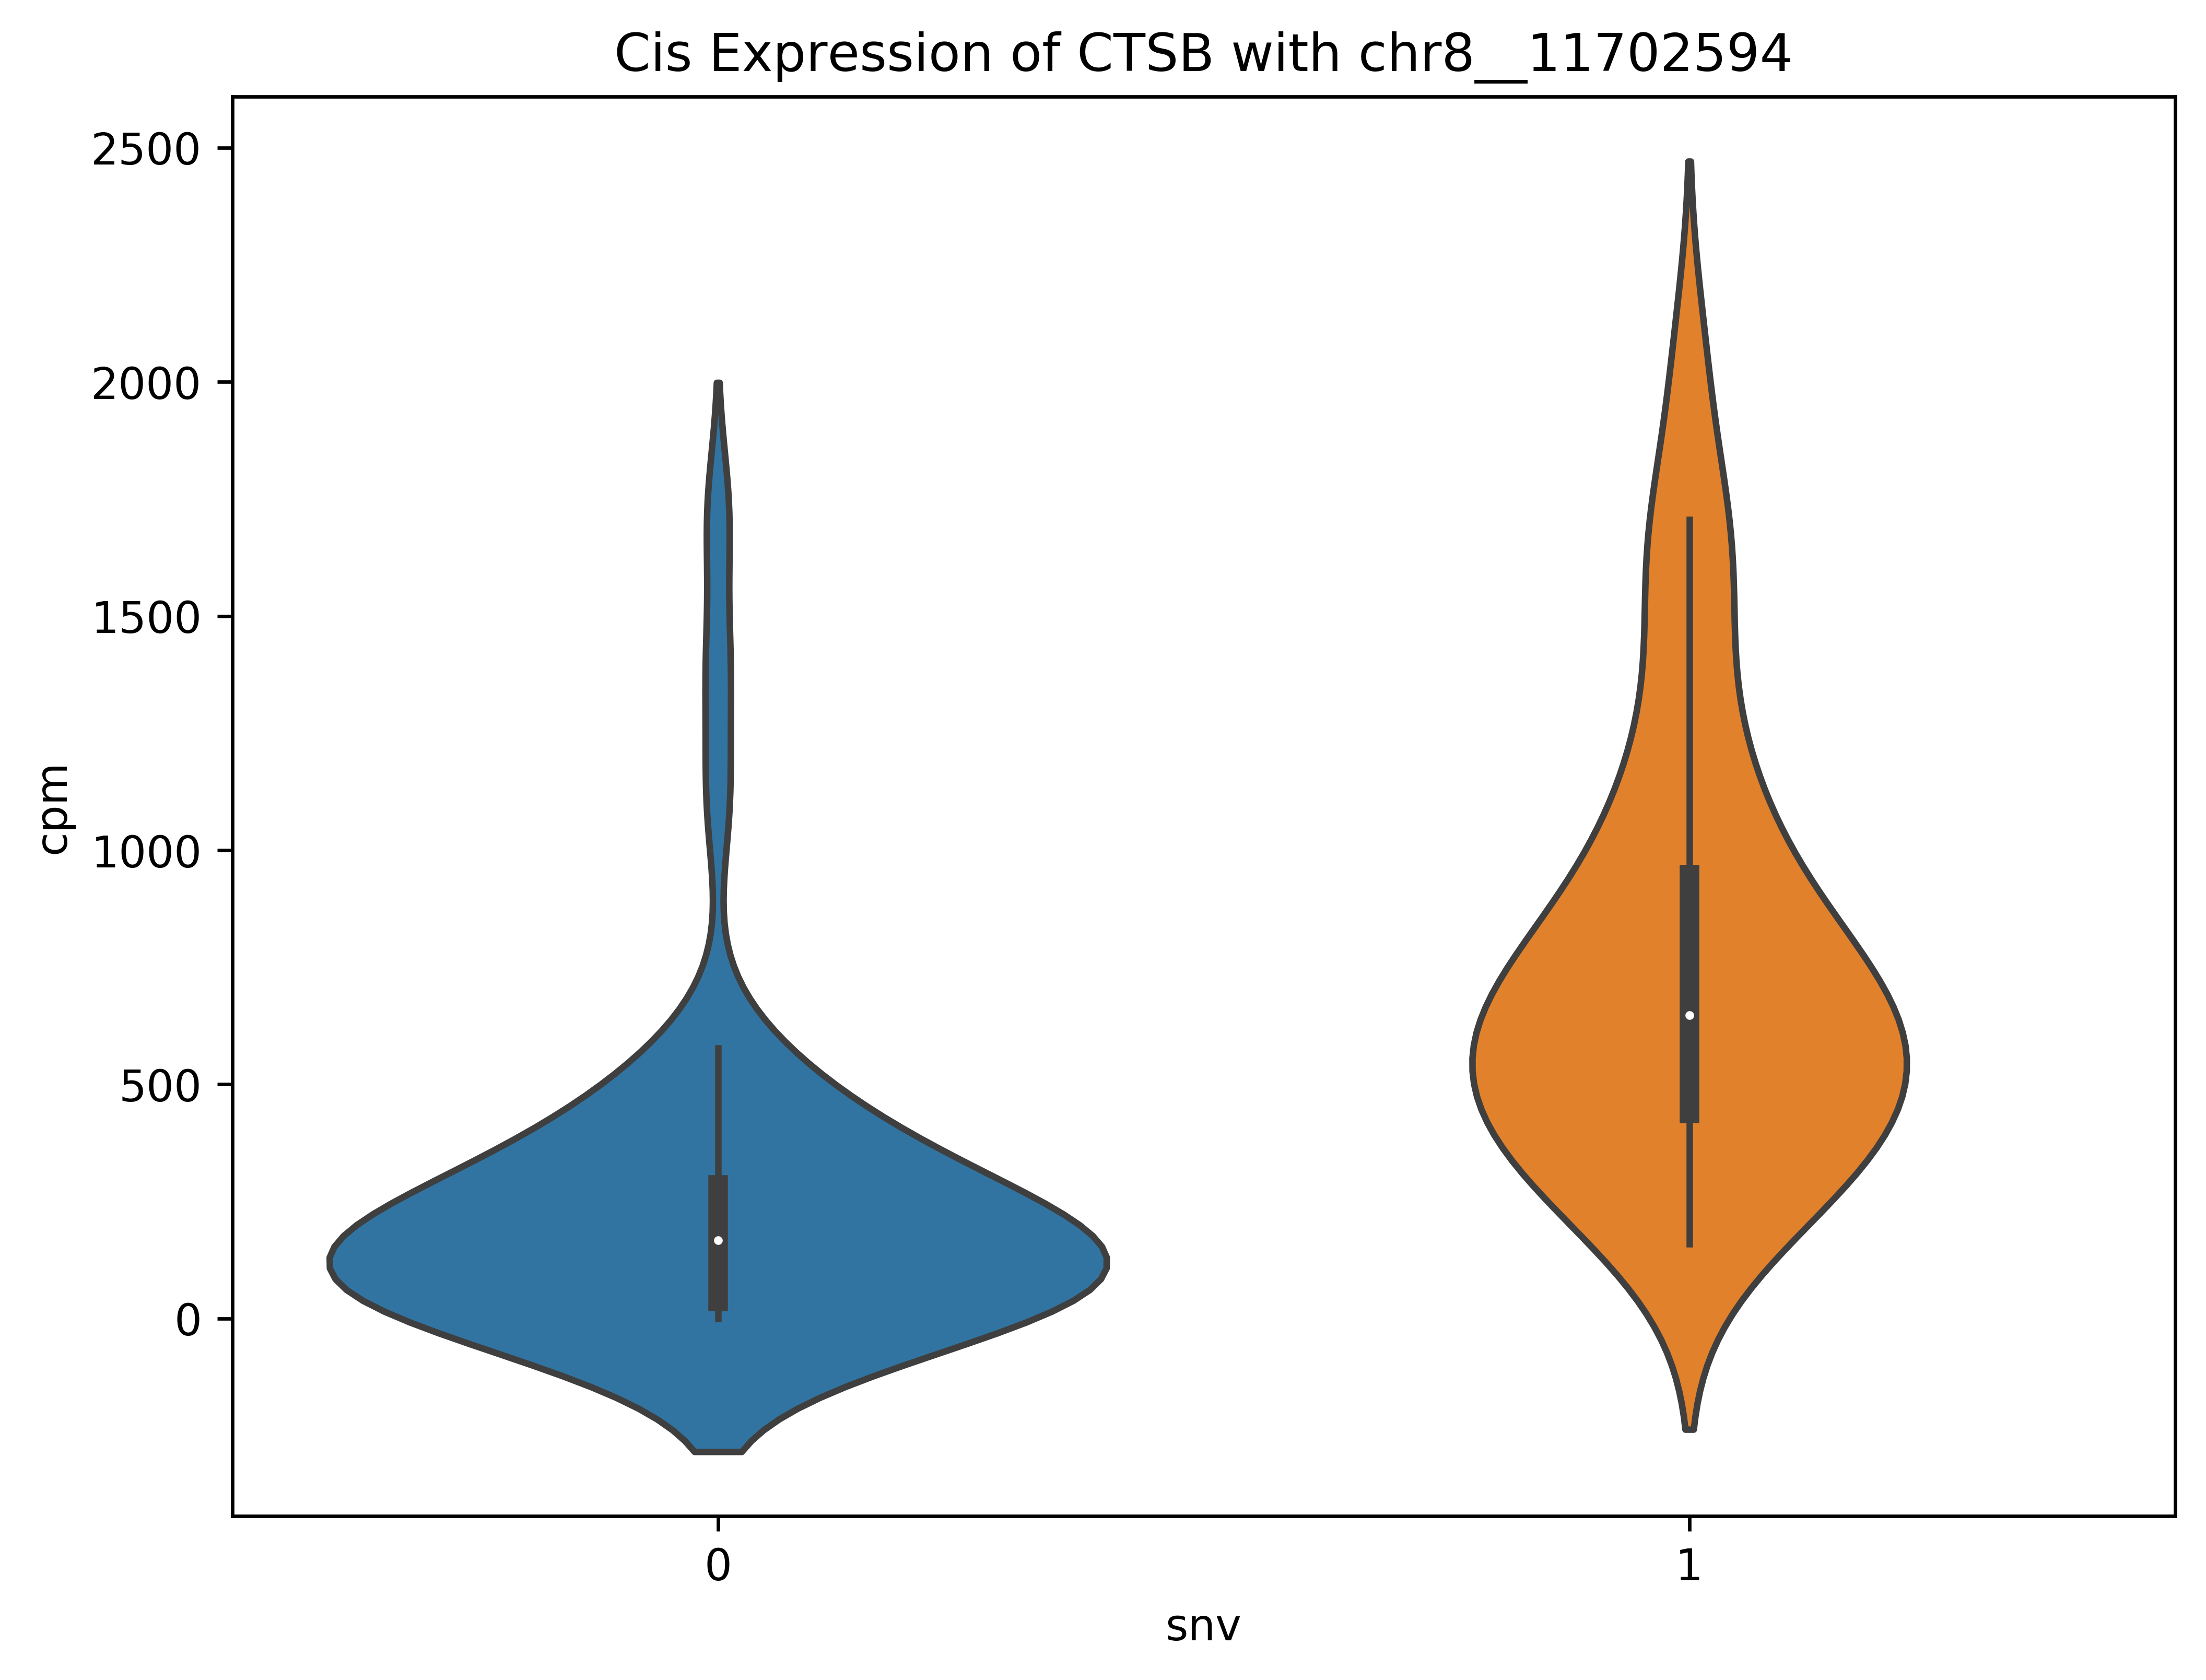

In [111]:
ax = sns.violinplot(x="snv", y="gene", data=df_CTSB_2)
ax.set(xlabel='snv', ylabel='cpm')
ax.set_title('Cis Expression of CTSB with chr8__11702594')

# Cis patients chr2__12881778, TRIB2 

chr2__12881778, TRIB2,ENSG00000071575.7

In [114]:
df_TRIB2 = pd.DataFrame({'gene':third_cpm_profile_patients.loc['ENSG00000071575.7',:],
                   'snv':third_snv_profile_patients.loc['chr2__12881778',:],
                   'gene_snv':exp_profile.loc['ENSG00000071575.7',third_cpm_profile_patients.columns.values],
                   'gene_snv_reads':reads_profile.loc['ENSG00000071575.7',third_cpm_profile_patients.columns.values]})

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Cis Expression of TRIB2 with chr2__12881778')

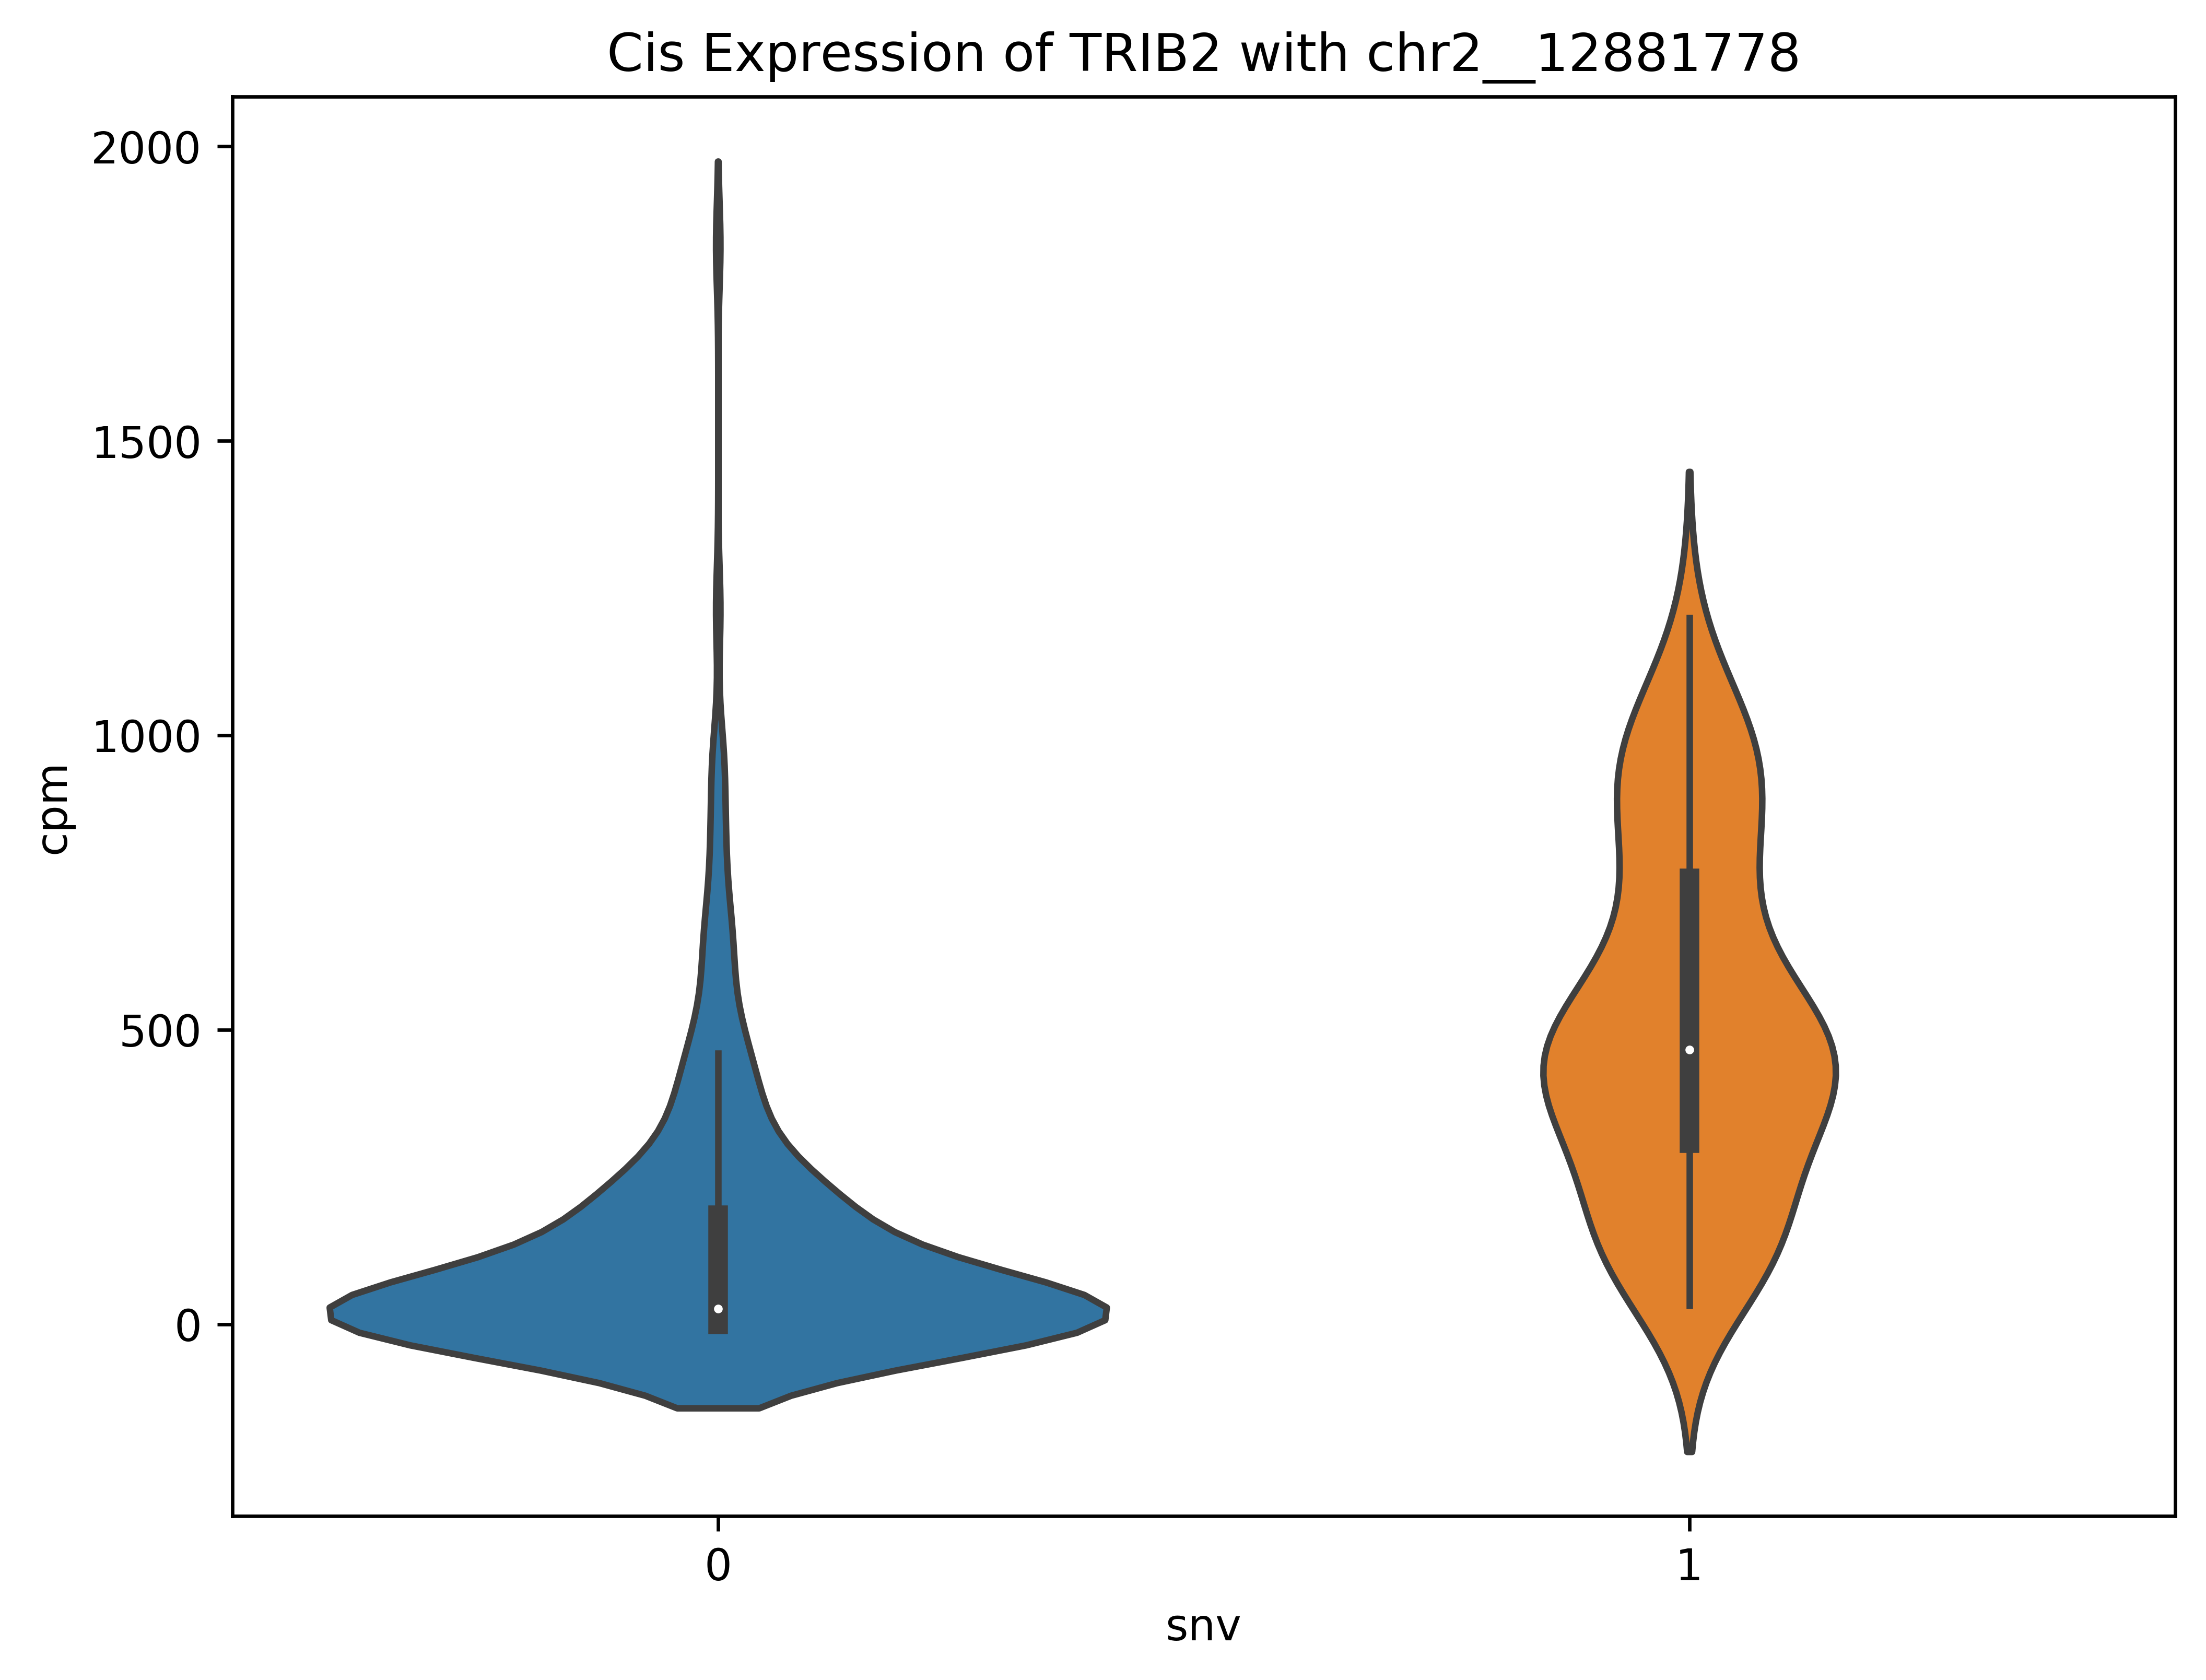

In [115]:
ax = sns.violinplot(x="snv", y="gene", data=df_TRIB2)
ax.set(xlabel='snv', ylabel='cpm')
ax.set_title('Cis Expression of TRIB2 with chr2__12881778')

# Cis patients chr4__122618046, ANXA5,ENSG00000164111.10

chr4__122618046, ANXA5,ENSG00000164111.10

In [116]:
df_ANXA5 = pd.DataFrame({'gene':third_cpm_profile_patients.loc['ENSG00000164111.10',:],
                   'snv':third_snv_profile_patients.loc['chr4__122618046',:],
                   'gene_snv':exp_profile.loc['ENSG00000164111.10',third_cpm_profile_patients.columns.values],
                   'gene_snv_reads':reads_profile.loc['ENSG00000164111.10',third_cpm_profile_patients.columns.values]})

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Cis Expression of df_ANXA5 with chr4__122618046')

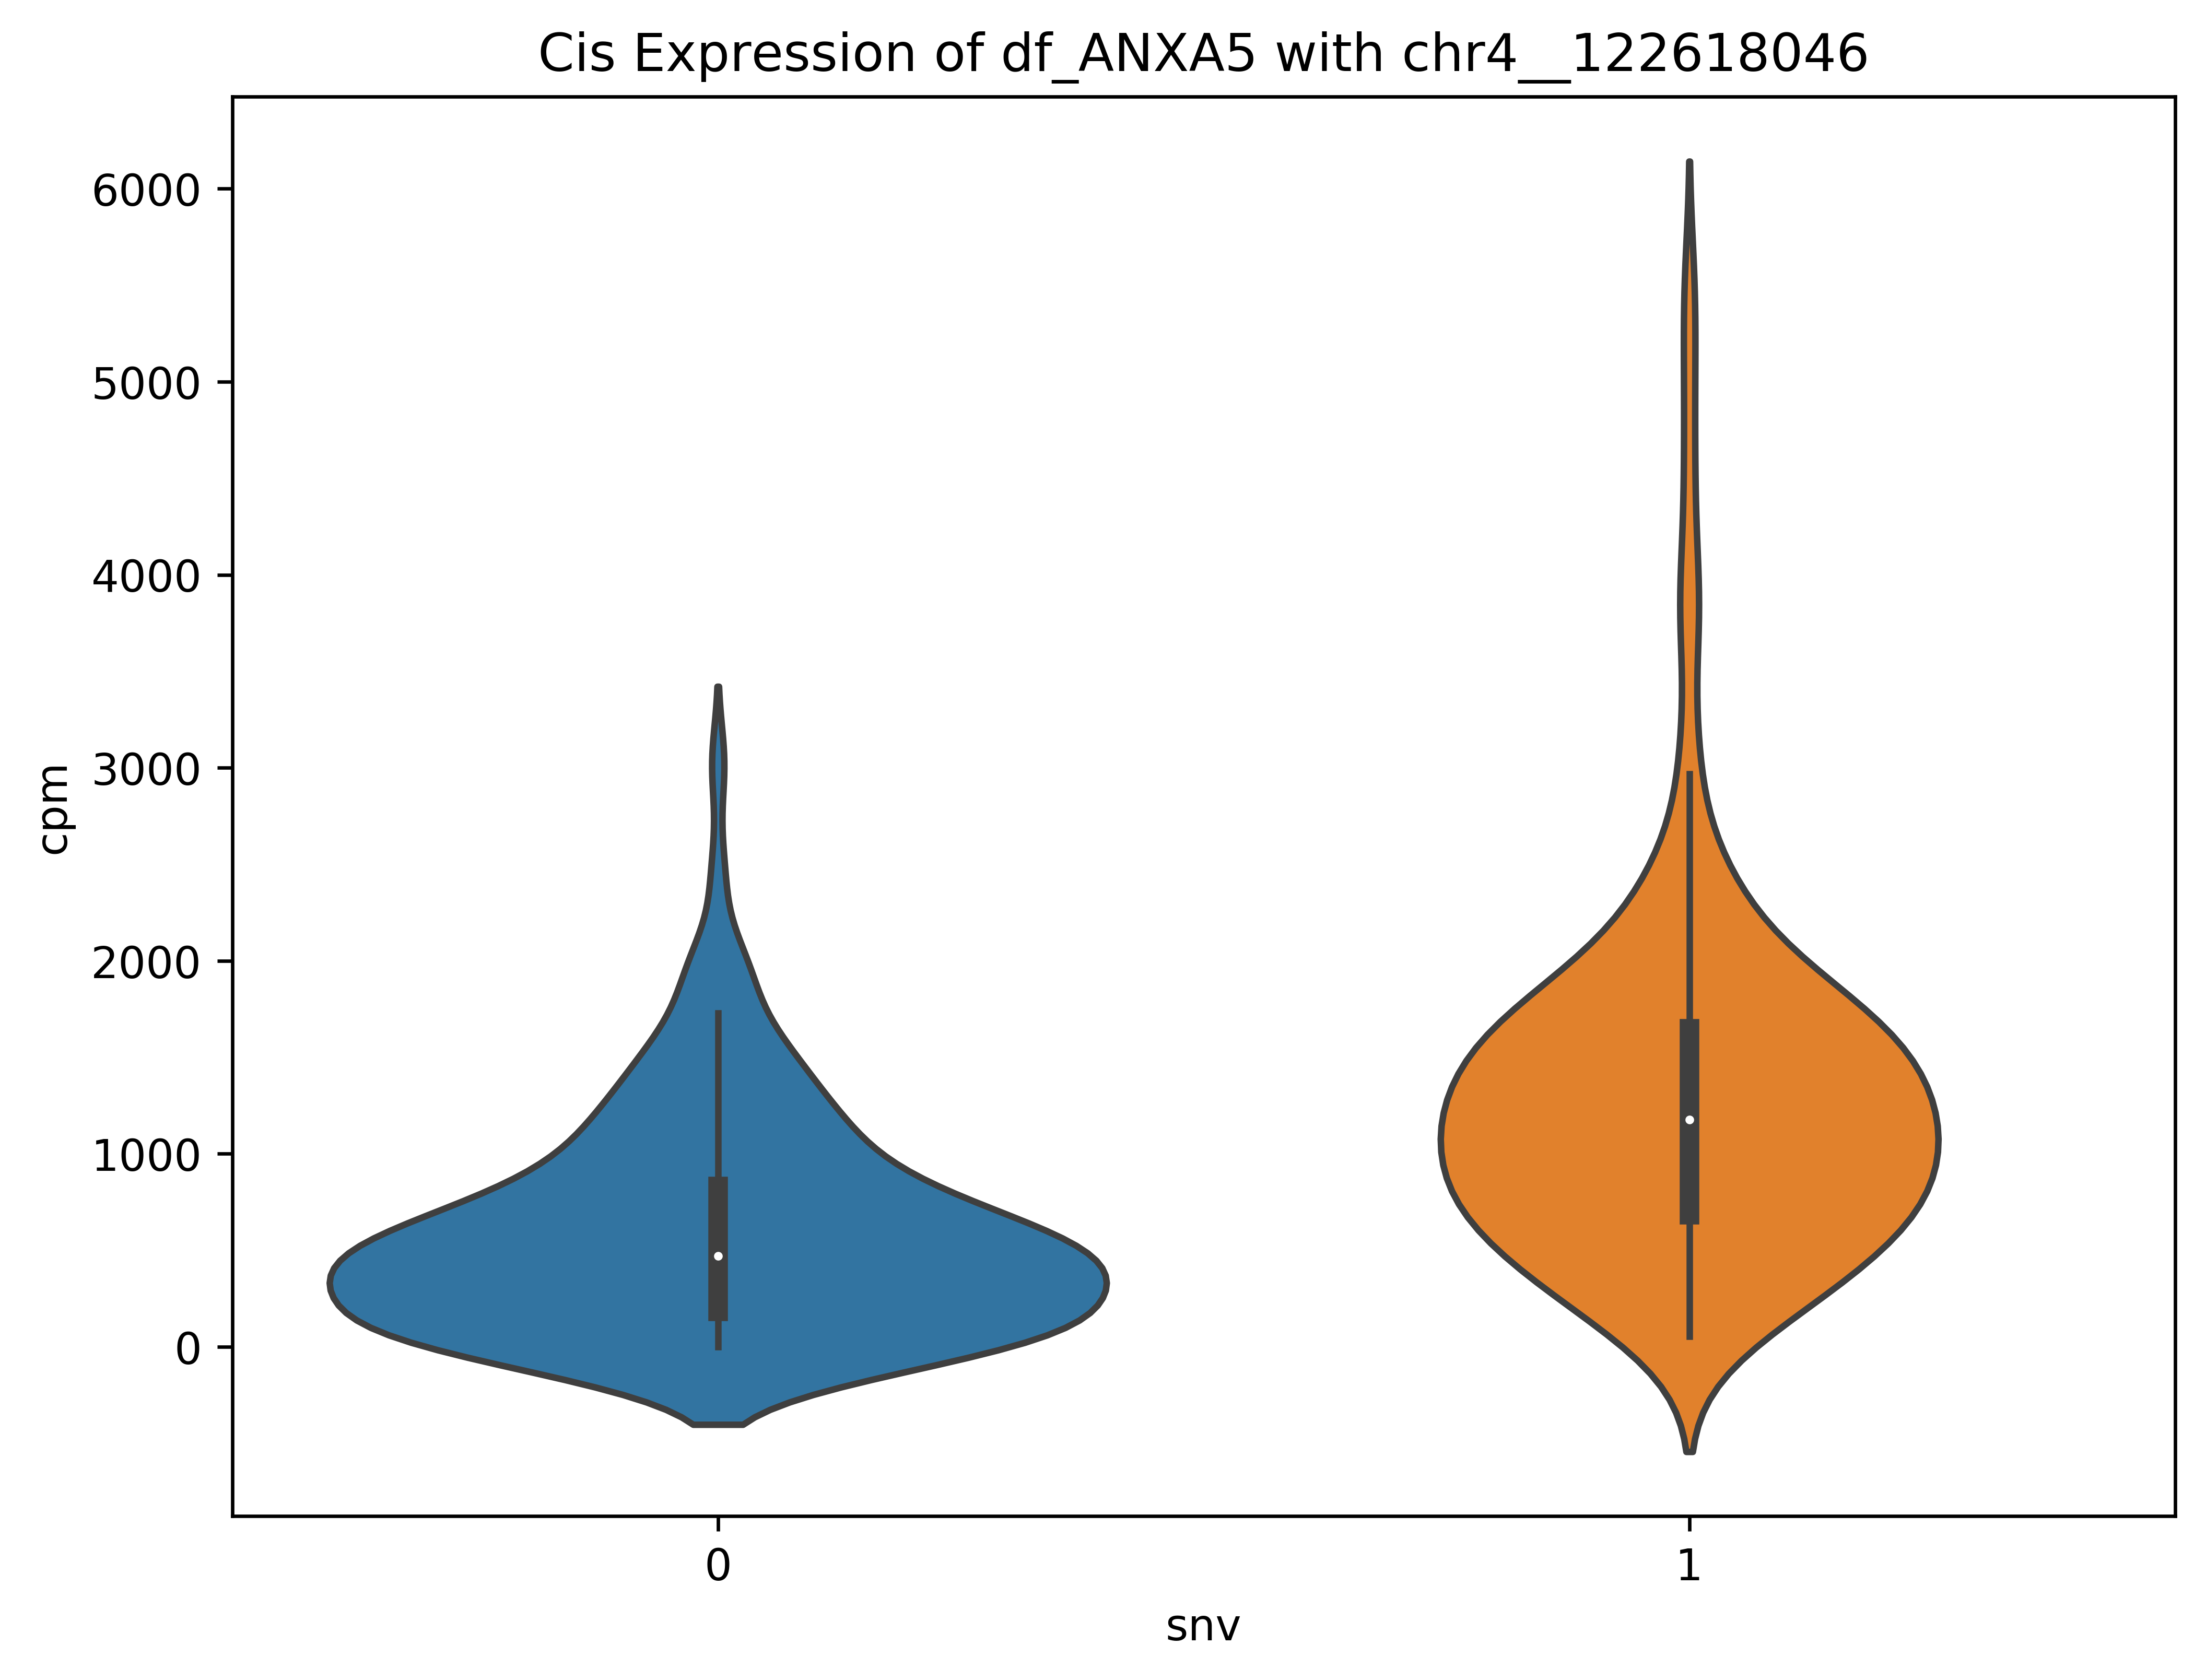

In [117]:
ax = sns.violinplot(x="snv", y="gene", data=df_ANXA5)
ax.set(xlabel='snv', ylabel='cpm')
ax.set_title('Cis Expression of df_ANXA5 with chr4__122618046')

# chr4__122618046 eqtl

## patients

In [118]:
# target gene: ENSG00000164733.16 CTSB
# located gene: ENSG00000164111.10 ANXA5
df_patients_ctsb = pd.DataFrame({'gene':third_cpm_profile_patients.loc['ENSG00000164733.16',:],
                   'snv':third_snv_profile_patients.loc['chr4__122618046',:],
                   'gene_snv':exp_profile.loc['ENSG00000164111.10',third_cpm_profile_patients.columns.values],
                   'gene_snv_reads':reads_profile.loc['ENSG00000164111.10',third_cpm_profile_patients.columns.values]})

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Target gene CTSB for chr4__122618046 in patients')

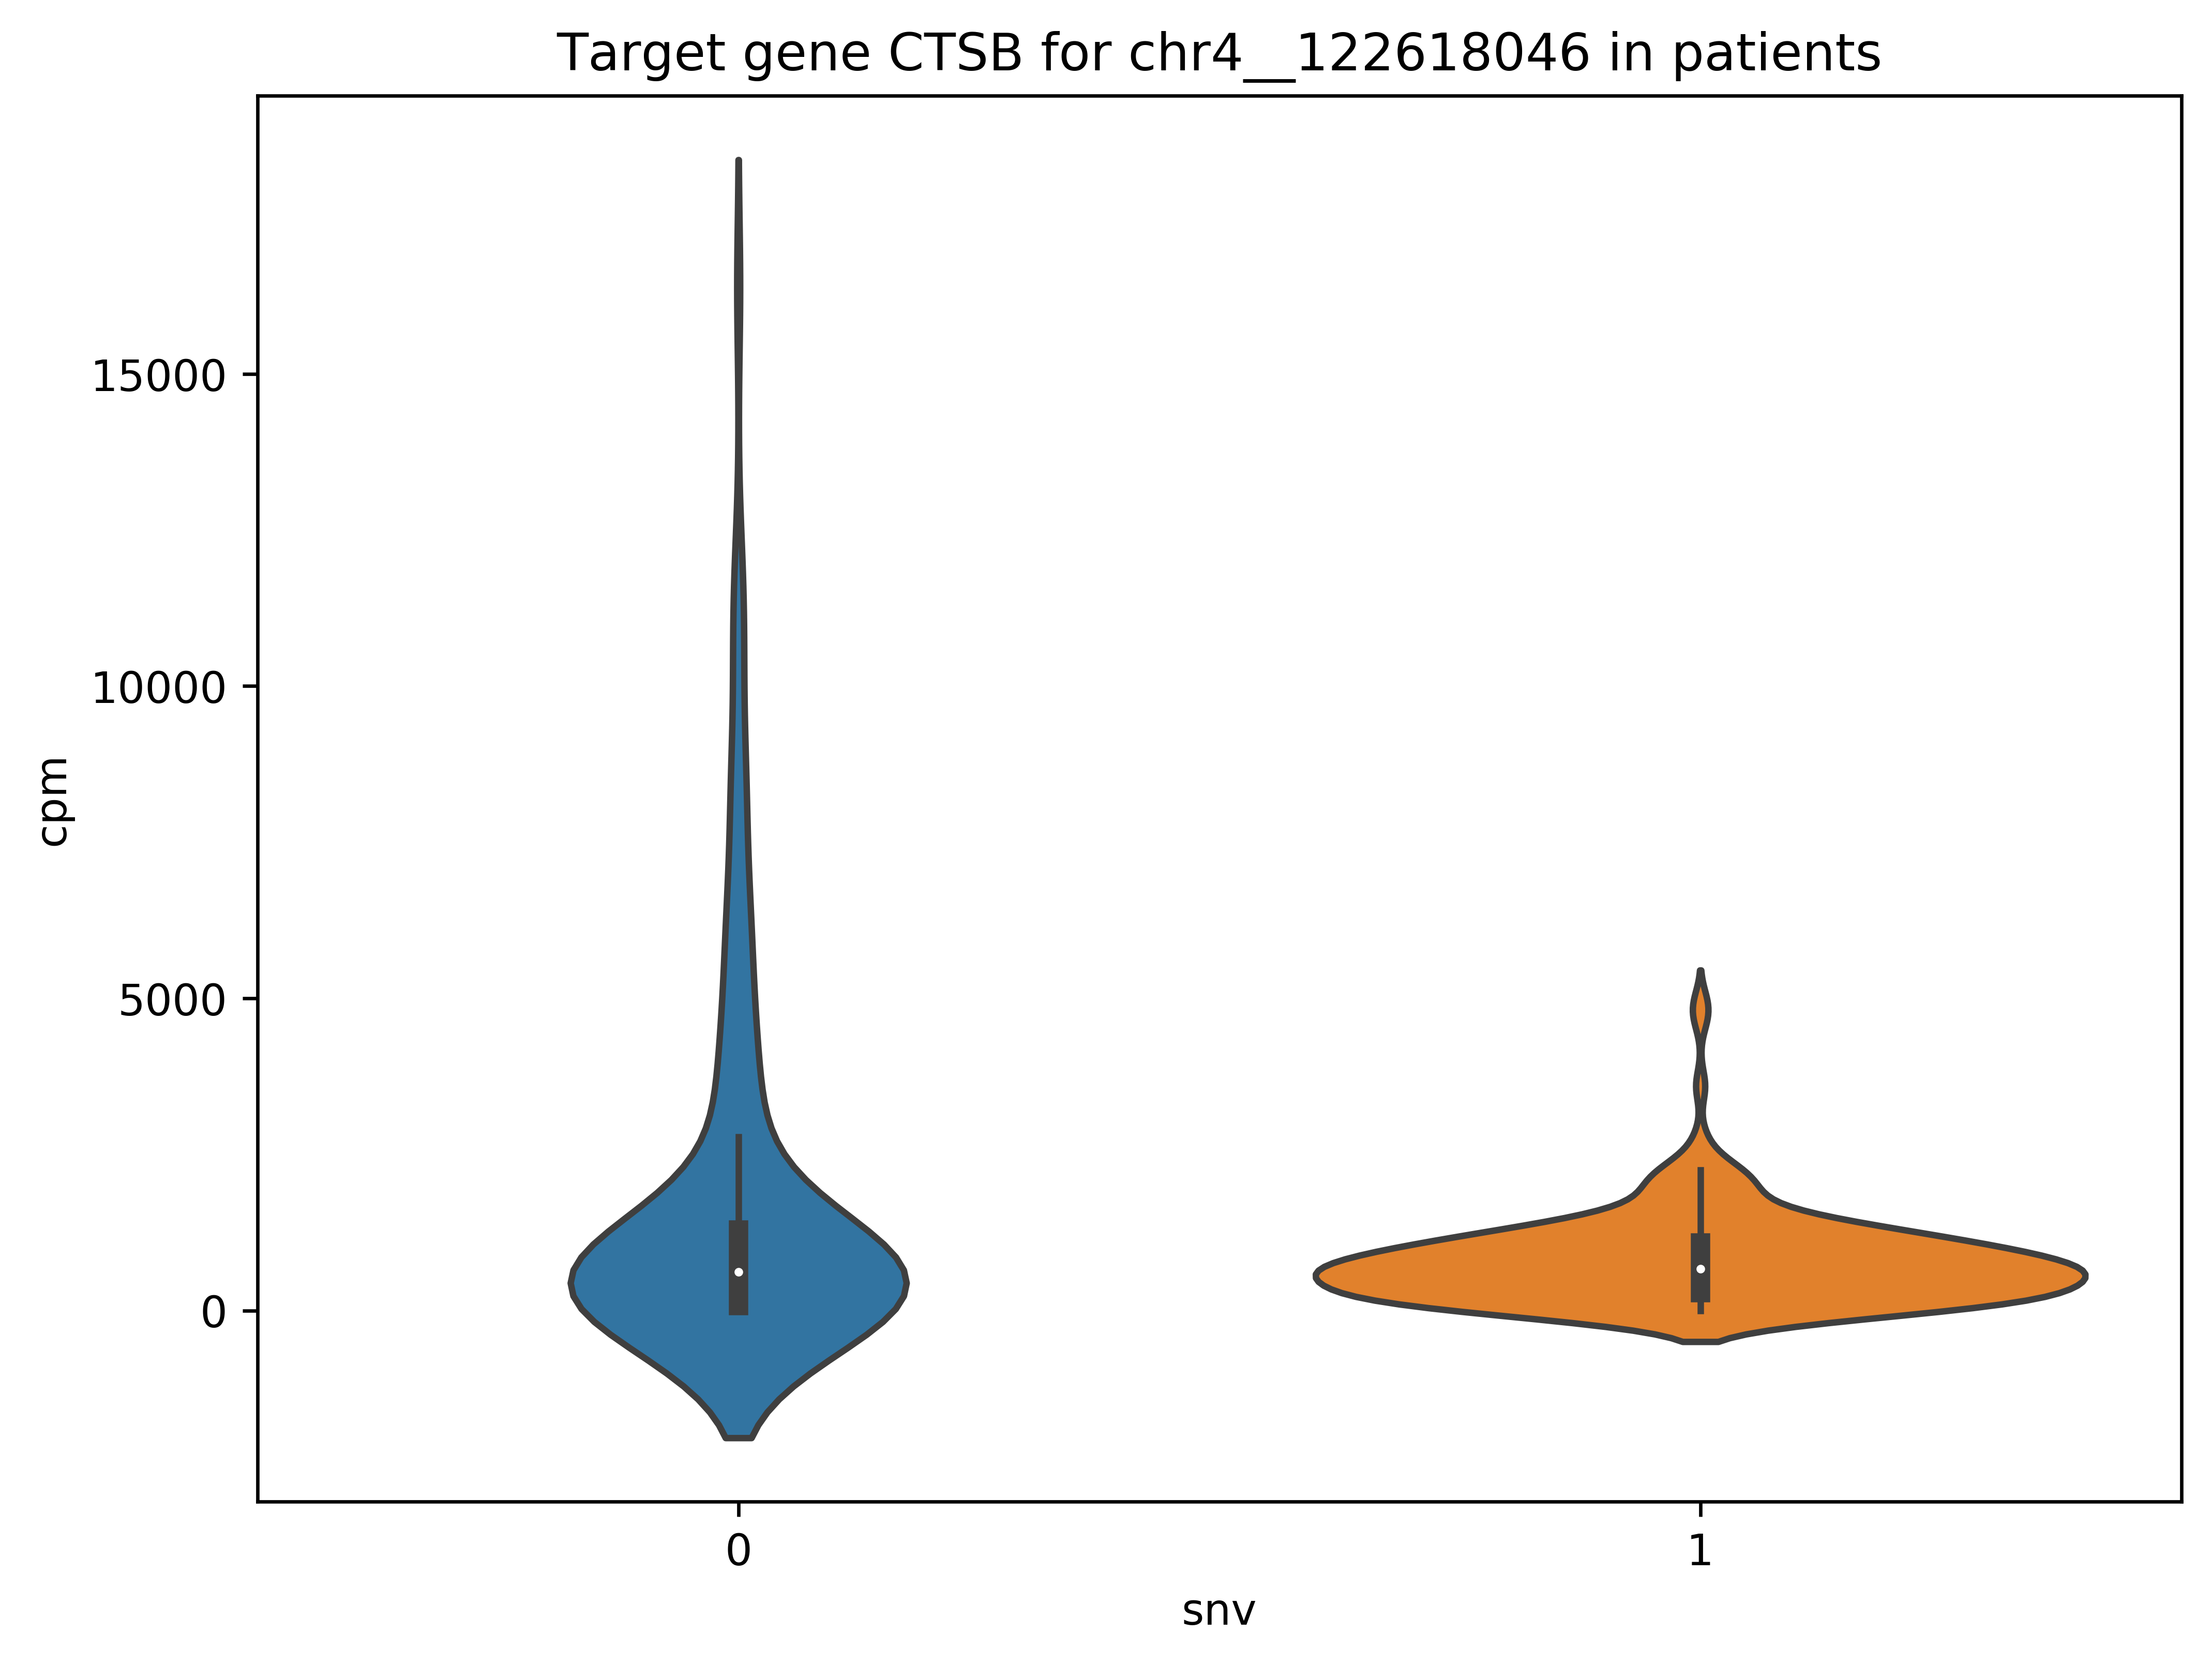

In [119]:
ax = sns.violinplot(x="snv", y="gene", data=df_patients_ctsb)
ax.set(xlabel='snv', ylabel='cpm')
ax.set_title('Target gene CTSB for chr4__122618046 in patients')

In [121]:
# target gene: ENSG00000164111.10 ANXA5
# located gene: ENSG00000164111.10 ANXA5
df_patients_ANXA5 = pd.DataFrame({'gene':third_cpm_profile_patients.loc['ENSG00000164111.10',:],
                   'snv':third_snv_profile_patients.loc['chr4__122618046',:],
                   'gene_snv':exp_profile.loc['ENSG00000164111.10',third_cpm_profile_patients.columns.values],
                   'gene_snv_reads':reads_profile.loc['ENSG00000164111.10',third_cpm_profile_patients.columns.values]})

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Target gene ANXA5 for chr4__122618046 in patients (just on it)')

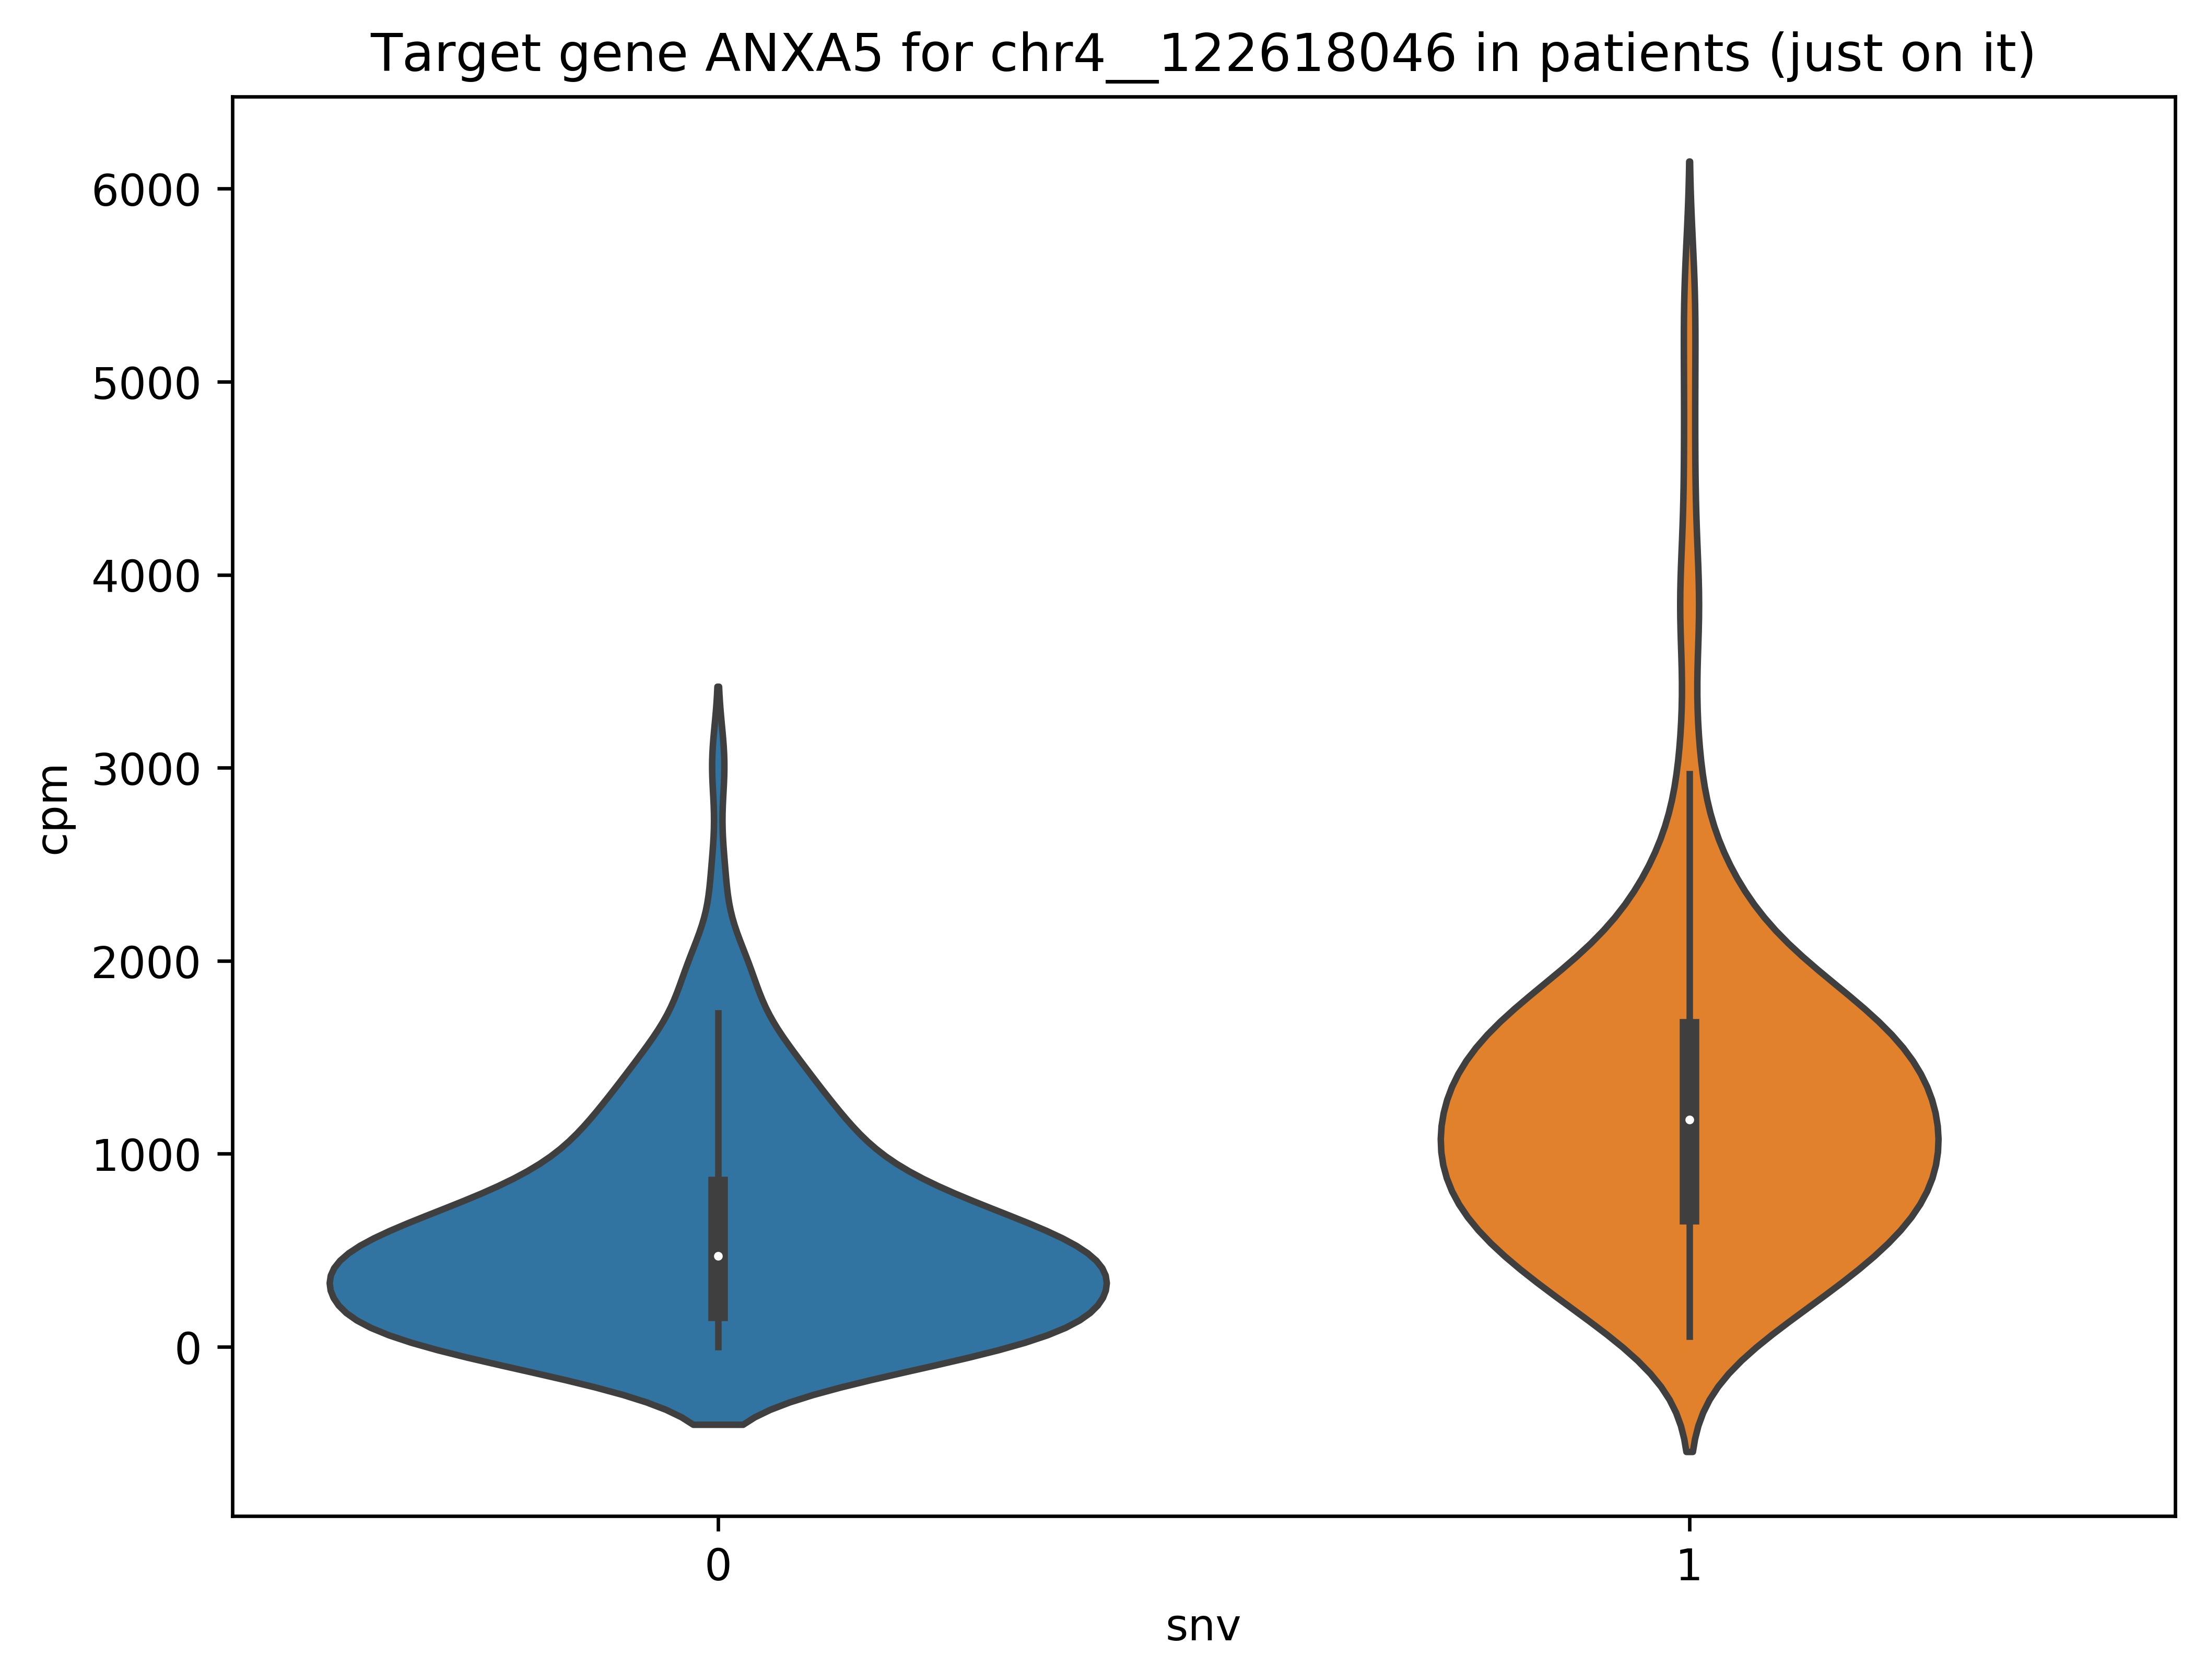

In [122]:
ax = sns.violinplot(x="snv", y="gene", data=df_patients_ANXA5)
ax.set(xlabel='snv', ylabel='cpm')
ax.set_title('Target gene ANXA5 for chr4__122618046 in patients (just on it)')

## cellline

In [123]:
# target gene: ENSG00000137726.11 FXYD6
# located gene: ENSG00000164111.10 ANXA5
df_patients_FXYD6 = pd.DataFrame({'gene':third_cpm_profile_cellline.loc['ENSG00000137726.11',:],
                   'snv':third_snv_profile_cellline.loc['chr4__122618046',:],
                   'gene_snv':exp_profile.loc['ENSG00000164111.10',third_cpm_profile_cellline.columns.values],
                   'gene_snv_reads':reads_profile.loc['ENSG00000164111.10',third_cpm_profile_cellline.columns.values]})

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Target gene FXYD6 for chr4__122618046 in cellline')

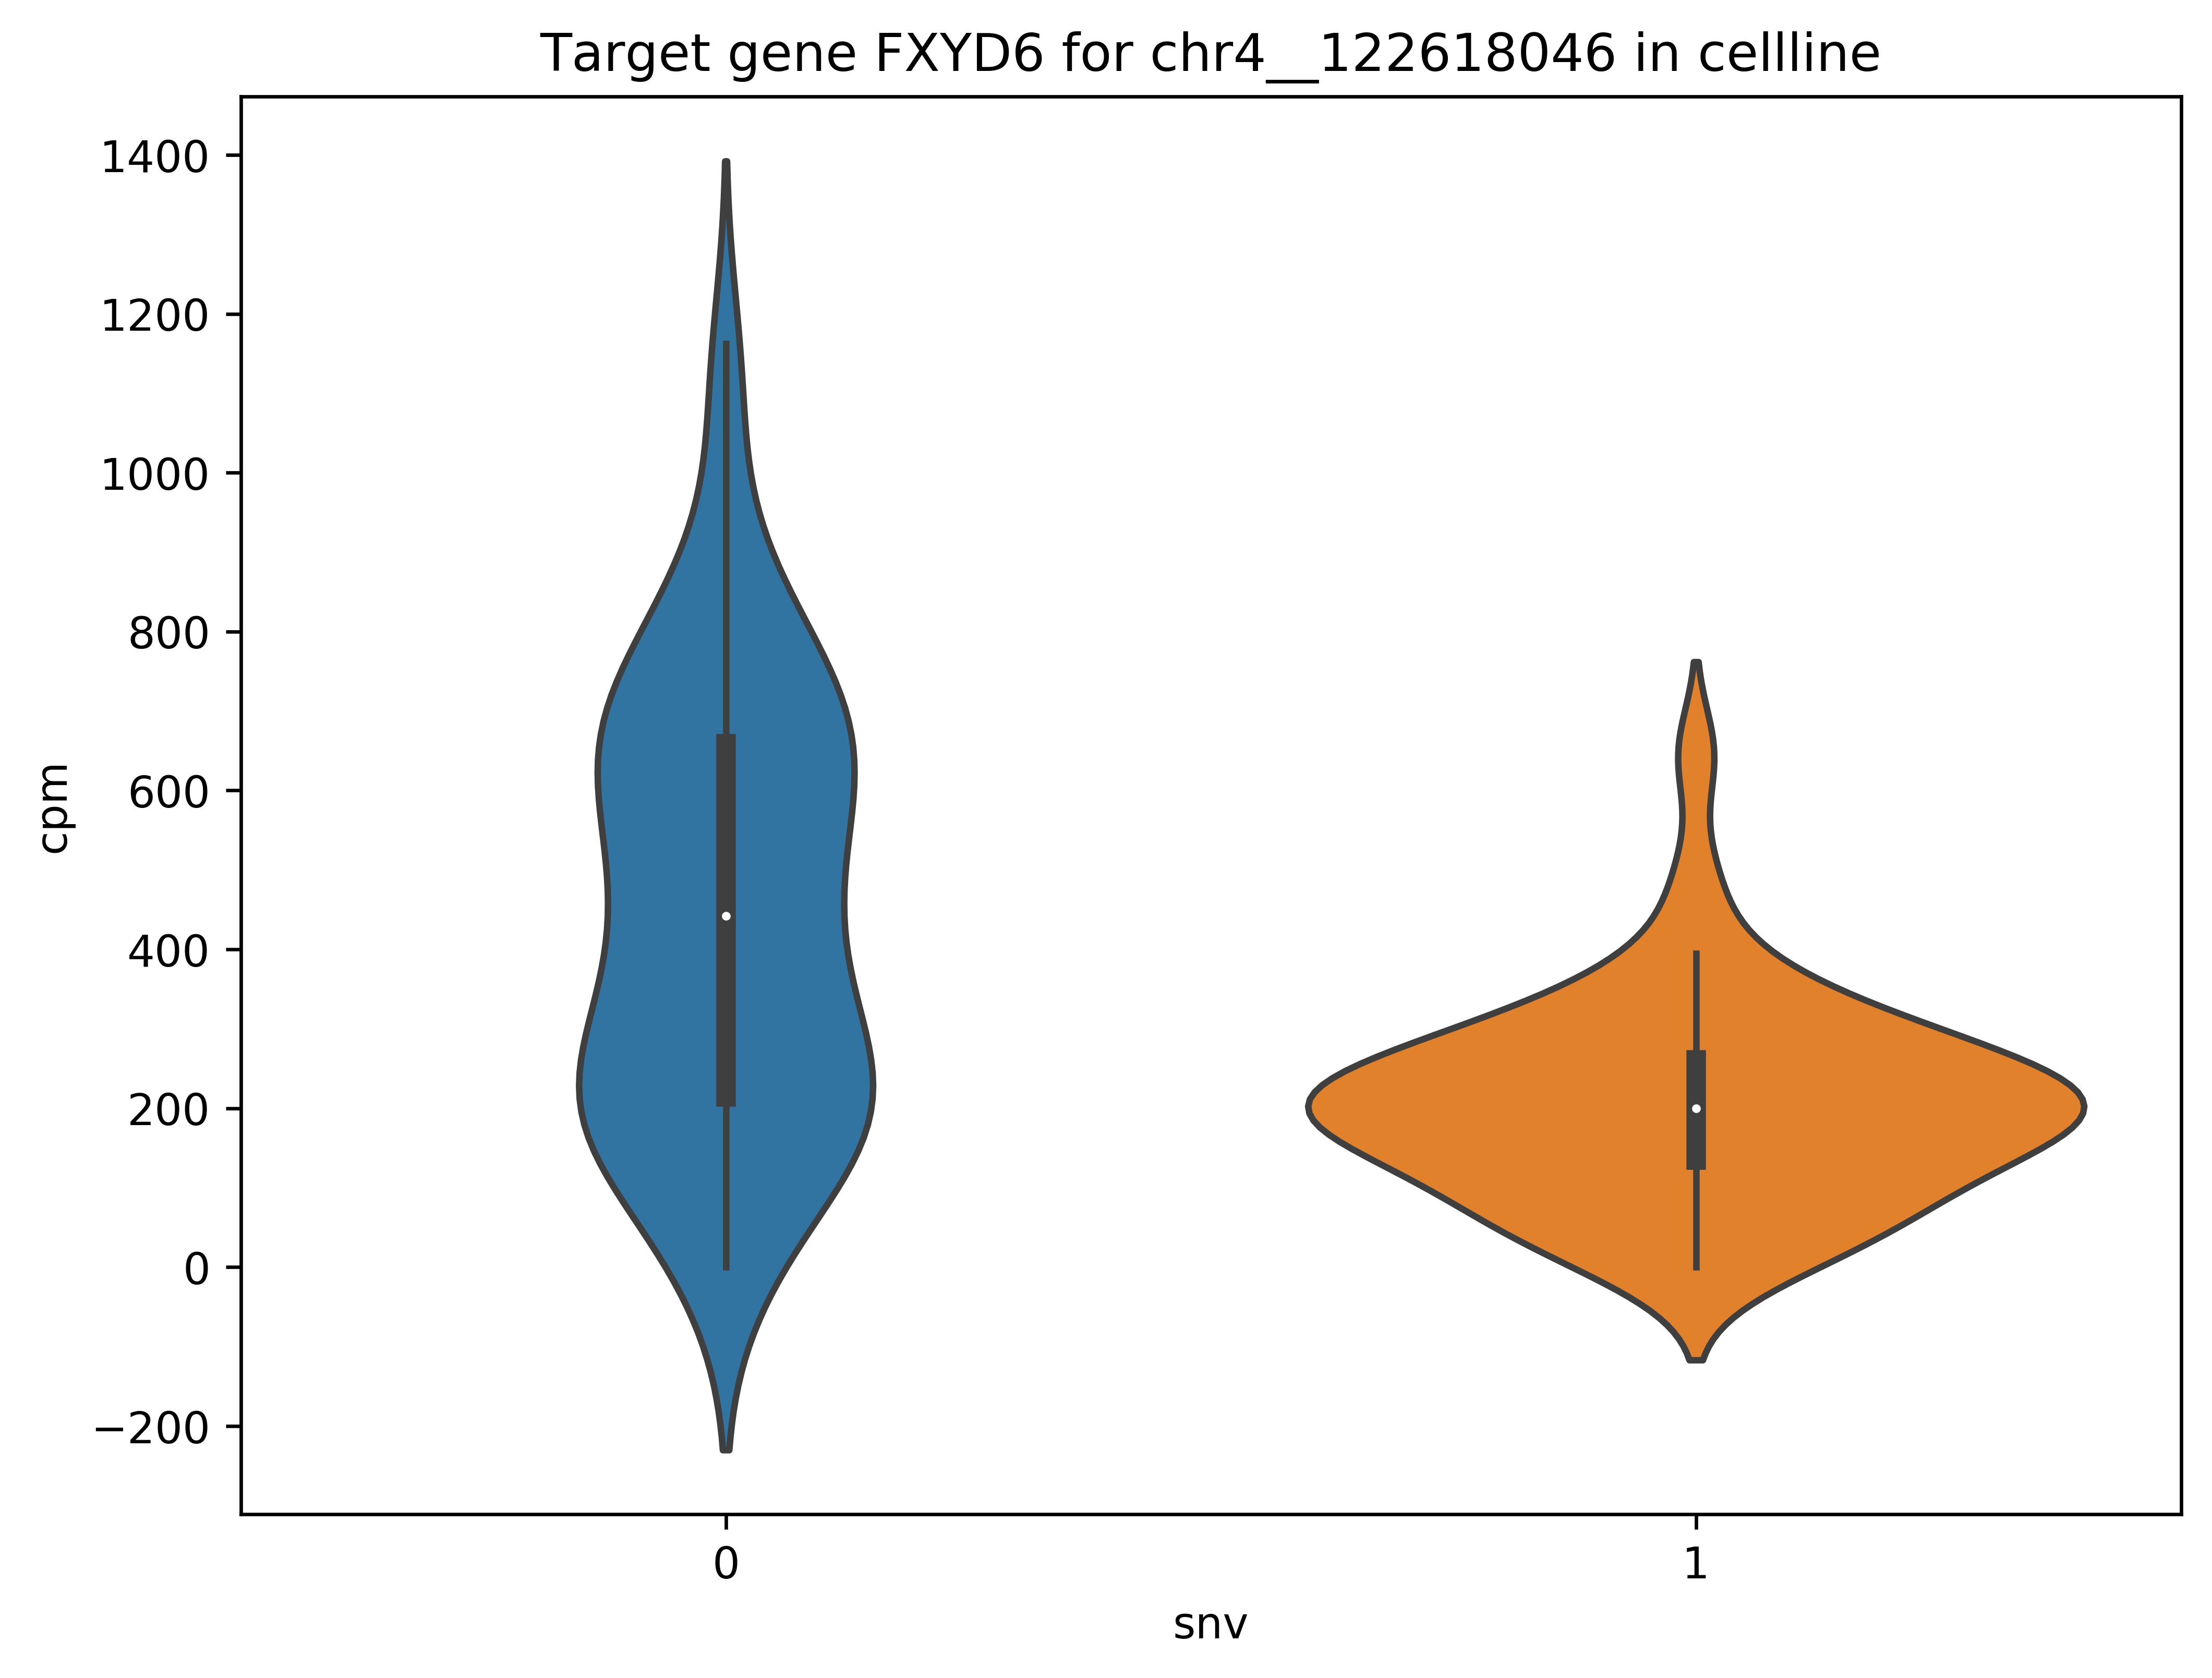

In [124]:
ax = sns.violinplot(x="snv", y="gene", data=df_patients_FXYD6)
ax.set(xlabel='snv', ylabel='cpm')
ax.set_title('Target gene FXYD6 for chr4__122618046 in cellline')

In [125]:
# target gene: ENSG00000109099.9 PMP22
# located gene: ENSG00000164111.10 ANXA5
df_patients_PMP22 = pd.DataFrame({'gene':third_cpm_profile_cellline.loc['ENSG00000109099.9',:],
                   'snv':third_snv_profile_cellline.loc['chr4__122618046',:],
                   'gene_snv':exp_profile.loc['ENSG00000164111.10',third_cpm_profile_cellline.columns.values],
                   'gene_snv_reads':reads_profile.loc['ENSG00000164111.10',third_cpm_profile_cellline.columns.values]})

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Target gene PMP22 for chr4__122618046 in cellline')

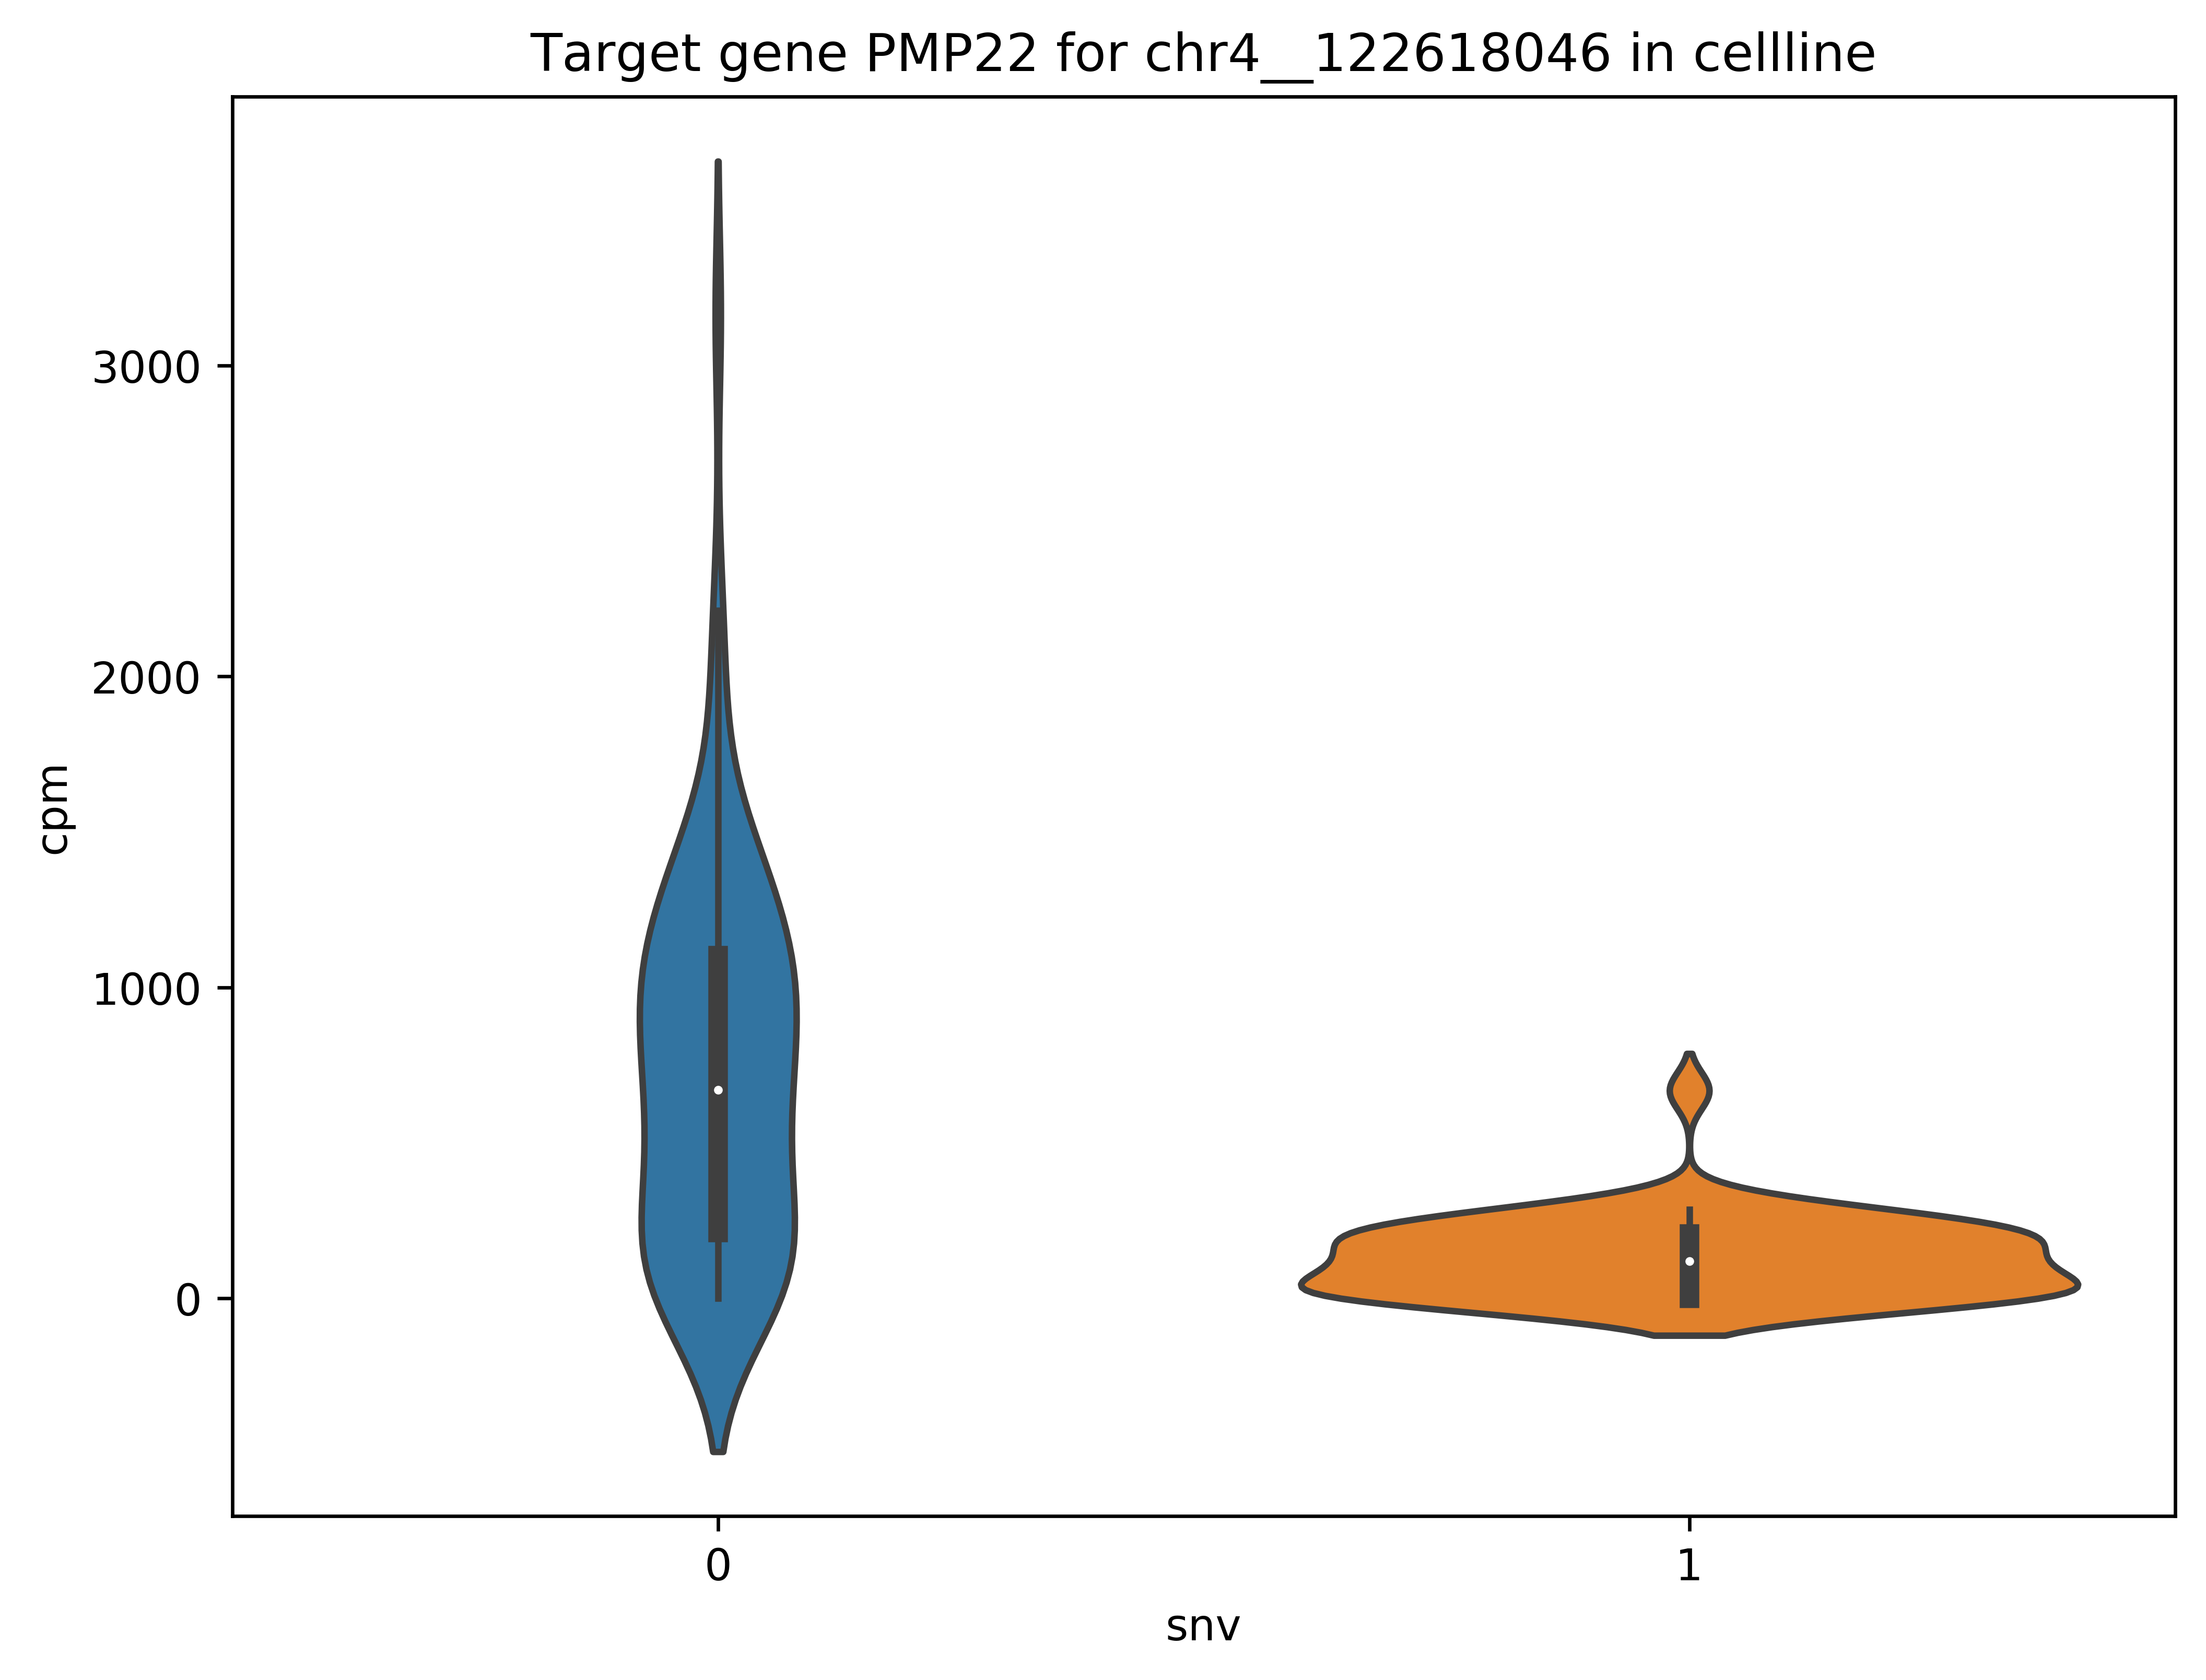

In [126]:
ax = sns.violinplot(x="snv", y="gene", data=df_patients_PMP22)
ax.set(xlabel='snv', ylabel='cpm')
ax.set_title('Target gene PMP22 for chr4__122618046 in cellline')

In [127]:
# target gene: ENSG00000143549.15 TPM3
# located gene: ENSG00000164111.10 ANXA5
df_patients_PMP22 = pd.DataFrame({'gene':third_cpm_profile_cellline.loc['ENSG00000143549.15',:],
                   'snv':third_snv_profile_cellline.loc['chr4__122618046',:],
                   'gene_snv':exp_profile.loc['ENSG00000164111.10',third_cpm_profile_cellline.columns.values],
                   'gene_snv_reads':reads_profile.loc['ENSG00000164111.10',third_cpm_profile_cellline.columns.values]})

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Target gene TPM3 for chr4__122618046 in cellline')

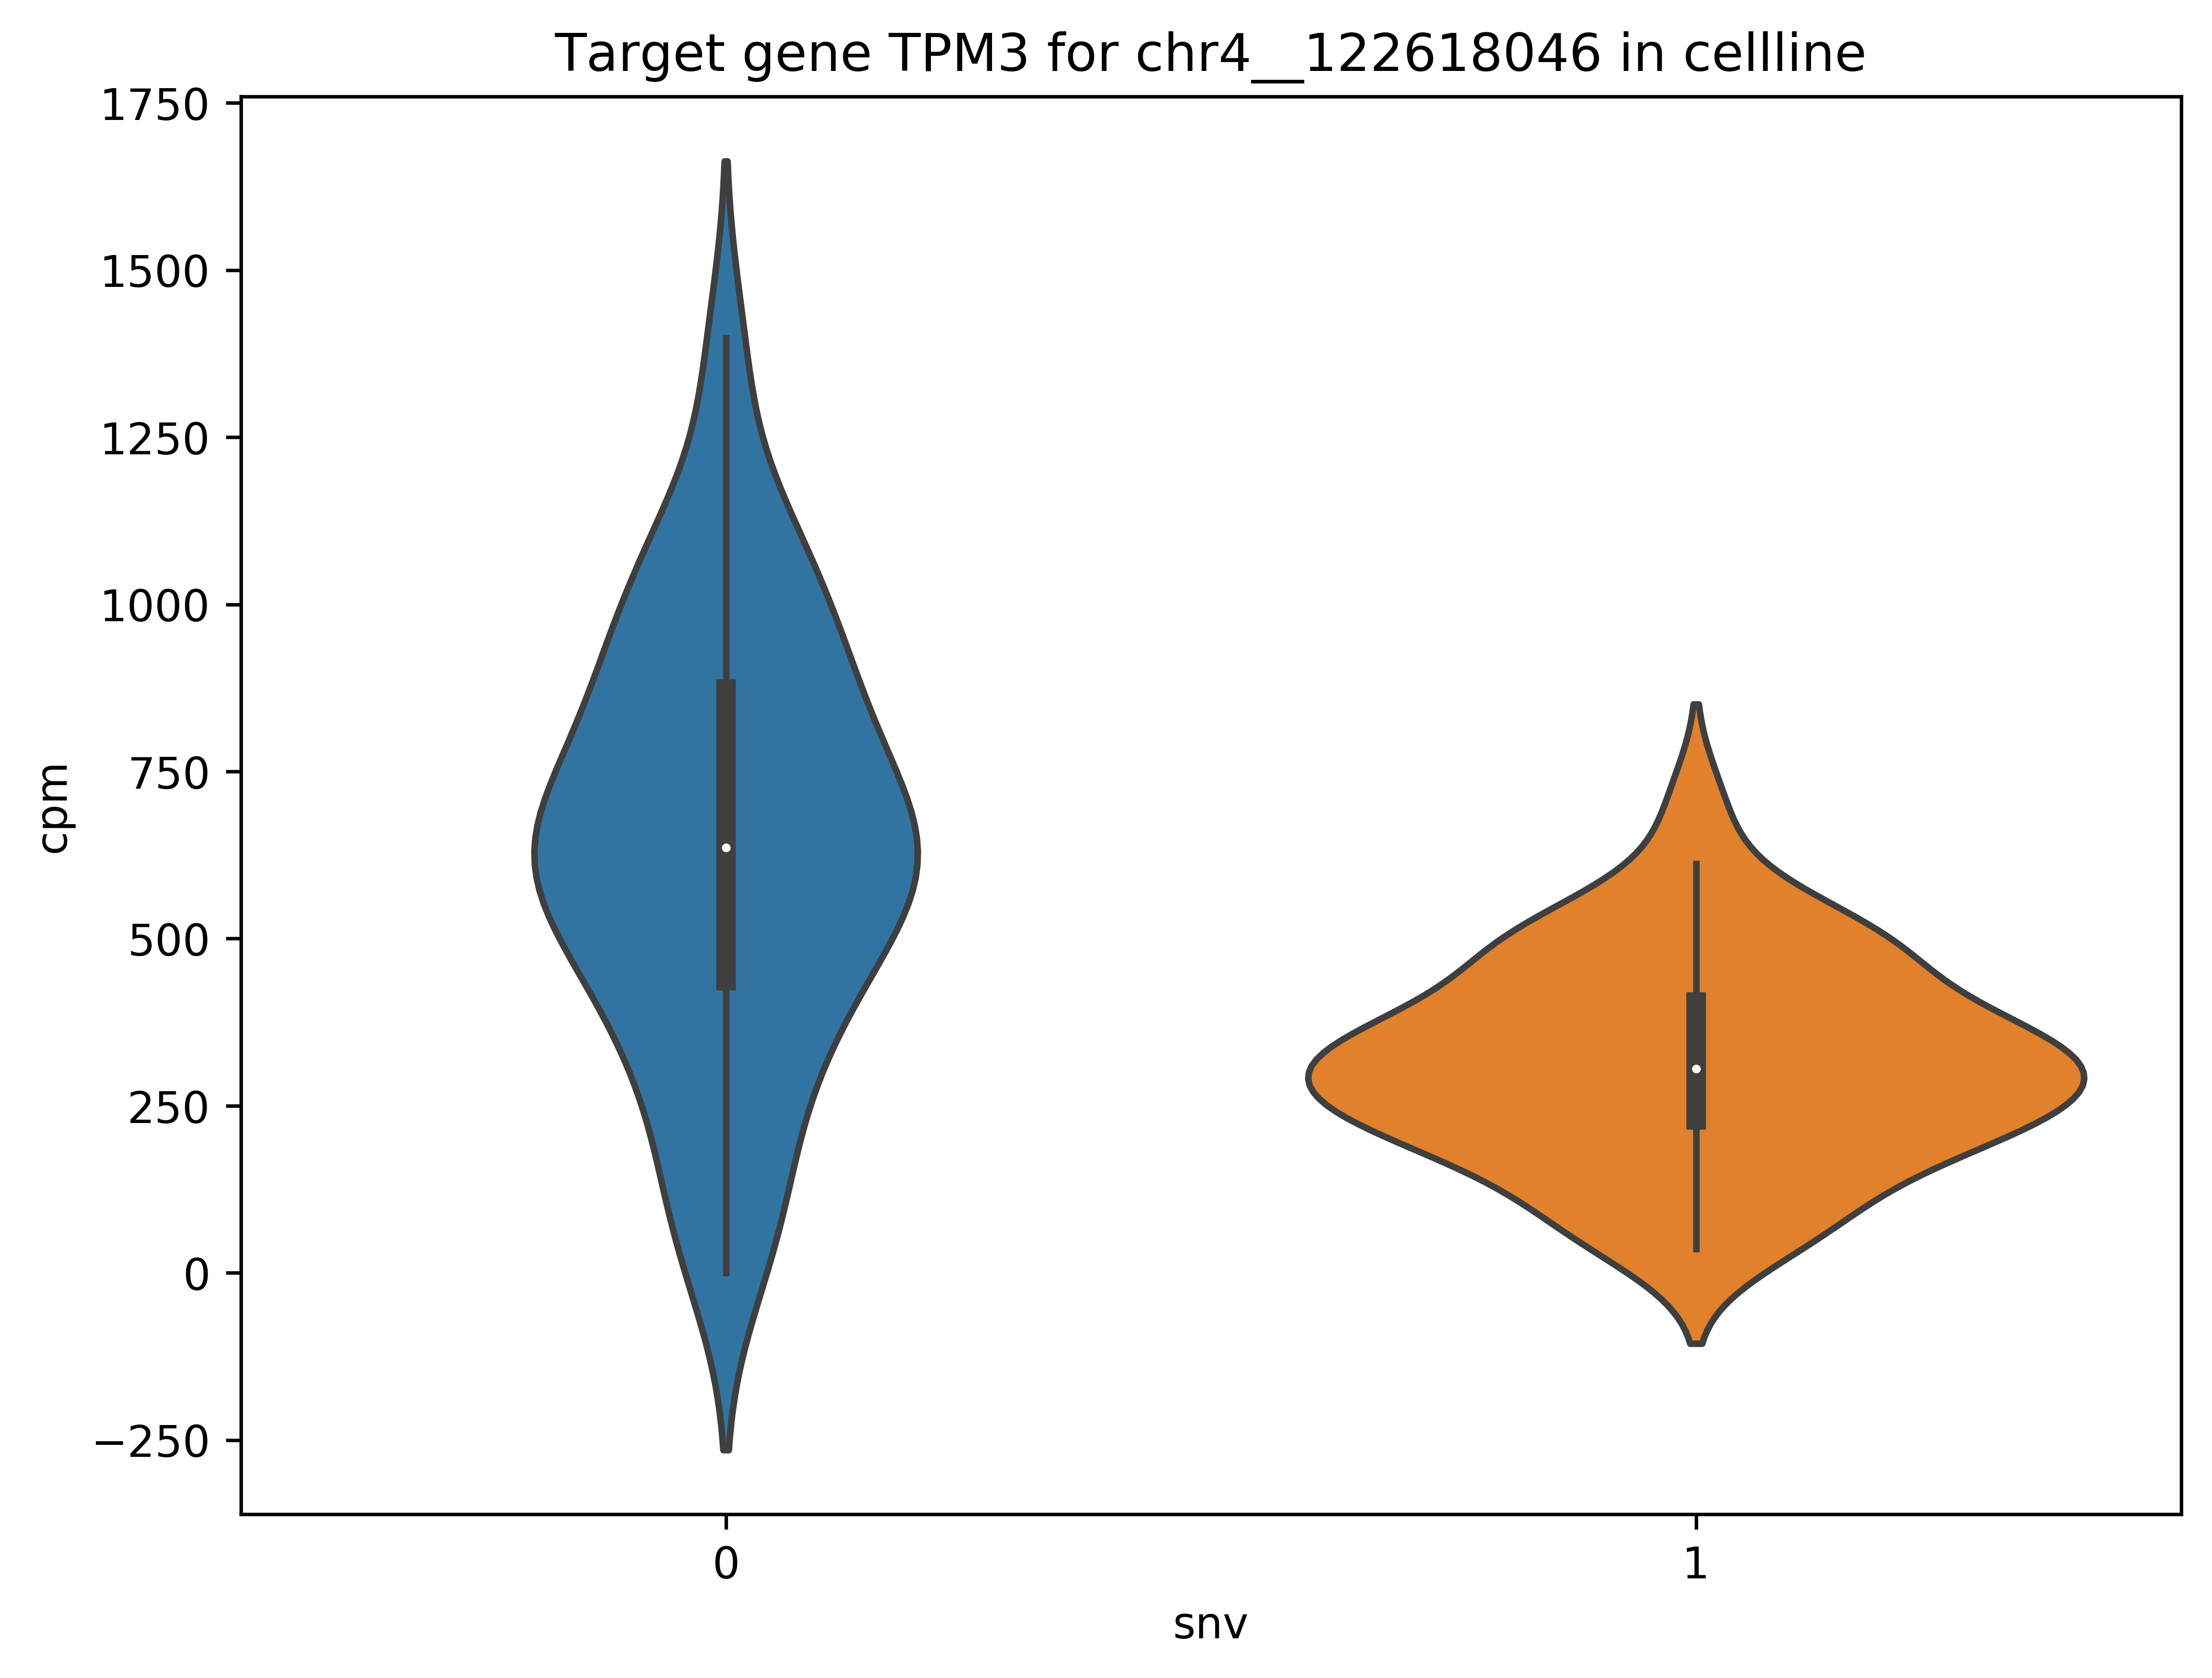

In [128]:
ax = sns.violinplot(x="snv", y="gene", data=df_patients_PMP22)
ax.set(xlabel='snv', ylabel='cpm')
ax.set_title('Target gene TPM3 for chr4__122618046 in cellline')

In [129]:
# target gene: ENSG00000182718.12 ANXA2
# located gene: ENSG00000164111.10 ANXA5
df_patients_ANXA2 = pd.DataFrame({'gene':third_cpm_profile_cellline.loc['ENSG00000182718.12',:],
                   'snv':third_snv_profile_cellline.loc['chr4__122618046',:],
                   'gene_snv':exp_profile.loc['ENSG00000164111.10',third_cpm_profile_cellline.columns.values],
                   'gene_snv_reads':reads_profile.loc['ENSG00000164111.10',third_cpm_profile_cellline.columns.values]})

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Target gene ANXA2 for chr4__122618046 in cellline')

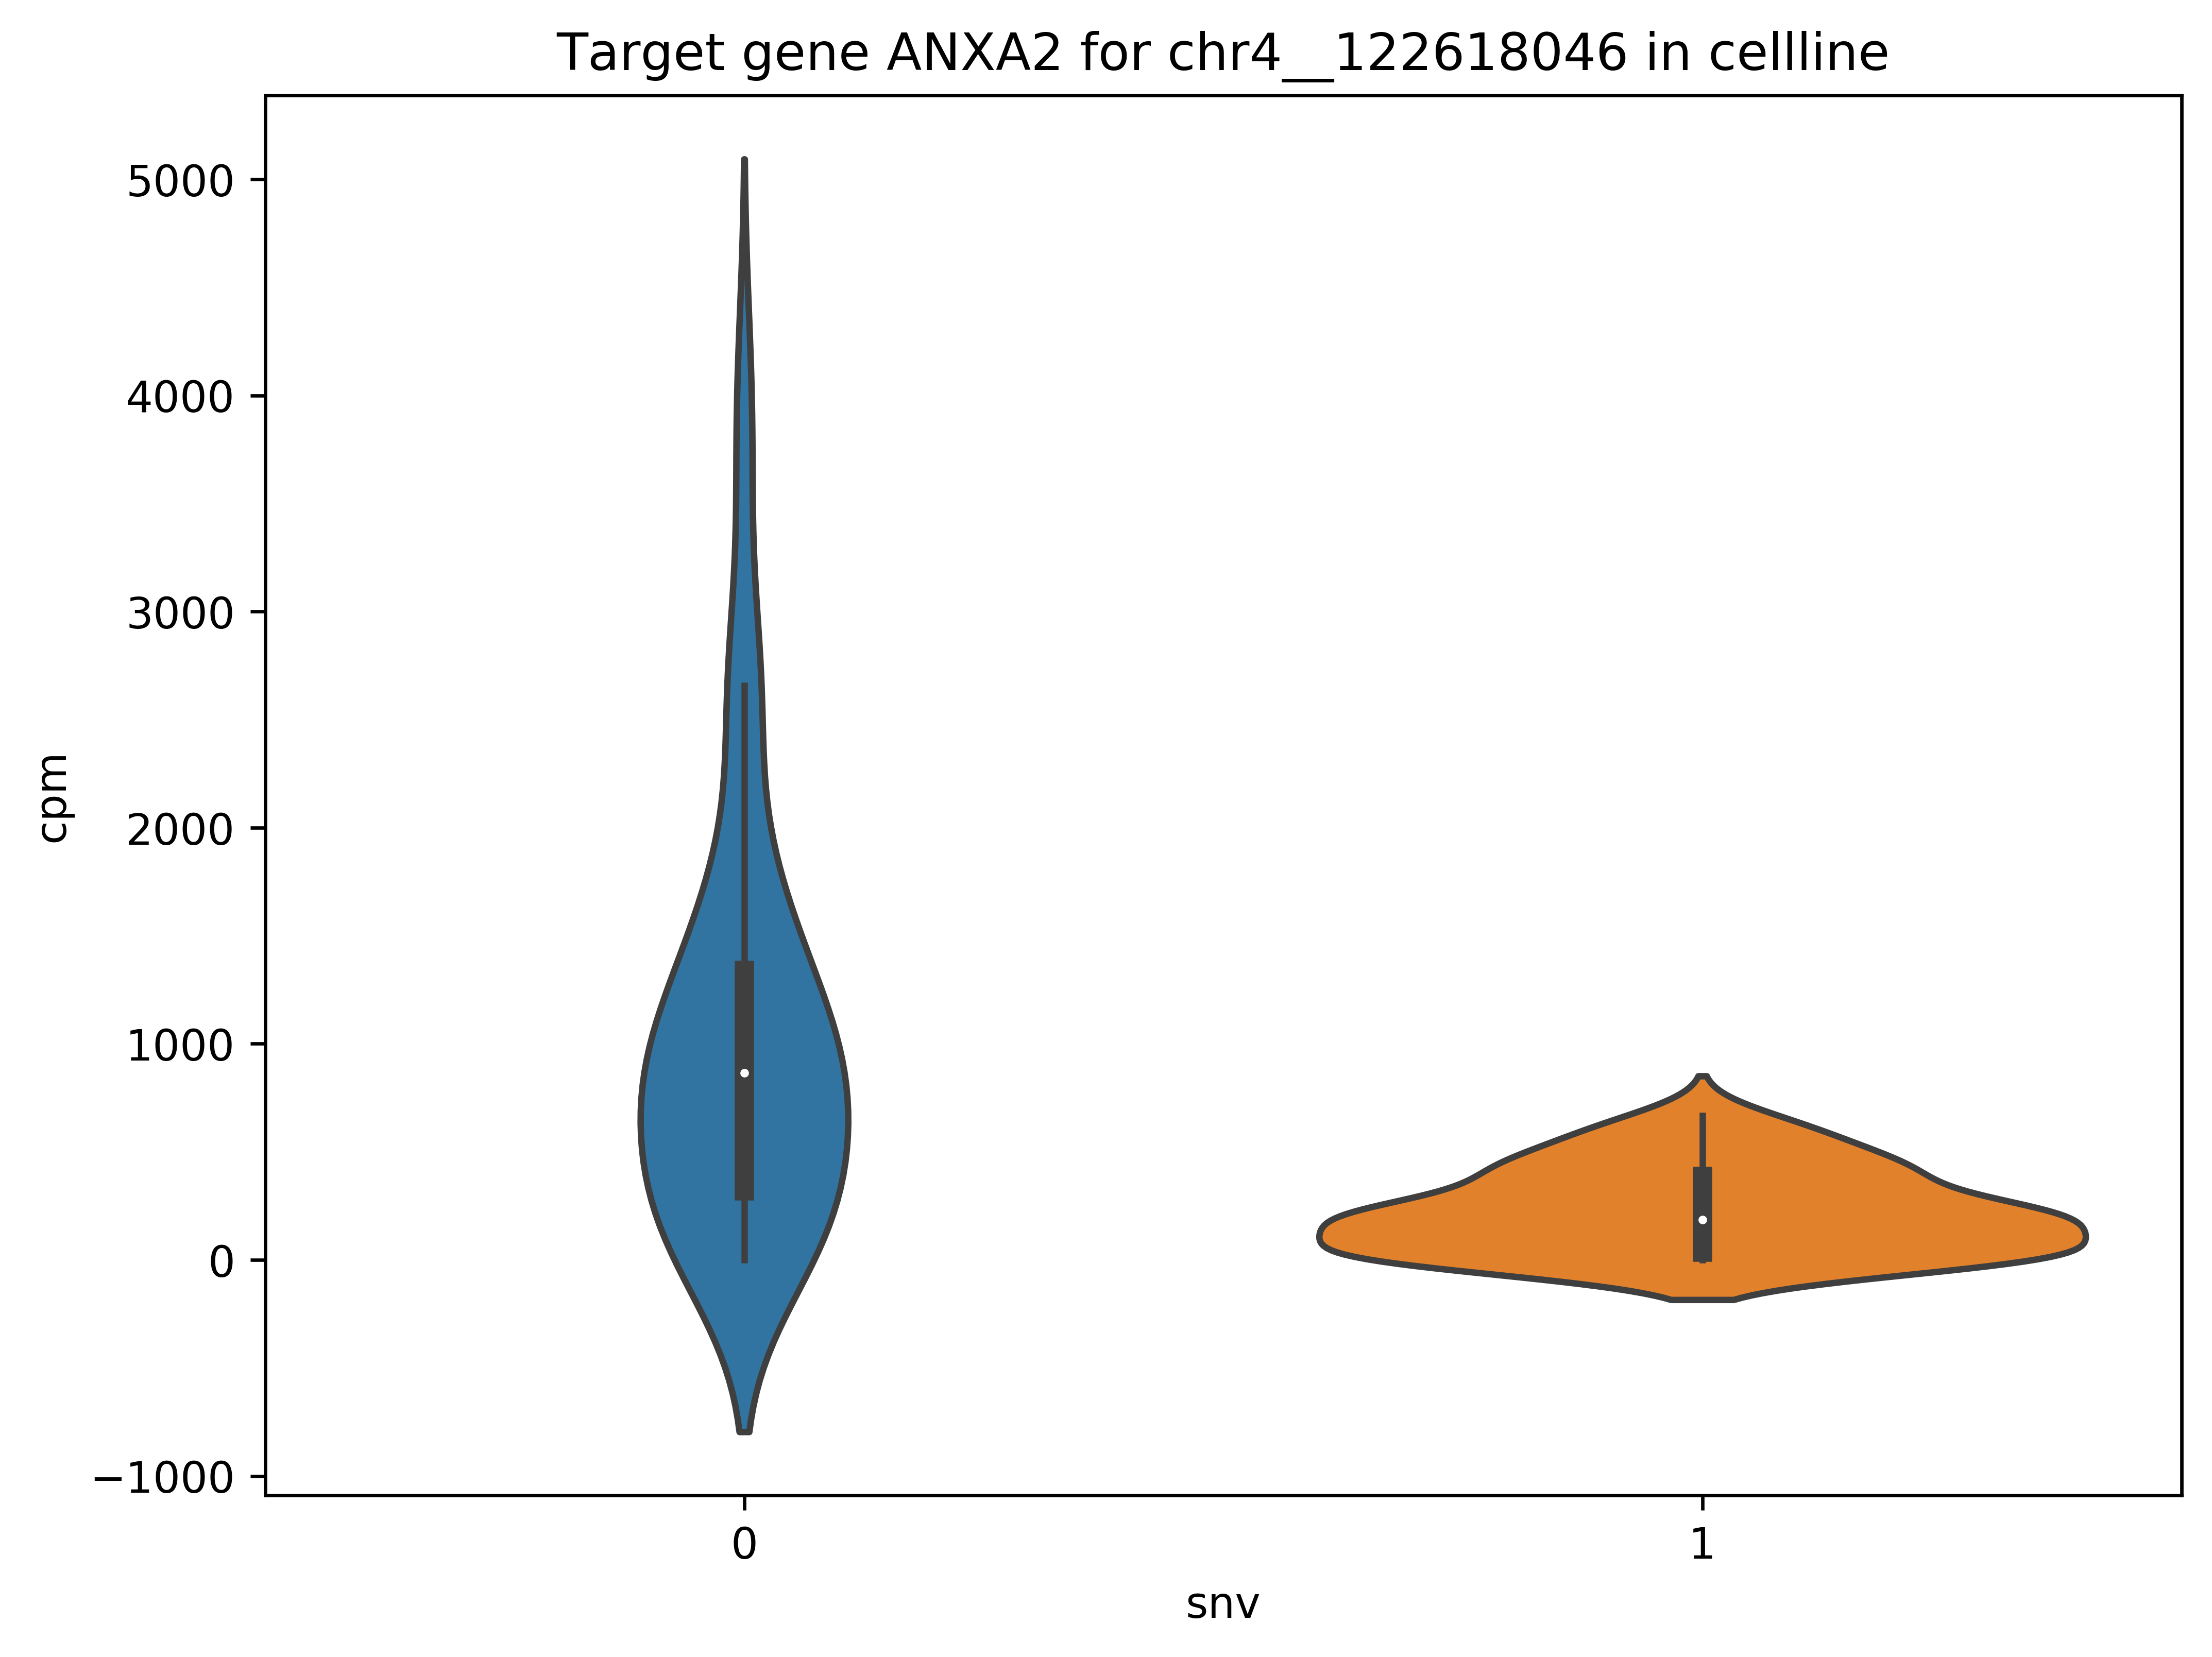

In [130]:
ax = sns.violinplot(x="snv", y="gene", data=df_patients_ANXA2)
ax.set(xlabel='snv', ylabel='cpm')
ax.set_title('Target gene ANXA2 for chr4__122618046 in cellline')

In [131]:
# target gene: ENSG00000149294.12 NCAM1
# located gene: ENSG00000164111.10 ANXA5
df_patients_NCAM1 = pd.DataFrame({'gene':third_cpm_profile_cellline.loc['ENSG00000149294.12',:],
                   'snv':third_snv_profile_cellline.loc['chr4__122618046',:],
                   'gene_snv':exp_profile.loc['ENSG00000164111.10',third_cpm_profile_cellline.columns.values],
                   'gene_snv_reads':reads_profile.loc['ENSG00000164111.10',third_cpm_profile_cellline.columns.values]})

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Target gene NCAM1 for chr4__122618046 in cellline')

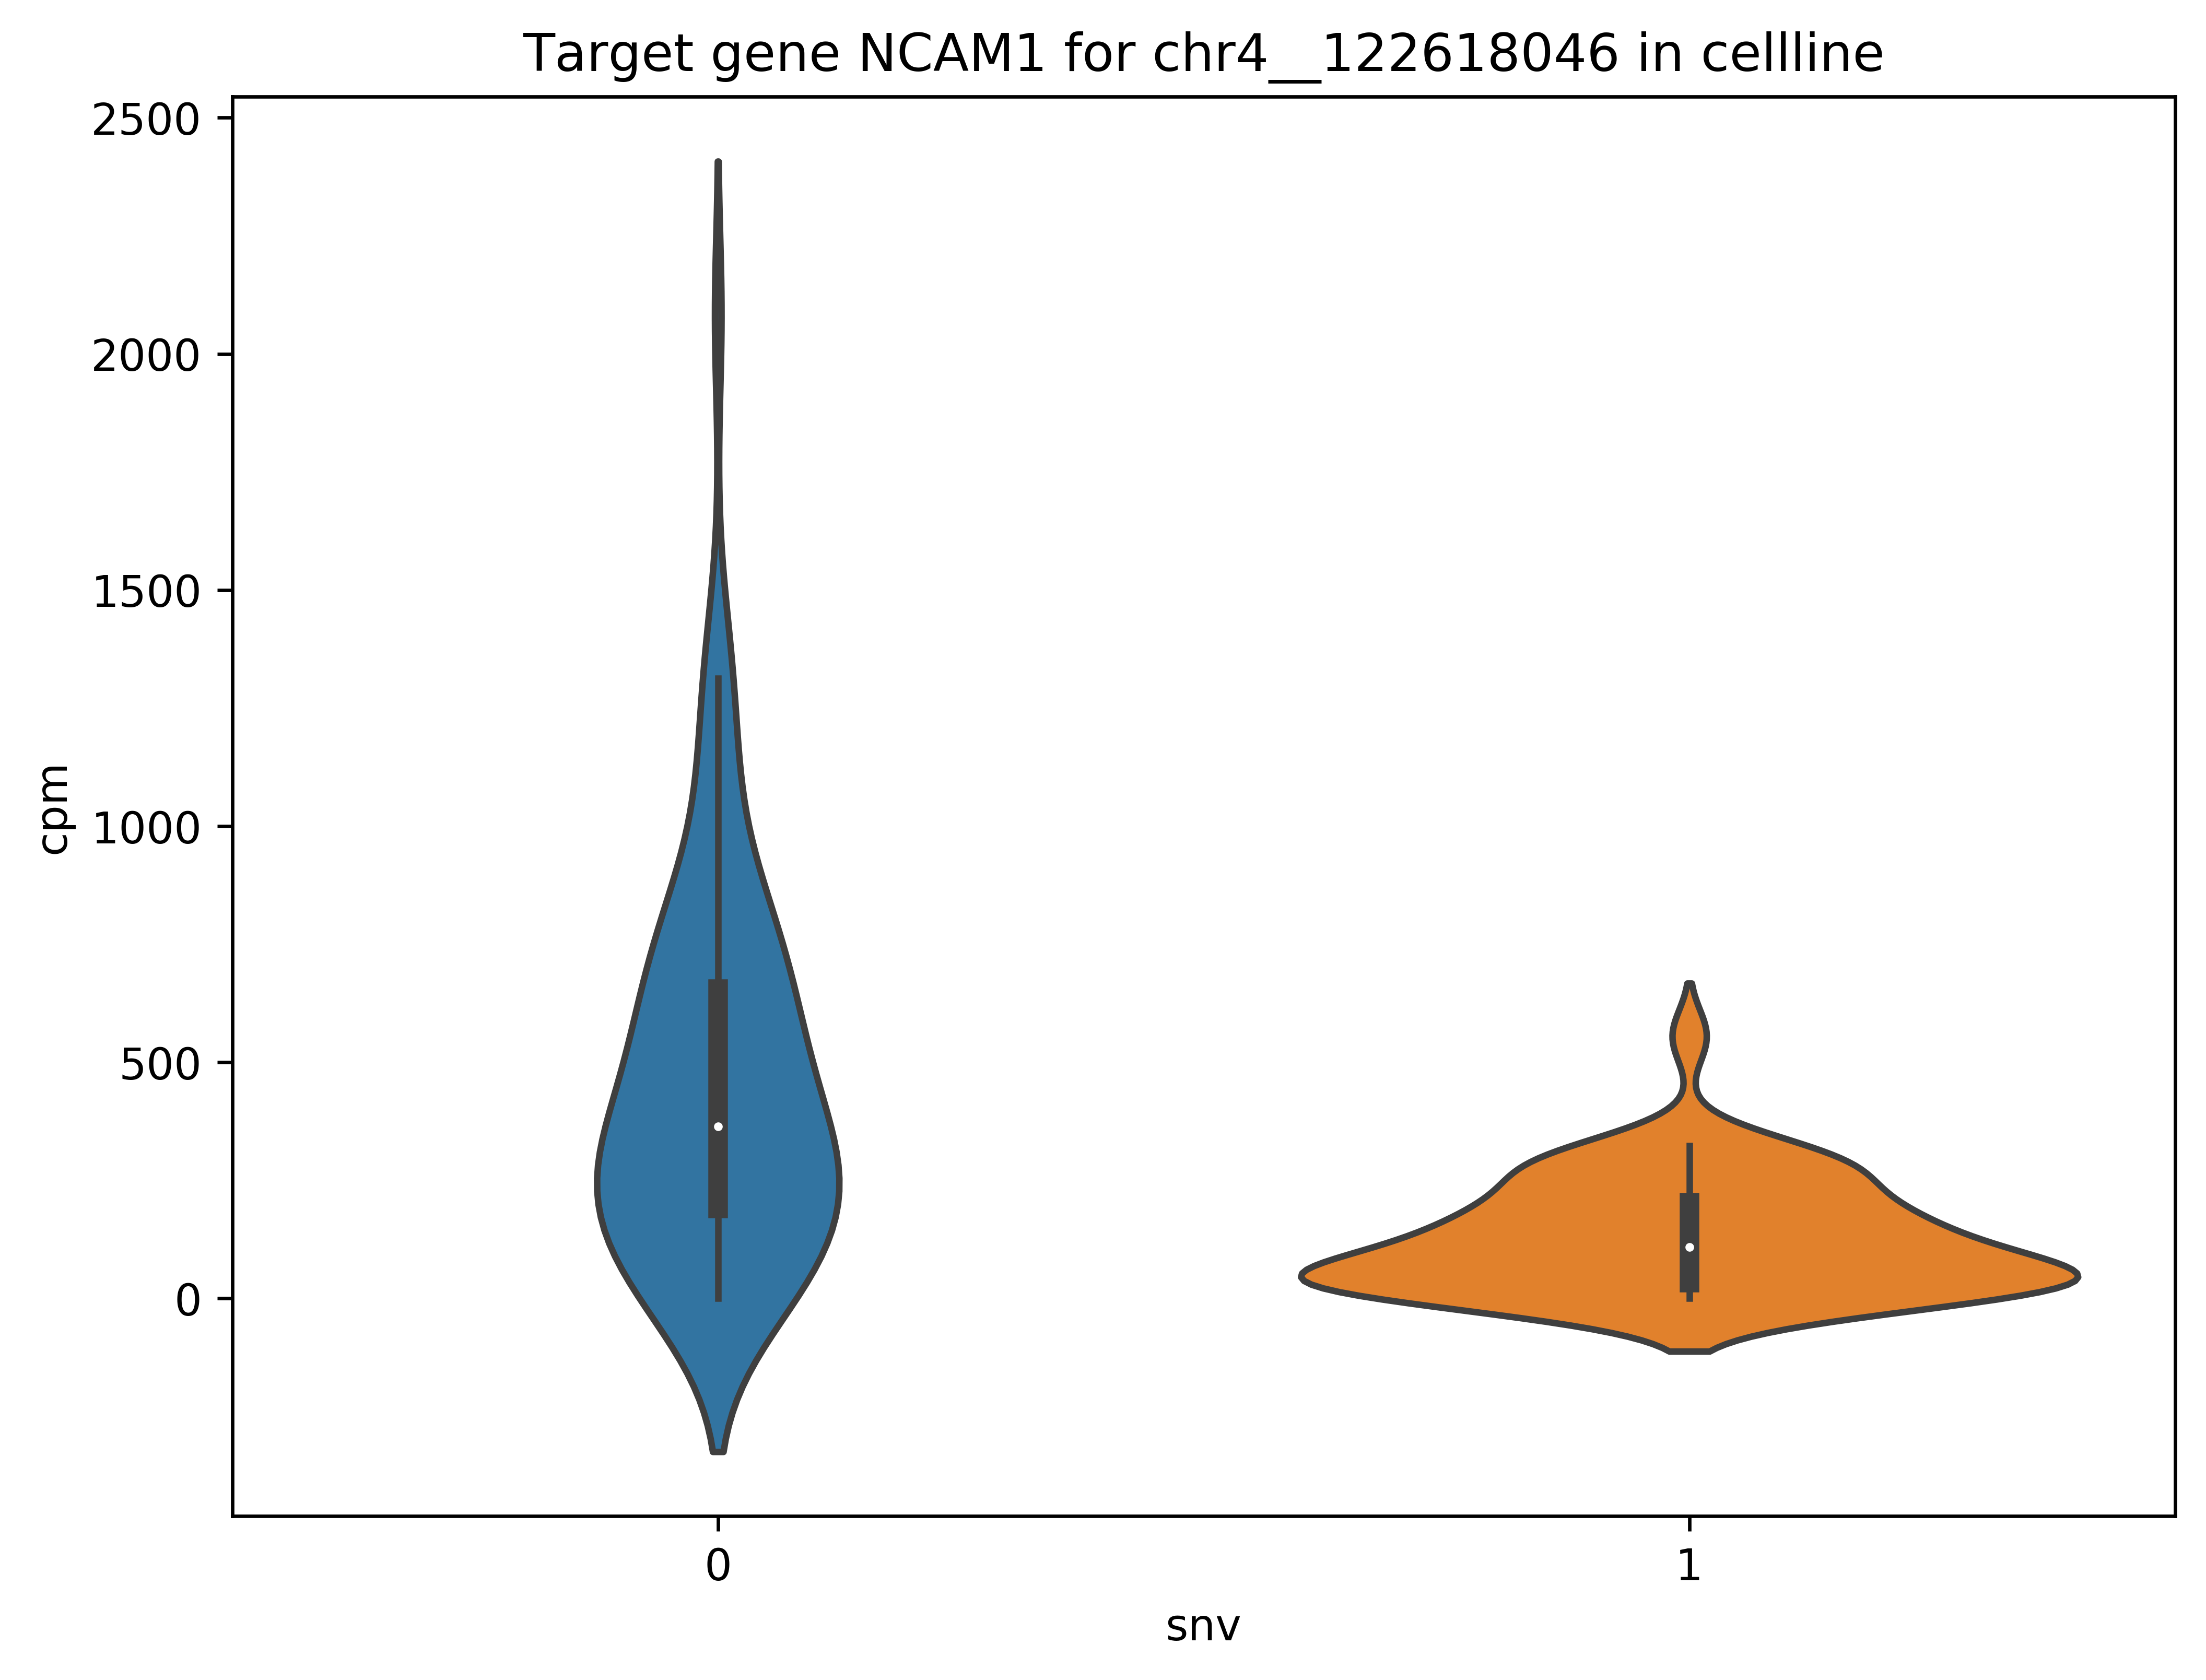

In [132]:
ax = sns.violinplot(x="snv", y="gene", data=df_patients_NCAM1)
ax.set(xlabel='snv', ylabel='cpm')
ax.set_title('Target gene NCAM1 for chr4__122618046 in cellline')

In [133]:
# target gene: ENSG00000150625.12 GPM6A
# located gene: ENSG00000164111.10 ANXA5
df_patients_GPM6A = pd.DataFrame({'gene':third_cpm_profile_cellline.loc['ENSG00000150625.12',:],
                   'snv':third_snv_profile_cellline.loc['chr4__122618046',:],
                   'gene_snv':exp_profile.loc['ENSG00000164111.10',third_cpm_profile_cellline.columns.values],
                   'gene_snv_reads':reads_profile.loc['ENSG00000164111.10',third_cpm_profile_cellline.columns.values]})

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Target gene GPM6A for chr4__122618046 in cellline')

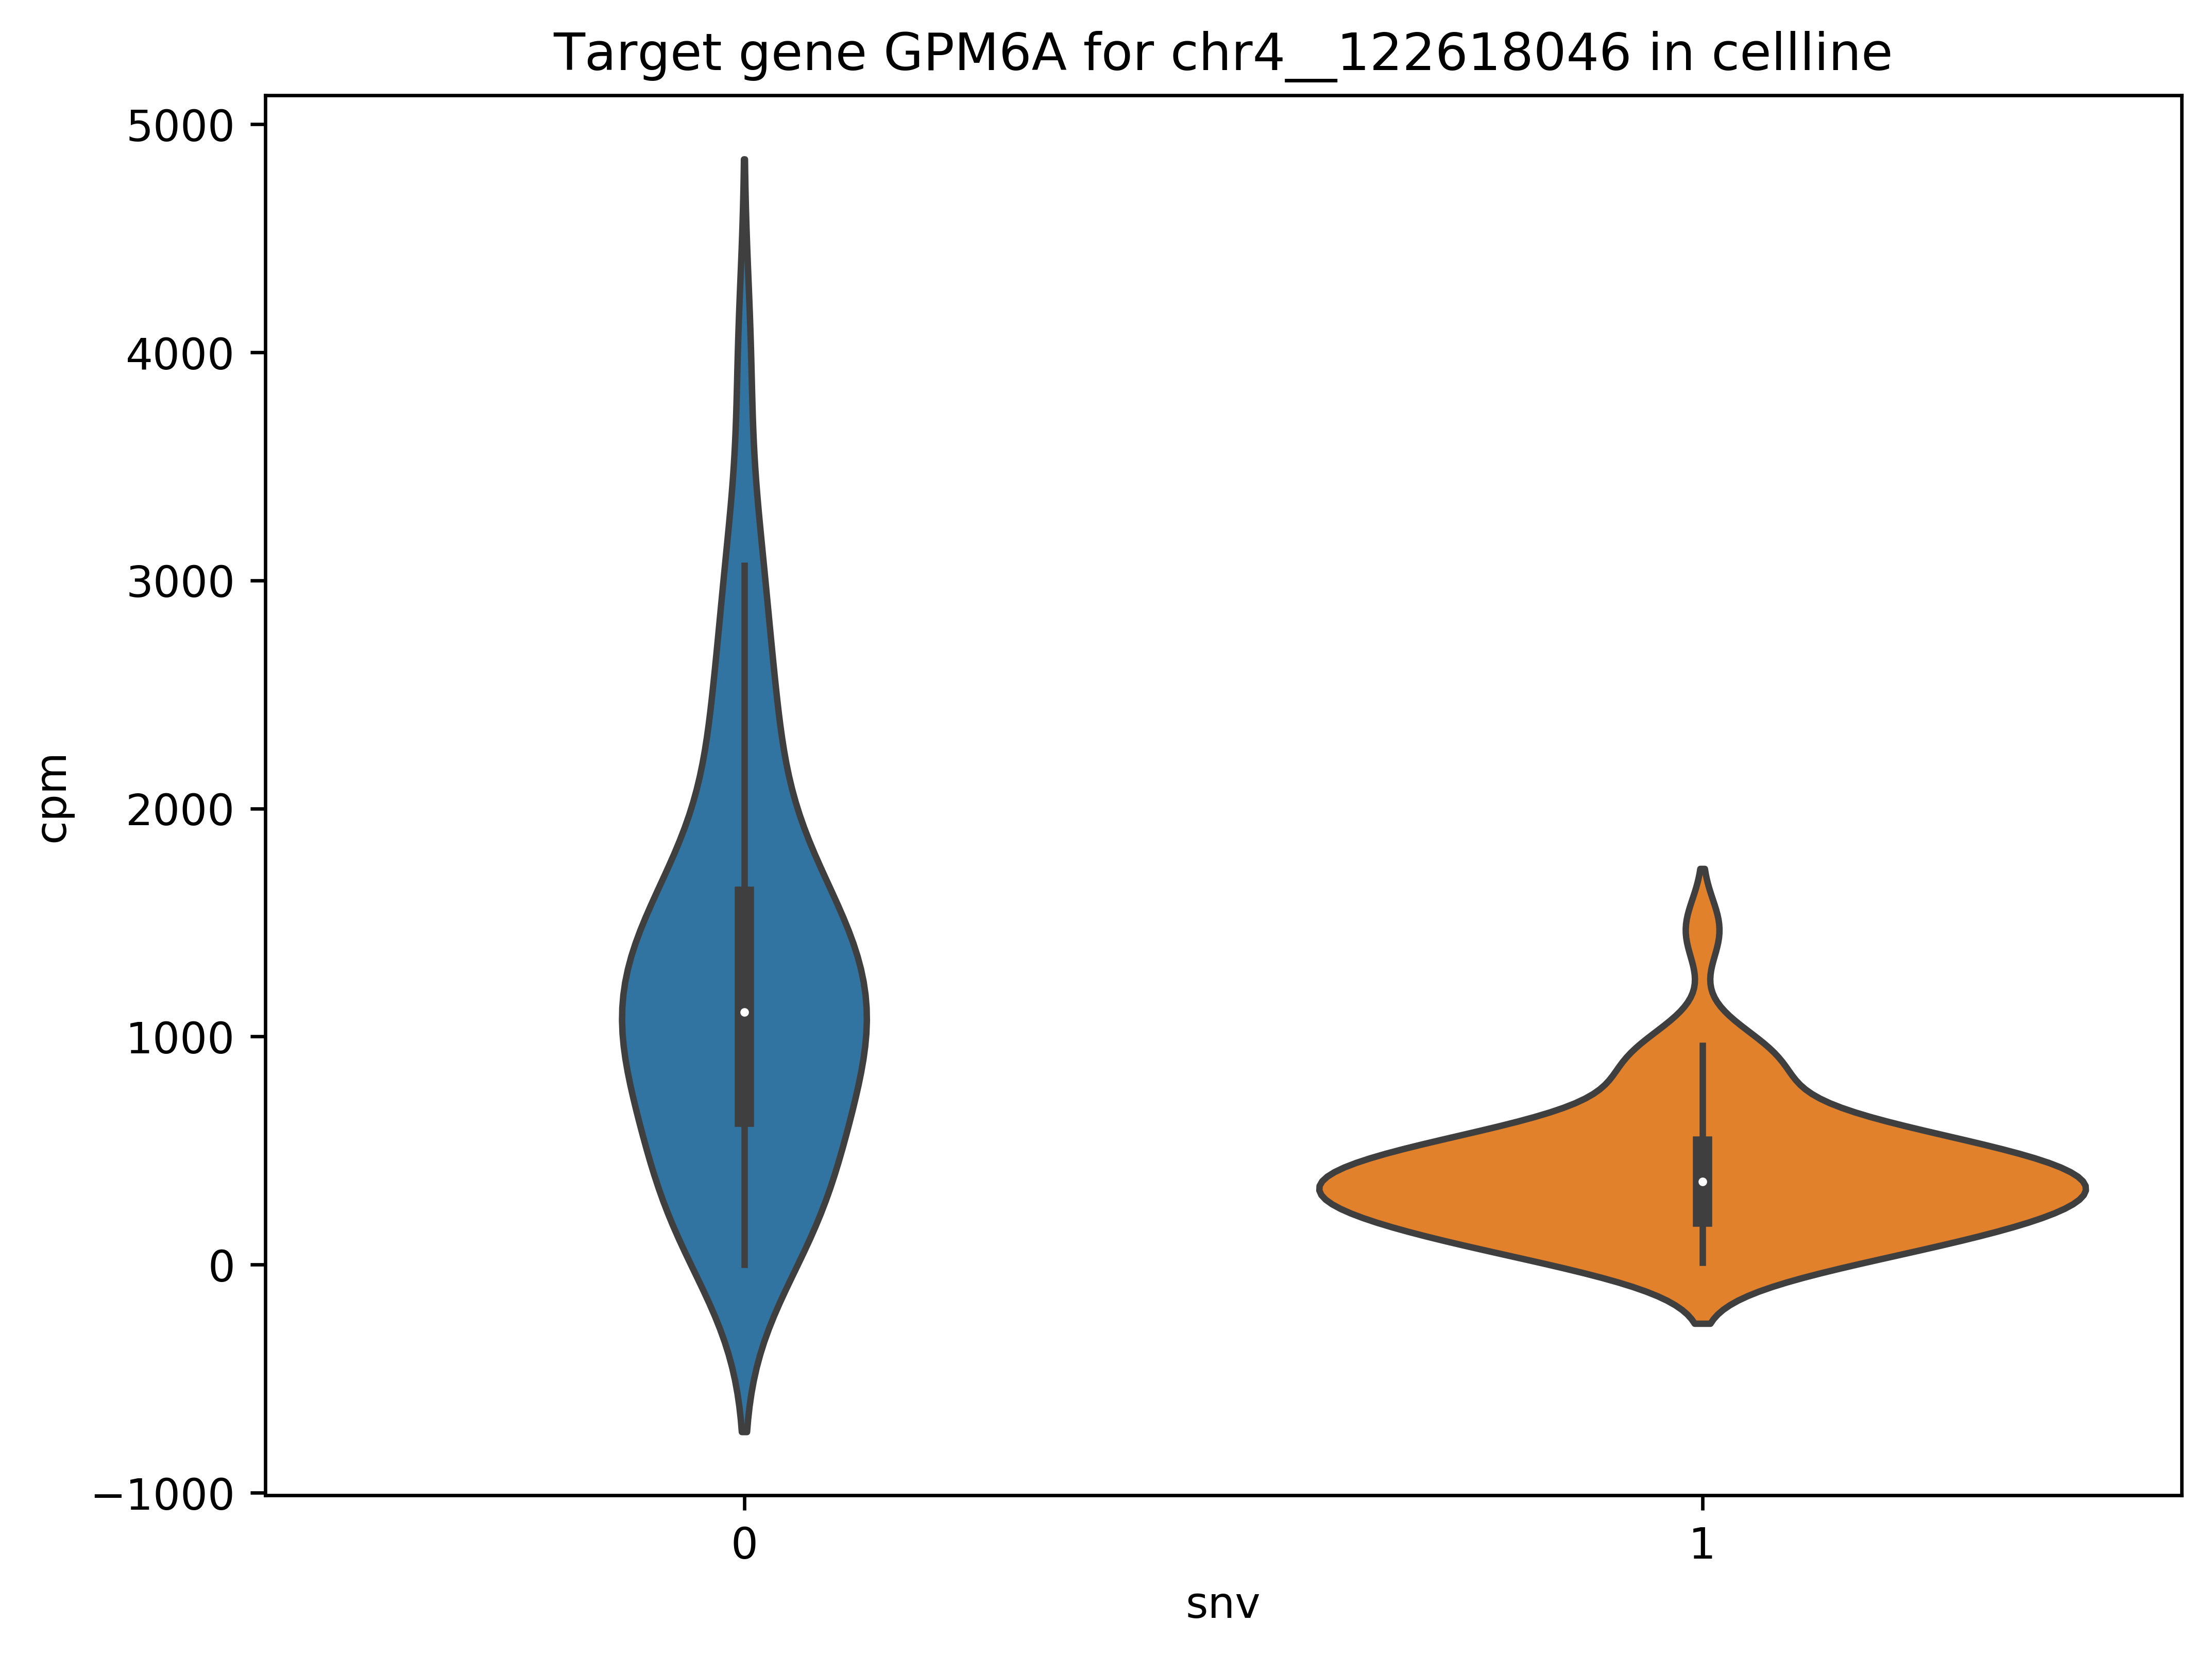

In [134]:
ax = sns.violinplot(x="snv", y="gene", data=df_patients_GPM6A)
ax.set(xlabel='snv', ylabel='cpm')
ax.set_title('Target gene GPM6A for chr4__122618046 in cellline')

In [135]:
# target gene: ENSG00000079332.10 SAR1A
# located gene: ENSG00000164111.10 ANXA5
df_patients_SAR1A = pd.DataFrame({'gene':third_cpm_profile_cellline.loc['ENSG00000079332.10',:],
                   'snv':third_snv_profile_cellline.loc['chr4__122618046',:],
                   'gene_snv':exp_profile.loc['ENSG00000164111.10',third_cpm_profile_cellline.columns.values],
                   'gene_snv_reads':reads_profile.loc['ENSG00000164111.10',third_cpm_profile_cellline.columns.values]})

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Target gene SAR1A for chr4__122618046 in cellline')

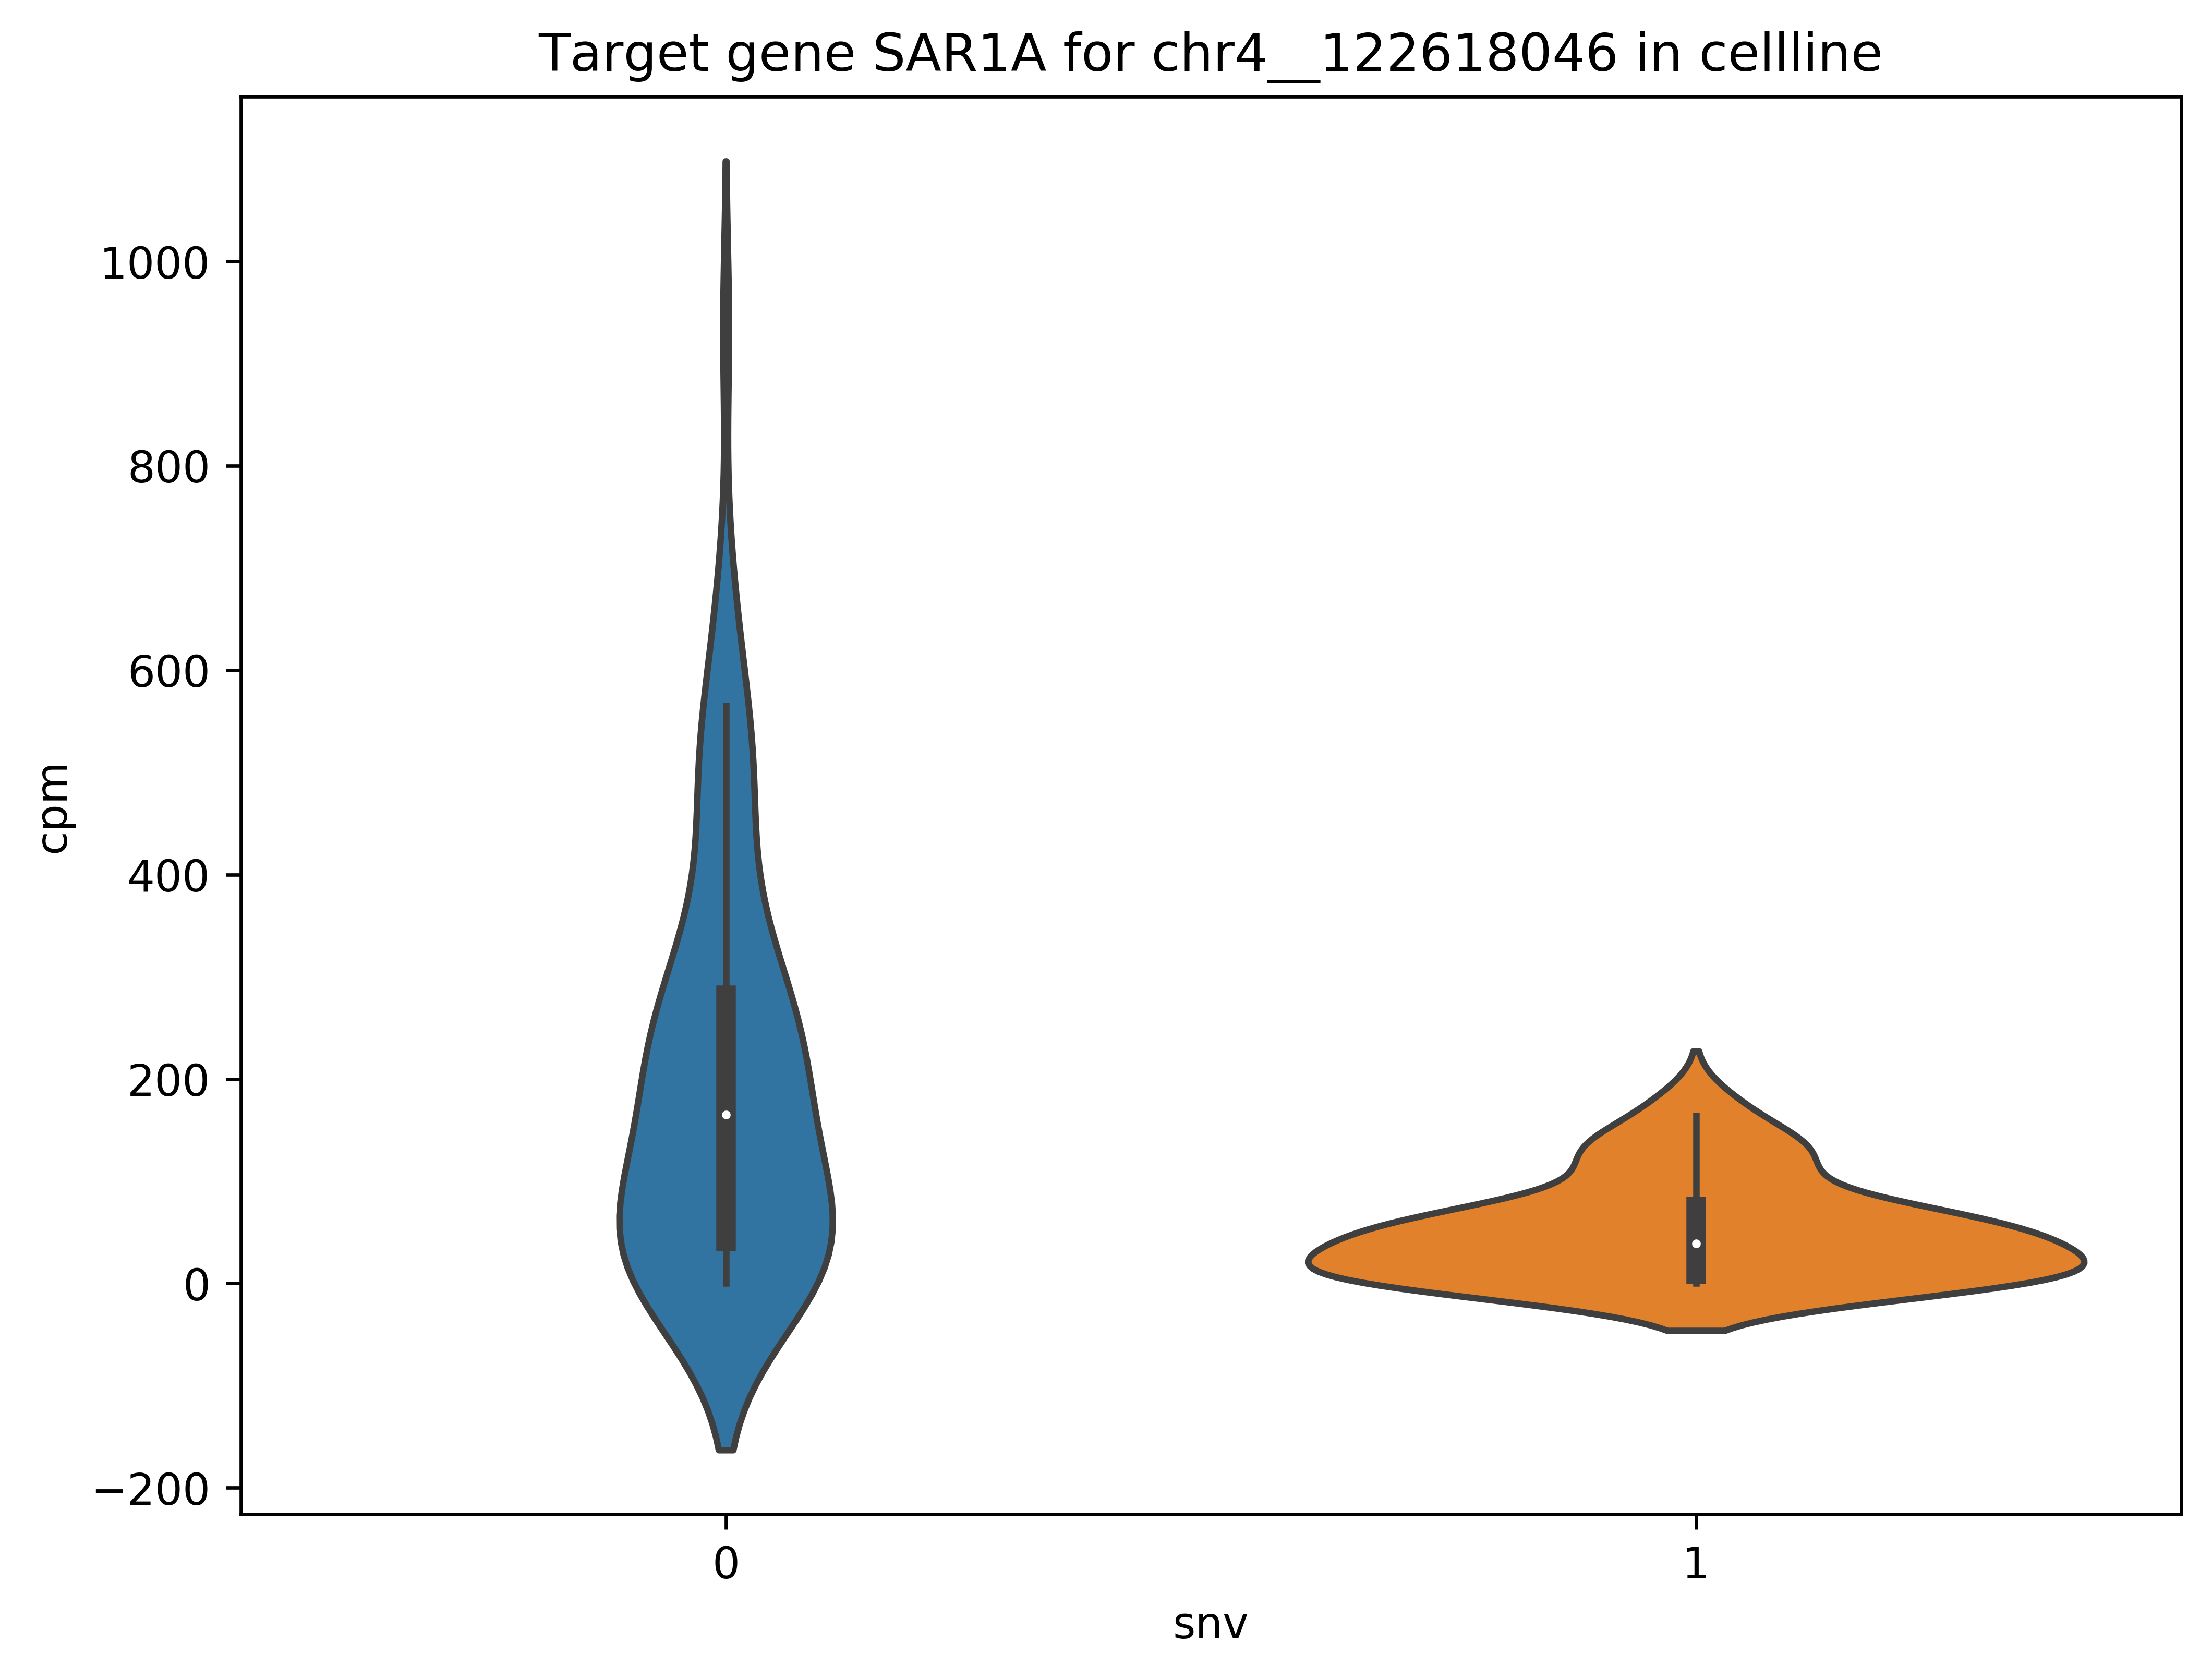

In [136]:
ax = sns.violinplot(x="snv", y="gene", data=df_patients_SAR1A)
ax.set(xlabel='snv', ylabel='cpm')
ax.set_title('Target gene SAR1A for chr4__122618046 in cellline')

# Heterogeneous in chr8__11702594

In [137]:
label_all = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_cellline_patient_label.csv', index_col=0)

In [142]:
label_all.loc[third_cpm_profile_cellline.columns,]

label        single_or_bulk                   sample_title subtype  \
SRR1295167  CSC6  Single cell mRNA-seq  Single cell mRNA-seq_CSC6_A04     NaN   
SRR1295168  CSC6  Single cell mRNA-seq  Single cell mRNA-seq_CSC6_A05     NaN   
SRR1295171  CSC6  Single cell mRNA-seq  Single cell mRNA-seq_CSC6_A08     NaN   
SRR1295173  CSC6  Single cell mRNA-seq  Single cell mRNA-seq_CSC6_A10     NaN   
SRR1295174  CSC6  Single cell mRNA-seq  Single cell mRNA-seq_CSC6_A11     NaN   
...          ...                   ...                            ...     ...   
SRR1295349  CSC8  Single cell mRNA-seq  Single cell mRNA-seq_CSC8_H06     NaN   
SRR1295350  CSC8  Single cell mRNA-seq  Single cell mRNA-seq_CSC8_H07     NaN   
SRR1295352  CSC8  Single cell mRNA-seq  Single cell mRNA-seq_CSC8_H09     NaN   
SRR1295354  CSC8  Single cell mRNA-seq  Single cell mRNA-seq_CSC8_H11     NaN   
SRR1295355  CSC8  Single cell mRNA-seq  Single cell mRNA-seq_CSC8_H12     NaN   

                                                  description  
SRR1295167  Please note that this sample did not pass the ...  
SRR1295168           processed data file: GBM_data_matrix.txt  
SRR1295171           processed data file: GBM_data_matrix.txt  
SRR1295173           processed data file: GBM_data_matrix.txt  
SRR1295174           processed data file: GBM_data_matrix.txt  
...                                                       ...  
SRR1295349           processed data file: GBM_data_matrix.txt  
SRR1295350           processed data file: GBM_data_matrix.txt  
SRR1295352           processed data file: GBM_data_matrix.txt  
SRR1295354           processed data file: GBM_data_matrix.txt  
SRR1295355           processed data file: GBM_data_matrix.txt  

[126 rows x 5 columns]

In [143]:
# ENSG00000164733.16 CTSB chr8__11702594
df_patients_CTSB_heter = pd.DataFrame({'gene':third_cpm_profile_cellline.loc['ENSG00000164733.16',:],
                   'snv':third_snv_profile_cellline.loc['chr8__11702594',:],
                   'gene_snv':exp_profile.loc['ENSG00000164733.16',third_cpm_profile_cellline.columns.values],
                   'gene_snv_reads':reads_profile.loc['ENSG00000164733.16',third_cpm_profile_cellline.columns.values],
                    'label':label_all.loc[third_cpm_profile_cellline.columns,].label})

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a

Text(0.5, 1.0, 'CTSB chr8__11702594 in two celllines')

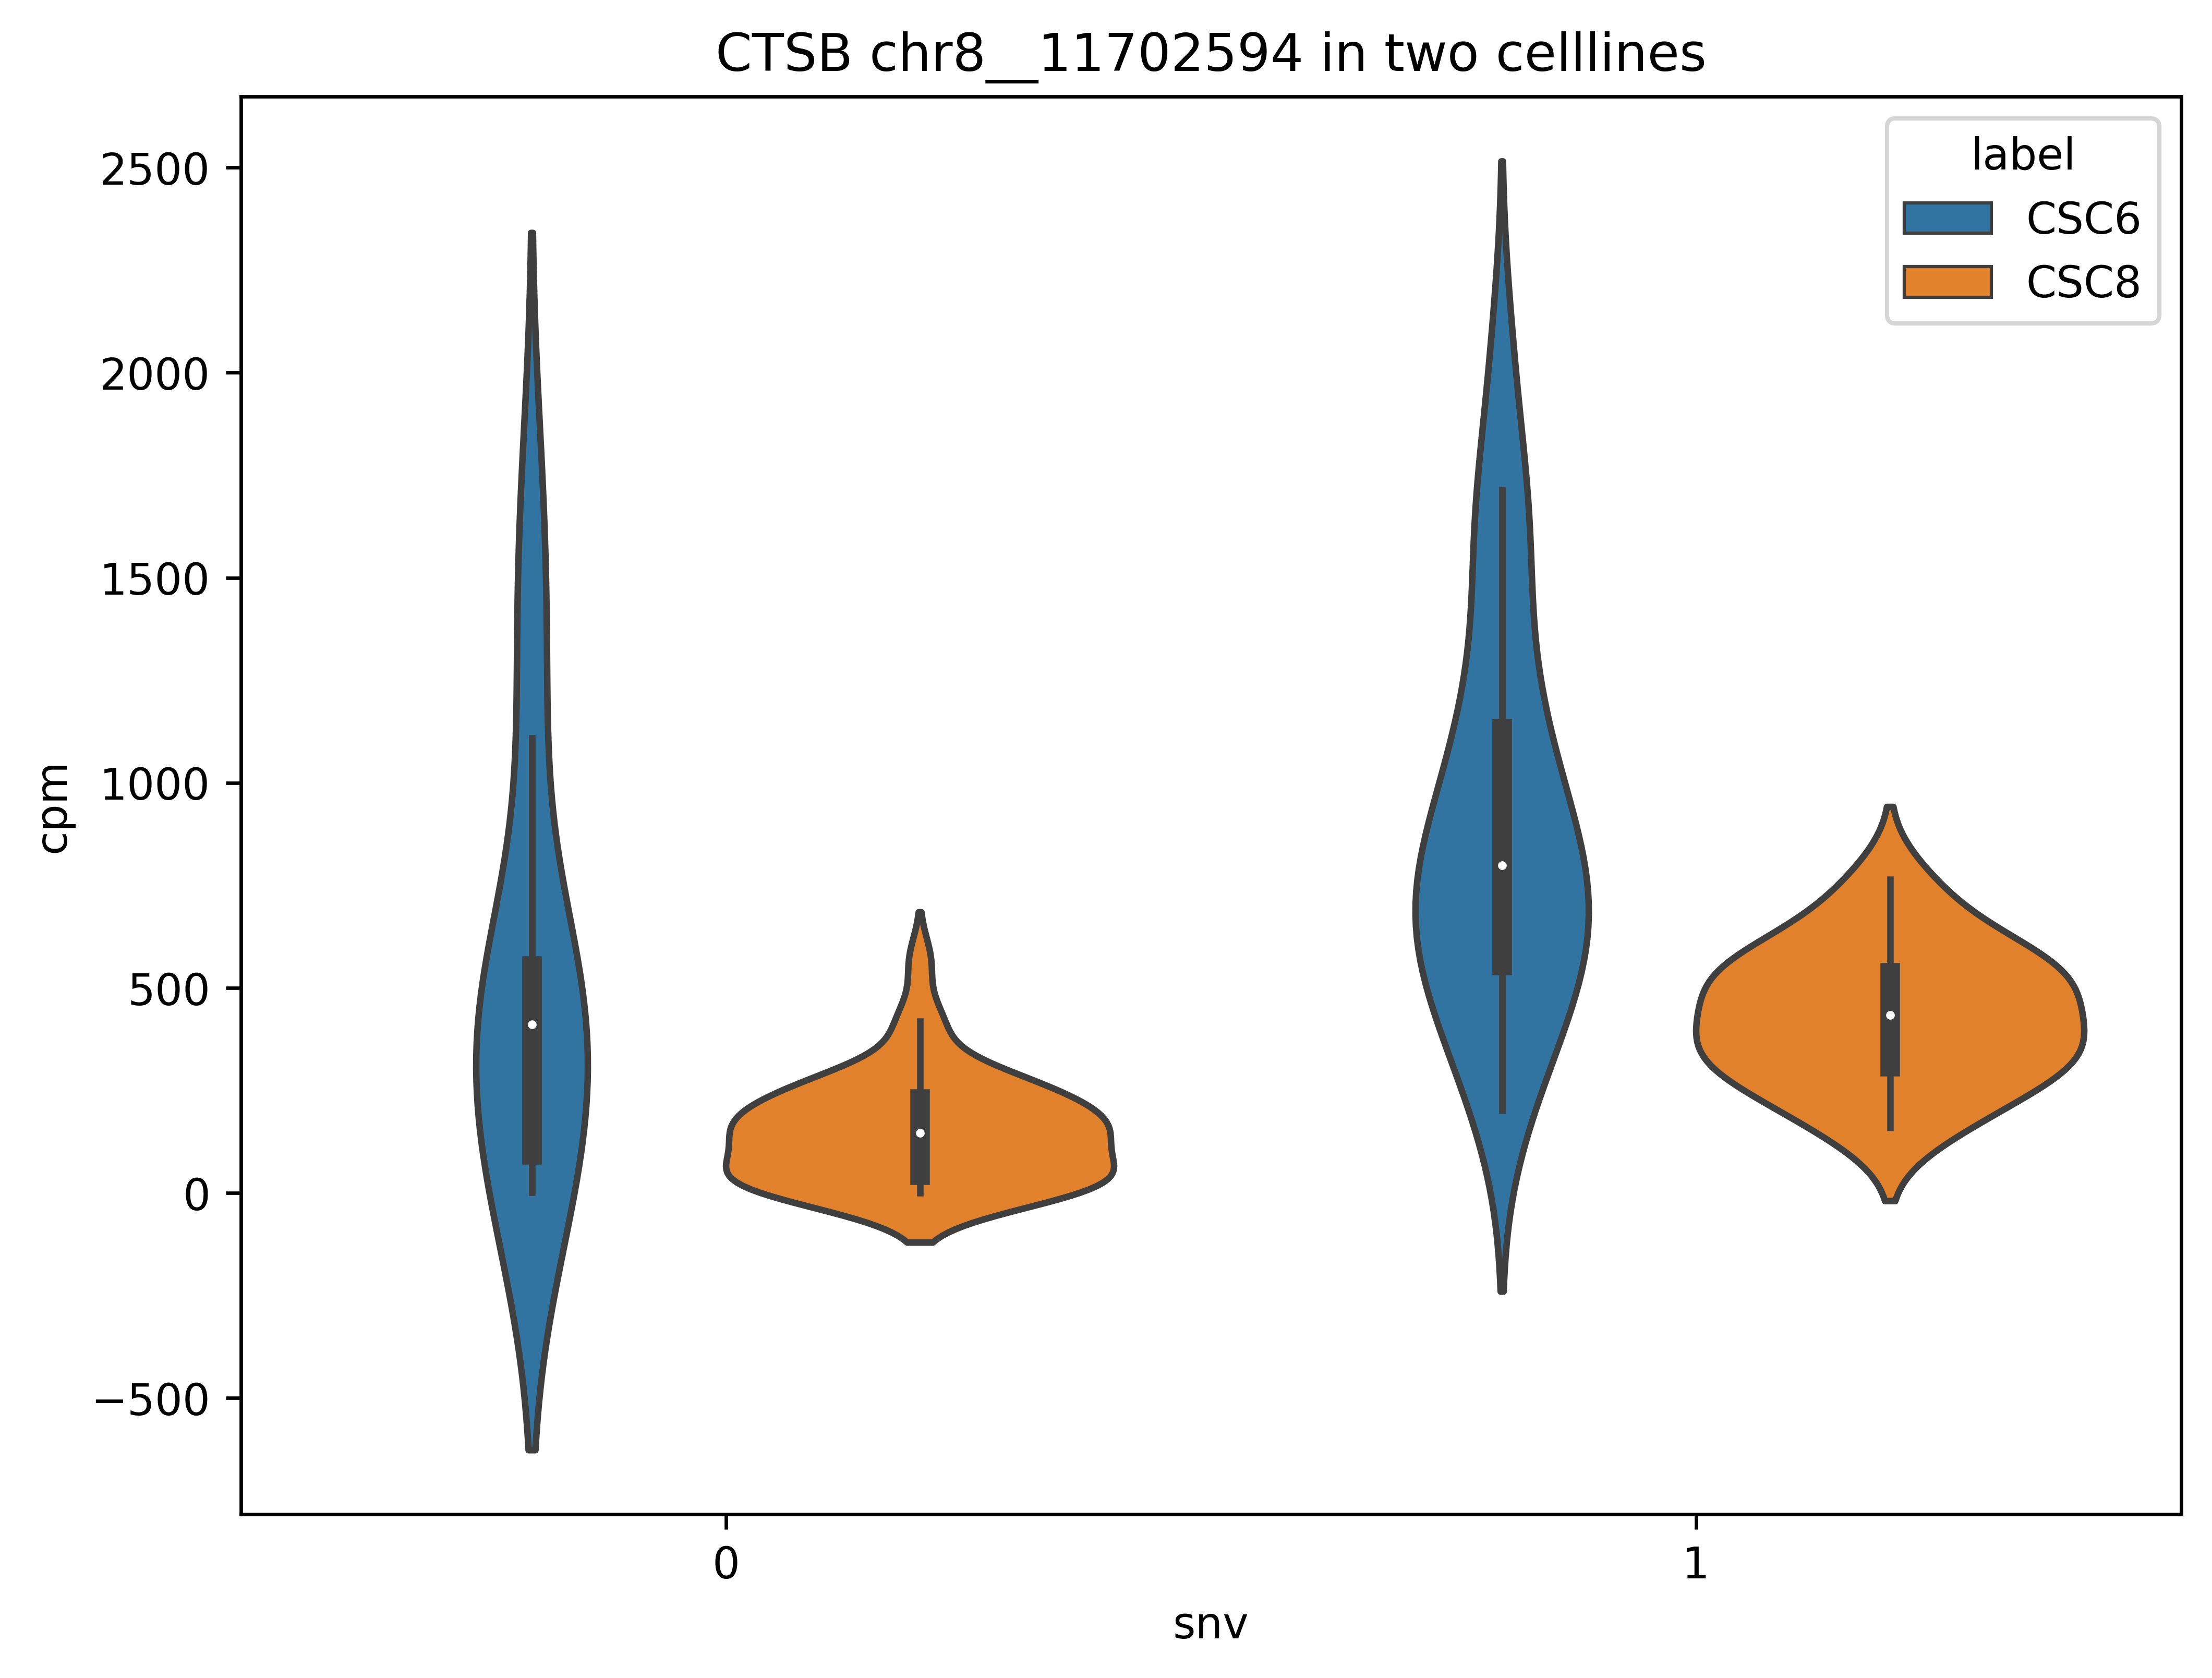

In [146]:
ax = sns.violinplot(x="snv", y="gene", hue='label',data=df_patients_CTSB_heter)
ax.set(xlabel='snv', ylabel='cpm')
ax.set_title('CTSB chr8__11702594 in two celllines')

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a

Text(0.5, 1.0, 'CTSB chr8__11702594 in two celllines')

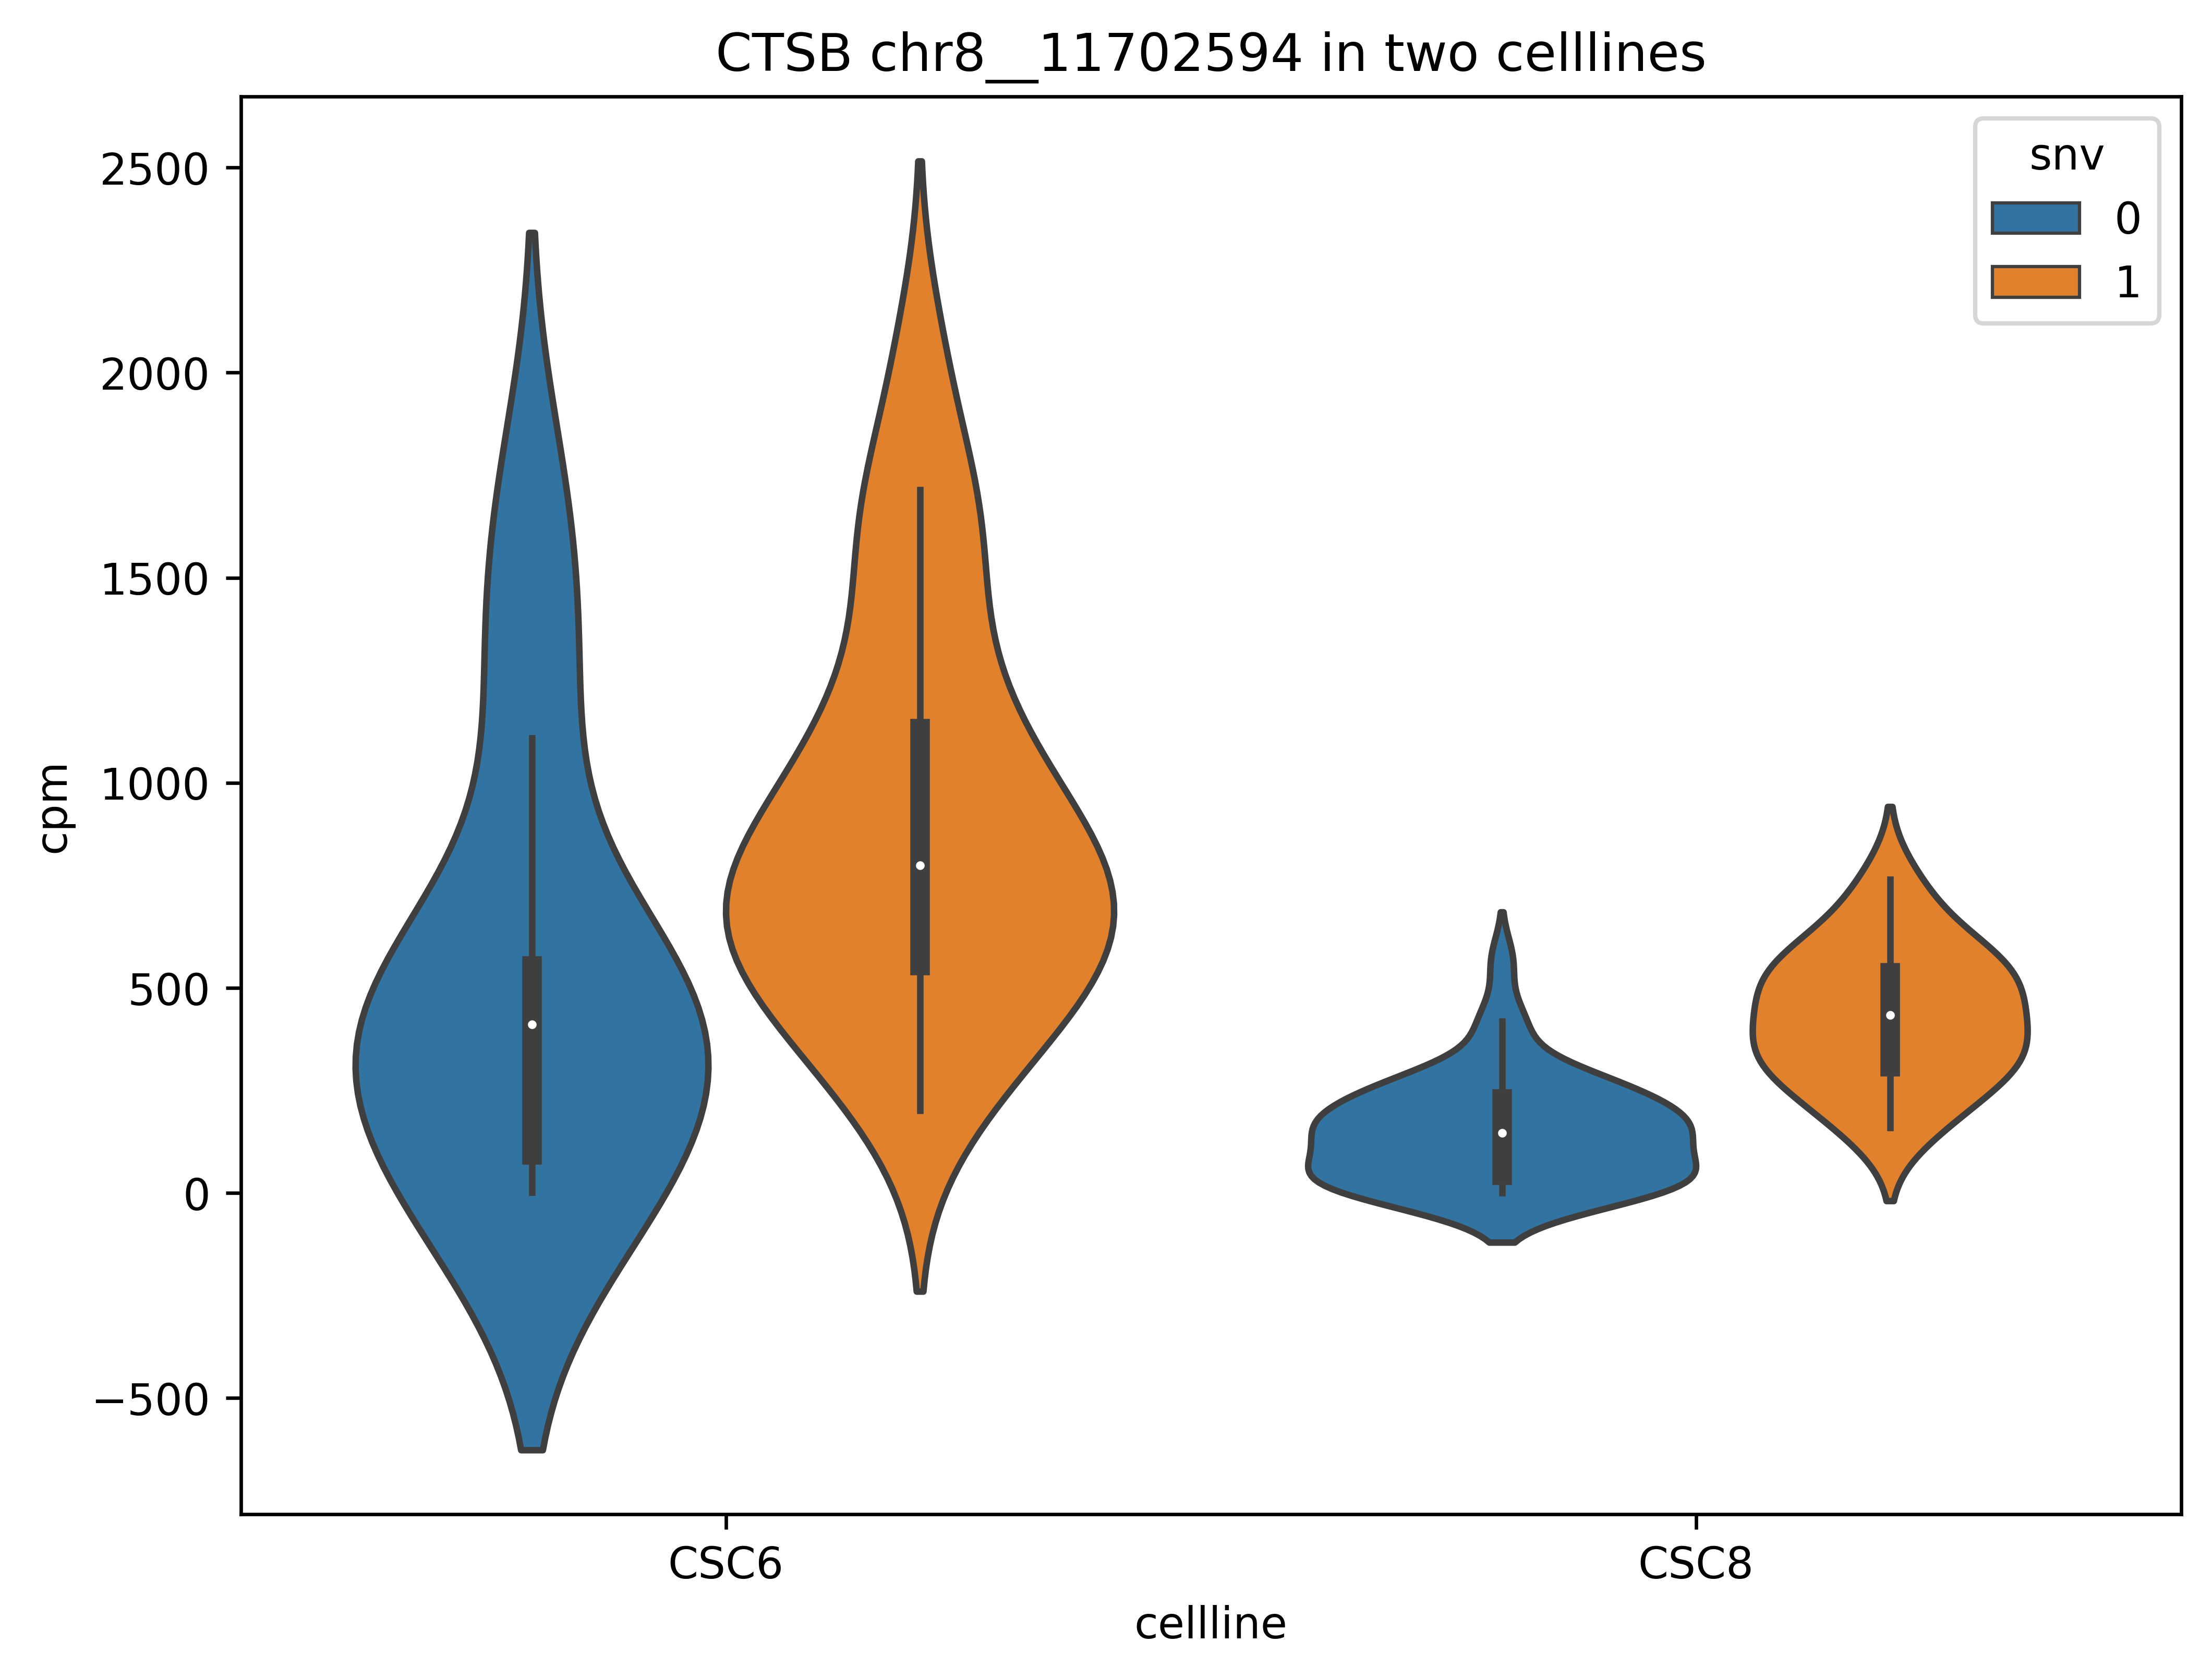

In [148]:
ax = sns.violinplot(x="label", y="gene", hue='snv',data=df_patients_CTSB_heter)
ax.set(xlabel='cellline', ylabel='cpm')
ax.set_title('CTSB chr8__11702594 in two celllines')